## Case Study Submission by Saptarshi Ghosh and Nitin Balaji Srinivasan, Cohort 58 - AI and ML

## Telecom Churn Group Case Study

#### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from 
one operator to another. In this highly competitive market, the telecommunications industry experiences 
an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than 
to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 
In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify 
customers at high risk of churn, and identify the main indicators of churn.

Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time 
(this is especially applicable to high-value customers). 
In churn prediction, we assume that there are three phases of customer lifecycle :

1) The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2) The ‘action’ phase: The customer experience starts to sore in this phase, for 
    e.g. he/she gets a compelling offer from a competitor, faces unjust charges, 
    becomes unhappy with service quality etc. 
    In this phase, the customer usually shows different behaviour than the ‘good’ months. 
    It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken 
    at this point (such as matching the competitor’s offer/improving the service quality etc.)

3) The ‘churn’ phase: In this phase, the customer is said to have churned. 
    In this case, since you are working over a four-month window, the first month (June) is the ‘good’ phase, 
    the second month (July) is the ‘action’ phase, while the third month (August) is the ‘churn’ phase.

#### Objective:

The main goal of the case study is to build ML models to predict churning customers based on the features provided 
for their usage. 

1) The model will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). 
By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2) It will be used to identify important variables that are strong predictors of churn. These variables may also indicate 
why customers choose to switch to other networks.

We will use overall accuracy as primary evaluation metric, however we would also calculate other metrics like precision, 
recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. 


One of the key objectives of this ML model is to identify customers who will definitely churn with more accuracy 
as compared to the ones who will not churn. Therefore we will focus on 'Sensitivity' as a key metric 
throughout the comparison of all models

#### Approach:

PCA will be used for dimensionality reduction to predict churning customers but this will not help with 
interpration of the important variables of churn.

Therefore we will build  two models to address the objectives 1) and 2) separately. 

### Steps:
- Data Understanding
- Data Cleansing (Missing data imputation)
- EDA (Univariate--->Bivariate--->Heatmaps)
- Feature Engineering
- Feature Selection (PCA)
- Model Development with PCA (To predict churn) i.e. Logistic Regression->Decision Tree->Random Forest->GDB->XGB->Catboost..SVM
- Model Evaluation  (Sensitivity,Precision,accuracy,AOC)
- Two Final Models (two different approaches)
- Model Development without PCA (To identify important features)


In [13]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
#opening the data:
# data=pd.read_csv('/Users/rishismac/telecom-churn-case-study-hackathon-c58/train.csv')
data = pd.read_csv('train.csv')
print(data.info(verbose=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [4]:
#making a dictionary of the missing data percentage :
dict(data.isna().sum()/len(data)*100)

#round(100*houseprice_df.isnull().mean(),2)

{'id': 0.0,
 'circle_id': 0.0,
 'loc_og_t2o_mou': 1.0028714695924228,
 'std_og_t2o_mou': 1.0028714695924228,
 'loc_ic_t2o_mou': 1.0028714695924228,
 'last_date_of_month_6': 0.0,
 'last_date_of_month_7': 0.570008142973471,
 'last_date_of_month_8': 1.0471578165402362,
 'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.0,
 'onnet_mou_6': 3.954342204888641,
 'onnet_mou_7': 3.8386262660895154,
 'onnet_mou_8': 5.2900755725081785,
 'offnet_mou_6': 3.954342204888641,
 'offnet_mou_7': 3.8386262660895154,
 'offnet_mou_8': 5.2900755725081785,
 'roam_ic_mou_6': 3.954342204888641,
 'roam_ic_mou_7': 3.8386262660895154,
 'roam_ic_mou_8': 5.2900755725081785,
 'roam_og_mou_6': 3.954342204888641,
 'roam_og_mou_7': 3.8386262660895154,
 'roam_og_mou_8': 5.2900755725081785,
 'loc_og_t2t_mou_6': 3.954342204888641,
 'loc_og_t2t_mou_7': 3.8386262660895154,
 'loc_og_t2t_mou_8': 5.2900755725081785,
 'loc_og_t2m_mou_6': 3.954342204888641,
 'loc_og_t2m_mou_7': 3.8386262660895154,
 'loc_og_t2m_mou_8': 5.2900755725081785

In [14]:
# Describe the dataset numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
count 69999.0000 69999.0000      69297.0000      69297.0000      69297.0000 69999.0000 69999.0000 69999.0000   67231.0000   67312.0000   66296.0000    67231.0000    67312.0000    66296.0000     67231.0000     67312.0000     66296.0000     67231.0000     67312.0000     66296.0000        67231.0000        67312.0000        66296.0000        67231.0000        67312.0000        66296.0000        67231.0000        67312.0000        66296.0000        67231.0000        67312.0000        66296.0000    67231.0000    67312.0000    66296.0000        67231.0000        67312.0000        66296.0000        67231.0000        67312.0000        66296.0000        67231.0000        67312.0000        66296.0000        67231.0000        67312.0000        66296.0000    67231.0000    67312.0000    66296.0000    67231.0000    67312.0000    66296.0000    67231.0000    67312.0000    66296.0000   67231.0000   67312.0000   66296.0000      69999.0000      69999.0000      69999.0000        67231.0000   
mean  34999.0000   109.0000          0.0000          0.0000          0.0000   283.1344   278.1859   278.8588     133.1533     133.8944     132.9783      198.8748      197.1534      196.5436         9.7654         7.0146         7.0049        14.1865         9.8422         9.7718           46.9049           46.1665           45.6861           93.2382           90.7992           91.1214            3.7432            3.7770            3.6617            1.1260            1.3611            1.4208      143.8936      140.7501      140.4765           80.6194           83.7759           83.4715           88.1521           91.5386           90.5870            1.1264            1.0841            1.0577            0.0000            0.0000            0.0000      169.9006      176.4012      175.1189        0.8458        0.8111        0.8416        3.9586        4.9768        5.0450       0.4626       0.0244       0.0331        306.4514        310.5727        304.5131           48.0433   
std   20207.1151     0.0000          0.0000          0.0000          0.0000   334.2139   344.3669   351.9243     299.9631     311.2772     311.8966      316.8184      322.4822      324.0892        57.3744        55.9610        53.4081        73.4693        58.5119        64.6184          150.9718          154.7390          153.7169          162.0467          153.8526          152.9978           13.3195           13.5681           13.0092            5.7418            7.9141            6.5422      252.0346      246.3131      245.3424          255.0984          266.6933          267.0219          255.7716          267.5321          270.0320            8.1366            8.3252            7.6969            0.0000            0.0000            0.0000      392.0466      409.2995      410.6971       29.7475       29.2201       29.5634       15.8545       22.2298       17.7085       4.7684       1.7164       2.2325        465.5029        479.1318        477.9368          140.4998   
min       0.0000   109.0000          0.0000          0.0000   

### Data Understanding and Cleansing

In [6]:
data.dtypes.value_counts()

float64    135
int64       28
object       9
dtype: int64

In [11]:
#Capture only the list of numerical columns with missing values and their percentage
print("Missing Values - Numerical columns only")
for col in data.select_dtypes(include=['float64','int64']).columns:
    if data[col].isnull().any():
        print(col, ' : ',  round(100*data[col].isnull().mean(),2))

Missing Values - Numerical columns only
loc_og_t2o_mou  :  1.0
std_og_t2o_mou  :  1.0
loc_ic_t2o_mou  :  1.0
onnet_mou_6  :  3.95
onnet_mou_7  :  3.84
onnet_mou_8  :  5.29
offnet_mou_6  :  3.95
offnet_mou_7  :  3.84
offnet_mou_8  :  5.29
roam_ic_mou_6  :  3.95
roam_ic_mou_7  :  3.84
roam_ic_mou_8  :  5.29
roam_og_mou_6  :  3.95
roam_og_mou_7  :  3.84
roam_og_mou_8  :  5.29
loc_og_t2t_mou_6  :  3.95
loc_og_t2t_mou_7  :  3.84
loc_og_t2t_mou_8  :  5.29
loc_og_t2m_mou_6  :  3.95
loc_og_t2m_mou_7  :  3.84
loc_og_t2m_mou_8  :  5.29
loc_og_t2f_mou_6  :  3.95
loc_og_t2f_mou_7  :  3.84
loc_og_t2f_mou_8  :  5.29
loc_og_t2c_mou_6  :  3.95
loc_og_t2c_mou_7  :  3.84
loc_og_t2c_mou_8  :  5.29
loc_og_mou_6  :  3.95
loc_og_mou_7  :  3.84
loc_og_mou_8  :  5.29
std_og_t2t_mou_6  :  3.95
std_og_t2t_mou_7  :  3.84
std_og_t2t_mou_8  :  5.29
std_og_t2m_mou_6  :  3.95
std_og_t2m_mou_7  :  3.84
std_og_t2m_mou_8  :  5.29
std_og_t2f_mou_6  :  3.95
std_og_t2f_mou_7  :  3.84
std_og_t2f_mou_8  :  5.29
std_og_t2c_m

In [15]:
# Impute the recharge columns with 0 to indicate they have not recharged


rechrg_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 
                 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                 'av_rech_amt_data_8'
                 ]

In [16]:
data[rechrg_cols] = data[rechrg_cols].apply(lambda x: x.fillna(0))

In [17]:
#Check if imputed correctly
round(100*data[rechrg_cols].isnull().mean(),2)

total_rech_data_6    0.0000
total_rech_data_7    0.0000
total_rech_data_8    0.0000
count_rech_2g_6      0.0000
count_rech_2g_7      0.0000
count_rech_2g_8      0.0000
count_rech_3g_6      0.0000
count_rech_3g_7      0.0000
count_rech_3g_8      0.0000
max_rech_data_6      0.0000
max_rech_data_7      0.0000
max_rech_data_8      0.0000
av_rech_amt_data_6   0.0000
av_rech_amt_data_7   0.0000
av_rech_amt_data_8   0.0000
dtype: float64

In [18]:
# The following columns seem to be flags but classed as numerical, so can impute them with 0 too.

flag_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

data[flag_cols] = data[flag_cols].apply(lambda x: x.fillna(0))
 
round(100*data[flag_cols].isnull().mean(),2)


night_pck_user_6   0.0000
night_pck_user_7   0.0000
night_pck_user_8   0.0000
fb_user_6          0.0000
fb_user_7          0.0000
fb_user_8          0.0000
dtype: float64

## Checking the imbalance in the target variable:

In [19]:
#Checking the imbalance of data:
data['churn_probability'].sum()/len(data)*100

10.188716981671167

In [28]:
#creating a dataframe of 'isna' to understand the missing data better:
isna_df=pd.DataFrame(data.isna().sum()/len(data)*100)
isna_df=isna_df.sort_values(by=0,ascending=False)
isna_df=isna_df.reset_index()
isna_df.columns=['feature','percentage']




In [33]:
# Taking only those columns which have a missing data percentage less than 30 percent:
relevent_columns_df=isna_df[isna_df['percentage']<30]
relevent_columns_df
imp_columns=list(relevent_columns_df['feature'])
imp_columns
data_refined_1=data[imp_columns]
pd.DataFrame(data_refined_1.isna().sum()/len(data)*100).head(60)


0
loc_ic_t2t_mou_8 5.2901
loc_ic_mou_8     5.2901
std_ic_t2m_mou_8 5.2901
loc_og_t2m_mou_8 5.2901
std_og_t2f_mou_8 5.2901
std_ic_t2t_mou_8 5.2901
loc_og_t2f_mou_8 5.2901
std_og_t2m_mou_8 5.2901
loc_og_t2c_mou_8 5.2901
og_others_8      5.2901
loc_ic_t2f_mou_8 5.2901
loc_og_mou_8     5.2901
loc_og_t2t_mou_8 5.2901
loc_ic_t2m_mou_8 5.2901
std_og_mou_8     5.2901
std_ic_mou_8     5.2901
std_ic_t2f_mou_8 5.2901
std_ic_t2o_mou_8 5.2901
roam_og_mou_8    5.2901
spl_og_mou_8     5.2901
roam_ic_mou_8    5.2901
spl_ic_mou_8     5.2901
offnet_mou_8     5.2901
std_og_t2c_mou_8 5.2901
isd_ic_mou_8     5.2901
onnet_mou_8      5.2901
isd_og_mou_8     5.2901
ic_others_8      5.2901
std_og_t2t_mou_8 5.2901
loc_ic_t2t_mou_6 3.9543
spl_og_mou_6     3.9543
og_others_6      3.9543
std_ic_t2f_mou_6 3.9543
loc_ic_t2m_mou_6 3.9543
loc_ic_t2f_mou_6 3.9543
loc_ic_mou_6     3.9543
std_ic_t2t_mou_6 3.9543
std_ic_t2m_mou_6 3.9543
std_ic_mou_6     3.9543
spl_ic_mou_6     3.9543
isd_ic_mou_6     3.9543
ic_others_6      3.9543
isd_og_mou_6     3.9543
std_ic_t2o_mou_6 3.9543
loc_og_t2f_mou_6 3.9543
std_og_t2f_mou_6 3.9543
roam_og_mou_6    3.9543
std_og_t2m_mou_6 3.9543
loc_og_t2t_mou_6 3.9543
loc_og_mou_6     3.9543
roam_ic_mou_6    3.9543
std_og_t2t_mou_6 3.9543
loc_og_t2c_mou_6 3.9543
offnet_mou_6     3.9543
loc_og_t2m_mou_6 3.9543
std_og_t2c_mou_6 3.9543
onnet_mou_6      3.9543
std_og_mou_6     3.9543
loc_og_t2t_mou_7 3.8386
std_ic_t2o_mou_7 3.8386

In [34]:
# Extracting the numerical variables:
num_variables=[x for x in data_refined_1.columns if data_refined_1[x].dtype!='O']
other_variables=[x for x in data_refined_1.columns if data_refined_1[x].dtype=='O']
other_variables

['date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'last_date_of_month_6']

In [35]:
#Capture only the list of non-numerical columns with missing values and their percentage
print("Missing Values - Other")
for col in data_refined_1.select_dtypes(include=['object']).columns:
    #if data[col].isnull().any():
        print(col, ' : ',  round(100*data[col].isnull().mean(),2))

Missing Values - Other
date_of_last_rech_8  :  3.52
date_of_last_rech_7  :  1.76
date_of_last_rech_6  :  1.57
last_date_of_month_8  :  1.05
last_date_of_month_7  :  0.57
last_date_of_month_6  :  0.0


#### All the non numerical features are date columns. 
#### Given we have columns for individual months, we need to extract days of the month to derive recharge / service recency


In [40]:
#Extracting days of the month into separate columns
data_refined_1["day_last_rech_6"] = pd.DatetimeIndex(data_refined_1["date_of_last_rech_6"]).day
data_refined_1["day_last_rech_7"] = pd.DatetimeIndex(data_refined_1["date_of_last_rech_7"]).day
data_refined_1["day_last_rech_8"] = pd.DatetimeIndex(data_refined_1["date_of_last_rech_8"]).day

data_refined_1["day_last_date_6"] = pd.DatetimeIndex(data_refined_1["last_date_of_month_6"]).day
data_refined_1["day_last_date_7"] = pd.DatetimeIndex(data_refined_1["last_date_of_month_7"]).day
data_refined_1["day_last_date_8"] = pd.DatetimeIndex(data_refined_1["last_date_of_month_8"]).day
#data_bylocation = data_refined_1.groupby(by = ['Location']).mean()

In [42]:
cols_of_interest = ["day_last_rech_6","day_last_rech_7","day_last_rech_8","day_last_date_6","day_last_date_7","day_last_date_8",
                   "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"]
data_refined_1[cols_of_interest]

day_last_rech_6  day_last_rech_7  day_last_rech_8  day_last_date_6  day_last_date_7  day_last_date_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 last_date_of_month_6 last_date_of_month_7 last_date_of_month_8
0              22.0000          10.0000          24.0000               30          31.0000          31.0000           6/22/2014           7/10/2014           8/24/2014            6/30/2014            7/31/2014            8/31/2014
1              12.0000          10.0000          26.0000               30          31.0000          31.0000           6/12/2014           7/10/2014           8/26/2014            6/30/2014            7/31/2014            8/31/2014
2              11.0000          22.0000          24.0000               30          31.0000          31.0000           6/11/2014           7/22/2014           8/24/2014            6/30/2014            7/31/2014            8/31/2014
3              15.0000          21.0000          25.0000               30          31.0000          31.0000           6/15/2014           7/21/2014           8/25/2014            6/30/2014            7/31/2014            8/31/2014
4              25.0000          26.0000          30.0000               30          31.0000          31.0000           6/25/2014           7/26/2014           8/30/2014            6/30/2014            7/31/2014            8/31/2014
...                ...              ...              ...              ...              ...              ...                 ...                 ...                 ...                  ...                  ...                  ...
69994          18.0000          31.0000          31.0000               30          31.0000          31.0000           6/18/2014           7/31/2014           8/31/2014            6/30/2014            7/31/2014            8/31/2014
69995          28.0000          31.0000          27.0000               30          31.0000          31.0000           6/28/2014           7/31/2014           8/27/2014            6/30/2014            7/31/2014            8/31/2014
69996          25.0000          30.0000          29.0000               30          31.0000          31.0000           6/25/2014           7/30/2014           8/29/2014            6/30/2014            7/31/2014            8/31/2014
69997          29.0000          19.0000          26.0000               30          31.0000          31.0000           6/29/2014           7/19/2014           8/26/2014            6/30/2014            7/31/2014            8/31/2014
69998          19.0000          27.0000          25.0000               30          31.0000          31.0000           6/19/2014           7/27/2014           8/25/2014            6/30/2014            7/31/2014            8/31/2014

[69999 rows x 12 columns]

In [46]:
# Difference between last date of recharge and last date of month to calculate recency.

data_refined_1["days_since_rechg_6"] = (data_refined_1["day_last_date_6"] - data_refined_1["day_last_rech_6"])+1
data_refined_1["days_since_rechg_7"] = (data_refined_1["day_last_date_7"] - data_refined_1["day_last_rech_7"])+1
data_refined_1["days_since_rechg_8"] = (data_refined_1["day_last_date_8"] - data_refined_1["day_last_rech_8"])+1

# Derive presence or absence of last date of month columns.

data_refined_1["month_present_6"] = (data_refined_1["day_last_date_6"] - data_refined_1["day_last_date_6"])+1
data_refined_1["month_present_7"] = (data_refined_1["day_last_date_7"] - data_refined_1["day_last_date_7"])+1
data_refined_1["month_present_8"] = (data_refined_1["day_last_date_8"] - data_refined_1["day_last_date_8"])+1

In [50]:
cols_of_interest = ["day_last_rech_6","day_last_rech_7","day_last_rech_8","day_last_date_6","day_last_date_7","day_last_date_8",
                   "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8",
                   "days_since_rechg_6","days_since_rechg_7","days_since_rechg_8",
                    "month_present_6","month_present_7","month_present_8"
                   ]
data_refined_1[cols_of_interest]

day_last_rech_6  day_last_rech_7  day_last_rech_8  day_last_date_6  day_last_date_7  day_last_date_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  days_since_rechg_6  days_since_rechg_7  days_since_rechg_8  month_present_6  month_present_7  month_present_8
0              22.0000          10.0000          24.0000               30          31.0000          31.0000           6/22/2014           7/10/2014           8/24/2014            6/30/2014            7/31/2014            8/31/2014              9.0000             22.0000              8.0000                1           1.0000           1.0000
1              12.0000          10.0000          26.0000               30          31.0000          31.0000           6/12/2014           7/10/2014           8/26/2014            6/30/2014            7/31/2014            8/31/2014             19.0000             22.0000              6.0000                1           1.0000           1.0000
2              11.0000          22.0000          24.0000               30          31.0000          31.0000           6/11/2014           7/22/2014           8/24/2014            6/30/2014            7/31/2014            8/31/2014             20.0000             10.0000              8.0000                1           1.0000           1.0000
3              15.0000          21.0000          25.0000               30          31.0000          31.0000           6/15/2014           7/21/2014           8/25/2014            6/30/2014            7/31/2014            8/31/2014             16.0000             11.0000              7.0000                1           1.0000           1.0000
4              25.0000          26.0000          30.0000               30          31.0000          31.0000           6/25/2014           7/26/2014           8/30/2014            6/30/2014            7/31/2014            8/31/2014              6.0000              6.0000              2.0000                1           1.0000           1.0000
...                ...              ...              ...              ...              ...              ...                 ...                 ...                 ...                  ...                  ...                  ...                 ...                 ...                 ...              ...              ...              ...
69994          18.0000          31.0000          31.0000               30          31.0000          31.0000           6/18/2014           7/31/2014           8/31/2014            6/30/2014            7/31/2014            8/31/2014             13.0000              1.0000              1.0000                1           1.0000           1.0000
69995          28.0000          31.0000          27.0000               30          31.0000          31.0000           6/28/2014           7/31/2014           8/27/2014            6/30/2014            7/31/2014            8/31/2014              3.0000              1.0000              5.0000                1           1.0000           1.0000
69996          25.0000          30.0000          29.0000               30          31.0000          31.0000           6/25/2014           7/30/2014           8/29/2014            6/30/2014            7/31/2014            8/31/2014              6.0000              2.0000              3.0000                1           1.0000           1.0000
69997          29.0000          19.0000          26.0000               30          31.0000          31.0000           6/29/2014           7/19/2014           8/26/2014            6/30/2014            7/31/2014            8/31/2014              2.0000             13.0000              6.0000                1           1.0000           1.0000
69998          19.0000          27.0000          25.0000               30          31.0000          31.0000           6/19/2014           7/27/2014           8/25/2014            6/30/2014            7/31/2014            8/31/2014             12

In [48]:
#Checking null values in the new columns
pd.DataFrame(data_refined_1[cols_of_interest].isna().sum()/len(data)*100).head(60)

0
day_last_rech_6      1.5729
day_last_rech_7      1.7629
day_last_rech_8      3.5158
day_last_date_6      0.0000
day_last_date_7      0.5700
day_last_date_8      1.0472
date_of_last_rech_6  1.5729
date_of_last_rech_7  1.7629
date_of_last_rech_8  3.5158
last_date_of_month_6 0.0000
last_date_of_month_7 0.5700
last_date_of_month_8 1.0472
days_since_rechg_6   1.5729
days_since_rechg_7   1.7629
days_since_rechg_8   3.5158
month_present_6      0.0000
month_present_7      0.5700
month_present_8      1.0472

In [49]:
#Describe the columns of interest 
data_refined_1[cols_of_interest].describe(percentiles=[.25,.5,.75,.90,.95,.99])

day_last_rech_6  day_last_rech_7  day_last_rech_8  day_last_date_6  day_last_date_7  day_last_date_8  days_since_rechg_6  days_since_rechg_7  days_since_rechg_8  month_present_6  month_present_7  month_present_8
count       68898.0000       68765.0000       67538.0000       69999.0000       69600.0000       69266.0000          68898.0000          68765.0000          67538.0000       69999.0000       69600.0000       69266.0000
mean           24.1281          25.5057          25.4420          30.0000          31.0000          31.0000              6.8719              6.4943              6.5580           1.0000           1.0000           1.0000
std             6.1348           5.7658           6.1080           0.0000           0.0000           0.0000              6.1348              5.7658              6.1080           0.0000           0.0000           0.0000
min             1.0000           1.0000           1.0000          30.0000          31.0000          31.0000              1.0000              1.0000              1.0000           1.0000           1.0000           1.0000
25%            21.0000          23.0000          24.0000          30.0000          31.0000          31.0000              2.0000              2.0000              2.0000           1.0000           1.0000           1.0000
50%            27.0000          27.0000          27.0000          30.0000          31.0000          31.0000              4.0000              5.0000              5.0000           1.0000           1.0000           1.0000
75%            29.0000          30.0000          30.0000          30.0000          31.0000          31.0000             10.0000              9.0000              8.0000           1.0000           1.0000           1.0000
90%            30.0000          31.0000          31.0000          30.0000          31.0000          31.0000             17.0000             15.0000             15.0000           1.0000           1.0000           1.0000
95%            30.0000          31.0000          31.0000          30.0000          31.0000          31.0000             19.0000             17.0000             21.0000           1.0000           1.0000           1.0000
99%            30.0000          31.0000          31.0000          30.0000          31.0000          31.0000             26.0000             26.0000             27.0000           1.0000           1.0000           1.0000
max            30.0000          31.0000          31.0000          30.0000          31.0000          31.0000             30.0000             31.0000             31.0000           1.0000           1.0000           1.0000

In [52]:
# Drop the date and day columns

drop_cols = ["day_last_rech_6","day_last_rech_7","day_last_rech_8","day_last_date_6","day_last_date_7","day_last_date_8",
                   "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"]
data_refined_1 = data_refined_1.drop(drop_cols, axis=1)

In [55]:
# We can see that the minimum on the days since recharge and months present is always 1, so we can impute the null values with 0 on those columns
days_col_impute = ["days_since_rechg_6","days_since_rechg_7","days_since_rechg_8", "month_present_6","month_present_7","month_present_8"]
    
data_refined_1[days_col_impute] = data_refined_1[days_col_impute].apply(lambda x: x.fillna(0))

In [56]:
#Checking the columns in the new refined data is all numerical
data_refined_1.dtypes.value_counts()

float64    134
int64       29
dtype: int64

In [59]:
#Checking null values in the columns
pd.DataFrame(data_refined_1.isna().sum()/len(data)*100)

0
loc_ic_t2t_mou_8   5.2901
loc_ic_mou_8       5.2901
std_ic_t2m_mou_8   5.2901
loc_og_t2m_mou_8   5.2901
std_og_t2f_mou_8   5.2901
std_ic_t2t_mou_8   5.2901
loc_og_t2f_mou_8   5.2901
std_og_t2m_mou_8   5.2901
loc_og_t2c_mou_8   5.2901
og_others_8        5.2901
loc_ic_t2f_mou_8   5.2901
loc_og_mou_8       5.2901
loc_og_t2t_mou_8   5.2901
loc_ic_t2m_mou_8   5.2901
std_og_mou_8       5.2901
std_ic_mou_8       5.2901
std_ic_t2f_mou_8   5.2901
std_ic_t2o_mou_8   5.2901
roam_og_mou_8      5.2901
spl_og_mou_8       5.2901
roam_ic_mou_8      5.2901
spl_ic_mou_8       5.2901
offnet_mou_8       5.2901
std_og_t2c_mou_8   5.2901
isd_ic_mou_8       5.2901
onnet_mou_8        5.2901
isd_og_mou_8       5.2901
ic_others_8        5.2901
std_og_t2t_mou_8   5.2901
loc_ic_t2t_mou_6   3.9543
spl_og_mou_6       3.9543
og_others_6        3.9543
std_ic_t2f_mou_6   3.9543
loc_ic_t2m_mou_6   3.9543
loc_ic_t2f_mou_6   3.9543
loc_ic_mou_6       3.9543
std_ic_t2t_mou_6   3.9543
std_ic_t2m_mou_6   3.9543
std_ic_mou_6       3.9543
spl_ic_mou_6       3.9543
isd_ic_mou_6       3.9543
ic_others_6        3.9543
isd_og_mou_6       3.9543
std_ic_t2o_mou_6   3.9543
loc_og_t2f_mou_6   3.9543
std_og_t2f_mou_6   3.9543
roam_og_mou_6      3.9543
std_og_t2m_mou_6   3.9543
loc_og_t2t_mou_6   3.9543
loc_og_mou_6       3.9543
roam_ic_mou_6      3.9543
std_og_t2t_mou_6   3.9543
loc_og_t2c_mou_6   3.9543
offnet_mou_6       3.9543
loc_og_t2m_mou_6   3.9543
std_og_t2c_mou_6   3.9543
onnet_mou_6        3.9543
std_og_mou_6       3.9543
loc_og_t2t_mou_7   3.8386
std_ic_t2o_mou_7   3.8386
loc_og_t2m_mou_7   3.8386
roam_og_mou_7      3.8386
std_og_mou_7       3.8386
std_ic_mou_7       3.8386
std_ic_t2m_mou_7   3.8386
roam_ic_mou_7      3.8386
spl_ic_mou_7       3.8386
offnet_mou_7       3.8386
isd_ic_mou_7       3.8386
onnet_mou_7        3.8386
ic_others_7        3.8386
isd_og_mou_7       3.8386
std_ic_t2f_mou_7   3.8386
loc_og_t2f_mou_7   3.8386
std_og_t2m_mou_7   3.8386
std_og_t2c_mou_7   3.8386
loc_og_t2c_mou_7   3.8386
spl_og_mou_7       3.8386
loc_ic_mou_7       3.8386
loc_og_mou_7       3.8386
loc_ic_t2f_mou_7   3.8386
std_og_t2t_mou_7   3.8386
loc_ic_t2m_mou_7   3.8386
std_og_t2f_mou_7   3.8386
og_others_7        3.8386
std_ic_t2t_mou_7   3.8386
loc_ic_t2t_mou_7   3.8386
loc_og_t2o_mou     1.0029
std_og_t2o_mou     1.0029
loc_ic_t2o_mou     1.0029
vol_2g_mb_8        0.0000
jul_vbc_3g         0.0000
night_pck_user_6   0.0000
aon                0.0000
aug_vbc_3g         0.0000
jun_vbc_3g         0.0000
vol_2g_mb_7        0.0000
night_pck_user_7   0.0000
vol_3g_mb_7        0.0000
vol_3g_mb_8        0.0000
vol_3g_mb_6        0.0000
vol_2g_mb_6        0.0000
sachet_3g_6        0.0000
night_pck_user_8   0.0000
monthly_3g_8       0.0000
fb_user_8          0.0000
fb_user_7          0.0000
fb_user_6          0.0000
av_rech_amt_data_7 0.0000
sachet_3g_8        0.0000
sachet_3g_7        0.0000
monthly_3g_7       0.0000
monthly_2g_6       0.0000
monthly_3g_6       0.0000
sachet_2g_8        0.0000
sachet_2g_7        0.0000
sachet_2g_6        0.0000
monthly_2g_8       0.0000
monthly_2g_7       0.0000
av_rech_amt_data_8 0.0000
id                 0.0000
av_rech_amt_data_6 0.0000
total_rech_amt_8   0.0000
total_rech_amt_6   0.0000
total_rech_num_8   0.0000
total_rech_num_7   0.0000
total_rech_num_6   0.0000
total_ic_mou_8     0.0000
total_ic_mou_7     0.0000
total_ic_mou_6     0.0000
circle_id          0.0000
total_og_mou_8     0.0000
total_og_mou_7     0.0000
total_og_mou_6     0.0000
arpu_8             0.0000
arpu_7             0.0000
arpu_6             0.0000
total_rech_amt_7   0.0000
max_rech_amt_6     0.0000
count_rech_3g_8    0.0000
max_rech_amt_7     0.0000
count_rech_3g_7    0.0000
count_rech_3g_6    0.0000
count_rech_2g_8    0.0000
count_rech_2g_7    0.0000
count_rech_2g_6    0.0000
max_rech_data_8    0.0000
max_rech_data_7    0.0000
max_rech_data_6    0.0000
total_rech_data_8  0.0000
total_rech_data_7  0.0000
total_rech_data_6  0.0000
last_day_rch_amt_8 0.0000
last_day_rch_amt_7 0

In [61]:
# cols_to_impute list
cols_to_impute = []
for col in data_refined_1.select_dtypes(include=['float64','int64']).columns:
    if data_refined_1[col].isnull().any():
        cols_to_impute.append(col)
cols_to_impute

['loc_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'og_others_8',
 'loc_ic_t2f_mou_8',
 'loc_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_mou_8',
 'std_ic_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'roam_og_mou_8',
 'spl_og_mou_8',
 'roam_ic_mou_8',
 'spl_ic_mou_8',
 'offnet_mou_8',
 'std_og_t2c_mou_8',
 'isd_ic_mou_8',
 'onnet_mou_8',
 'isd_og_mou_8',
 'ic_others_8',
 'std_og_t2t_mou_8',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'std_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'isd_og_mou_6',
 'std_ic_t2o_mou_6',
 'loc_og_t2f_mou_6',
 'std_og_t2f_mou_6',
 'roam_og_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_mou_6',
 'roam_ic_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_

In [62]:
# We can see the missing values are less than 6% in every column, so we can impute them with 0

data_refined_1[cols_to_impute] = data_refined_1[cols_to_impute].apply(lambda x: x.fillna(0))

In [63]:
#Checking there are no missing values left
print("Missing Values - Numerical columns")
for col in data_refined_1.select_dtypes(include=['float64','int64']).columns:
    if data_refined_1[col].isnull().any():
        print(col, ' : ',  round(100*data_refined_1[col].isnull().mean(),2))

Missing Values - Numerical columns


#### Duplication and uniqueness checks

In [64]:
#### Duplication

data_refined_1.duplicated().any().sum()


0

In [73]:
#### Checking if there are single value columns
unq_check = pd.DataFrame(data_refined_1.nunique())
unq_check[unq_check[0]==1]

0
std_ic_t2o_mou_8  1
std_og_t2c_mou_8  1
std_ic_t2o_mou_6  1
std_og_t2c_mou_6  1
std_ic_t2o_mou_7  1
std_og_t2c_mou_7  1
loc_og_t2o_mou    1
std_og_t2o_mou    1
loc_ic_t2o_mou    1
circle_id         1
month_present_6   1

In [75]:
# These columns have a single unique value therefore cannot explain any variance, so dropping these columns

single_value_cols = ['std_ic_t2o_mou_8','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_og_t2c_mou_6','std_ic_t2o_mou_7','std_og_t2c_mou_7',
                    'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','circle_id','month_present_6']

data_refined_1=data_refined_1.drop(single_value_cols, axis=1)

In [76]:
#Getting the latest shape of data
data_refined_1.shape

(69999, 152)

### EDA 

In [87]:
# Given the high number of columns, we can categorise some of the key columns with these variables
import re
total_amounts = [i for i in list(data_refined_1.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data_refined_1.columns) if re.search('total.+og.+mou',i)]
total_incoming_minutes = [i for i in list(data_refined_1.columns) if re.search('total.+ic.+mou',i)]
offnetwork_minutes = [i for i in list(data_refined_1.columns) if re.search('offnet',i)]
volume_3g = [i for i in list(data_refined_1.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data_refined_1.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data_refined_1.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [ 'id', 
             *total_amounts, 
             *total_incoming_minutes,
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

trim_data_for_EDA = data_refined_1[variables].set_index('id')

In [88]:
#variables
trim_data_for_EDA

total_rech_amt_8  total_rech_amt_6  total_rech_amt_7  total_ic_mou_8  total_ic_mou_7  total_ic_mou_6  total_og_mou_8  total_og_mou_7  total_og_mou_6  offnet_mou_8  offnet_mou_6  offnet_mou_7  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_6  vol_2g_mb_8  vol_2g_mb_7  vol_2g_mb_6   aon  churn_probability
id                                                                                                                                                                                                                                                                                                          
0                    10                77                65         40.5600         53.0400         11.8400          3.6300        221.6800         81.2100        2.3300       32.2400       96.6800       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000  1958                  0
1                    50                 0               145         25.0400         39.4400          3.4400         31.6600         30.7300          0.0000       30.8900        0.0000       25.9900       3.9600       0.0000       0.0000       0.0000     352.9100       0.0000   710                  0
2                     0                70               120         36.6400         33.8300        124.2900          0.0000         99.3600         56.4900        0.0000       53.9900       82.0500       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000   882                  0
3                   130               160               240         83.8400         50.1800         95.1100         53.8400         95.9800         76.0300       50.2300       68.7600       78.4800       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000   982                  0
4                   122               290               136         28.3100          9.3600         21.5400         15.7600         42.9400         63.2600        9.6300       56.9900       38.1100       0.0000       0.0000       0.0000     213.4700     308.8900     390.8000   647                  0
...                 ...               ...               ...             ...             ...             ...             ...             ...             ...           ...           ...           ...          ...          ...          ...          ...          ...          ...   ...                ...
69994               512                50               397        269.5600        221.9900          0.0000        392.5800        496.6800          0.0000      381.6400        0.0000      488.4600       0.0000       0.0000       0.0000     144.3100     244.5900       0.0000   221                  0
69995               308               200               313        136.0100        112.4300         80.2400        280.6900        292.7400        166.2100       48.0600       49.5300       96.2800       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000   712                  0
69996               397               626               250        414.5400        416.5800        542.1800        342.2900        296.3900        412.6800      263.8400      335.5400      227.9400       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000   879                  0
69997               145               379               252         17.7600         16.2400         18.8300         19.2800         24.3300         39.7800       12.5600       30.3400       16.6800    1774.1800     658.1900    1253.4700      44.6400      57.6100      46.2500   277                  0
69998               198               198                50         33.5800         65.0900          8.1300          0.0000          0.0000          0.0000        0.0000        0.0000        0.0000       0.0000       0.0000       0.0000     982.5400       0.0000     280.7000  1876                  0

[69999 rows x 20 columns]

In [90]:
# Selecting the Numerical and Categorical features for analysis

numeric_cols = trim_data_for_EDA.select_dtypes(include=['float64','int64']).columns
categorical_cols = flag_cols+['month_present_7','month_present_8']
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'month_present_7',
 'month_present_8']

#### Univariate analysis

Column: total_rech_amt_8, Missing Data: 0.00%


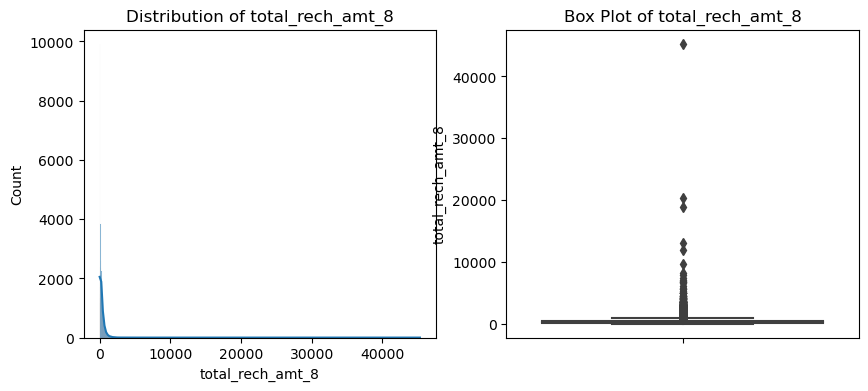

Column: total_rech_amt_6, Missing Data: 0.00%


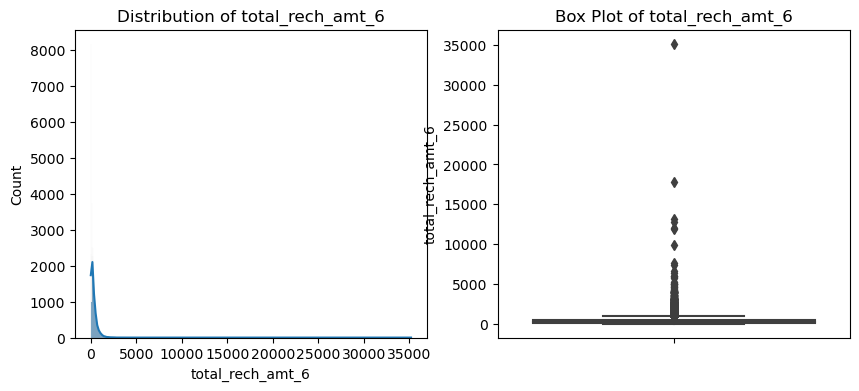

Column: total_rech_amt_7, Missing Data: 0.00%


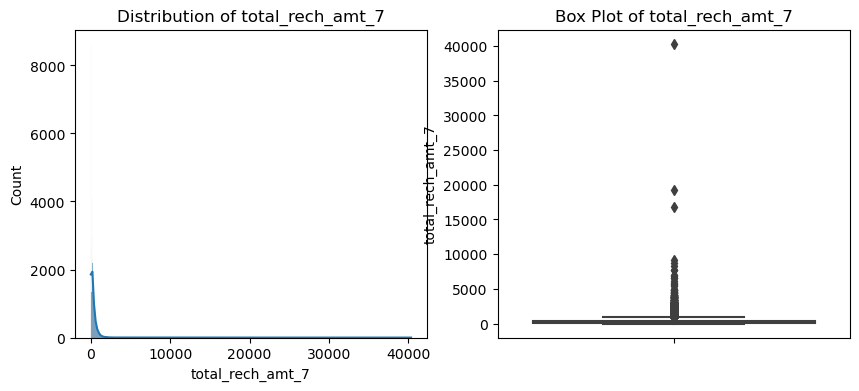

Column: total_ic_mou_8, Missing Data: 0.00%


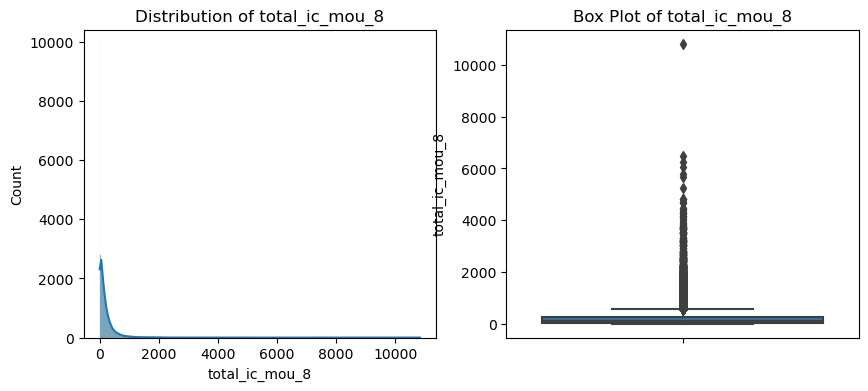

Column: total_ic_mou_7, Missing Data: 0.00%


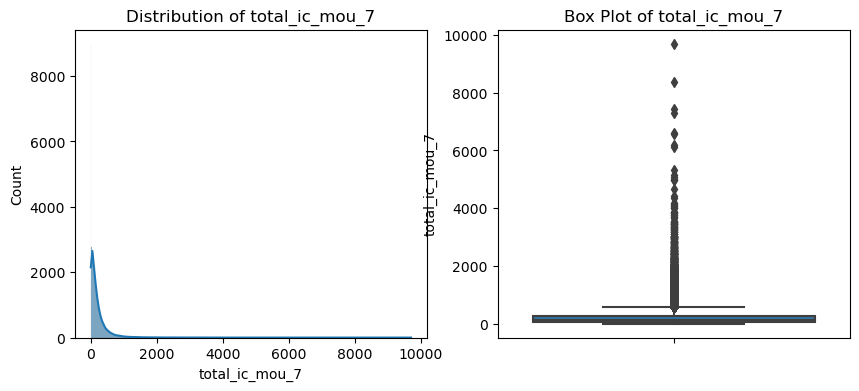

Column: total_ic_mou_6, Missing Data: 0.00%


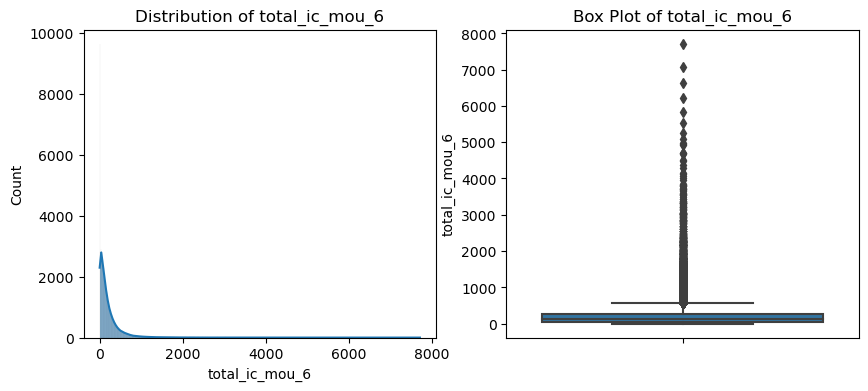

Column: total_og_mou_8, Missing Data: 0.00%


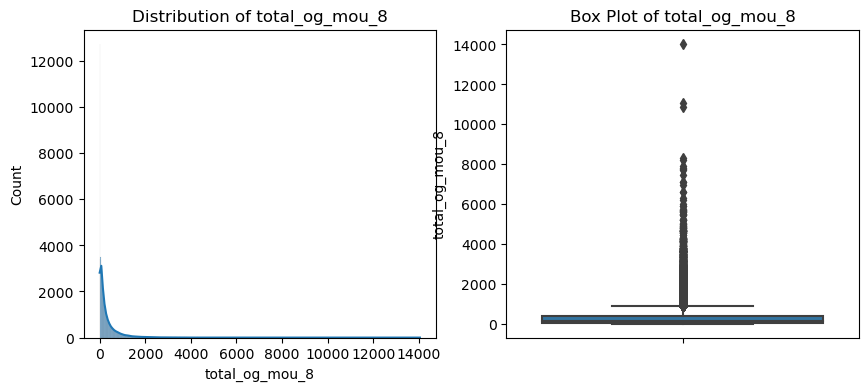

Column: total_og_mou_7, Missing Data: 0.00%


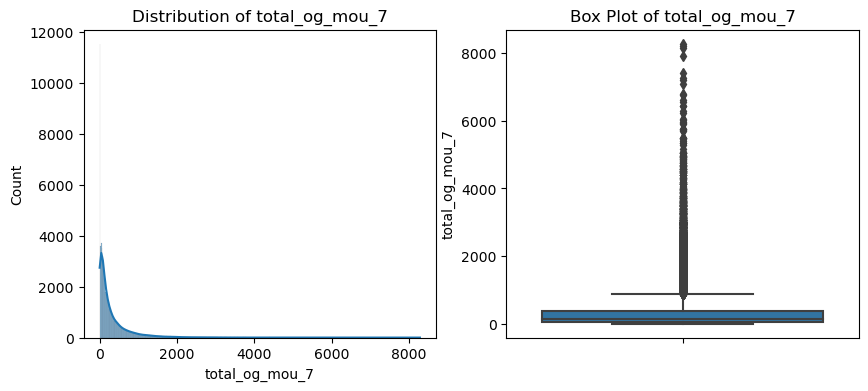

Column: total_og_mou_6, Missing Data: 0.00%


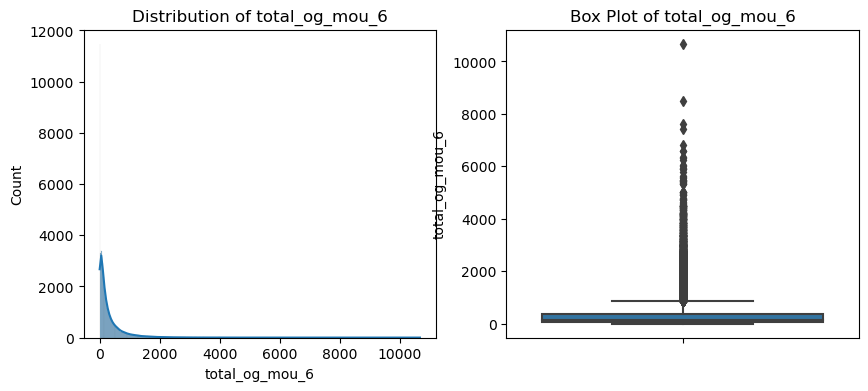

Column: offnet_mou_8, Missing Data: 0.00%


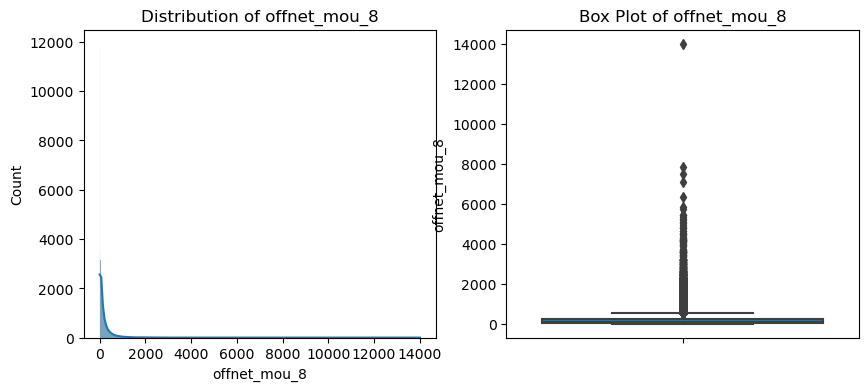

Column: offnet_mou_6, Missing Data: 0.00%


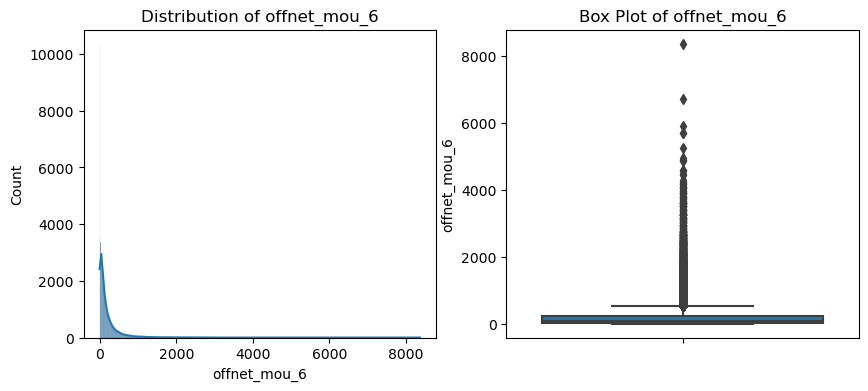

Column: offnet_mou_7, Missing Data: 0.00%


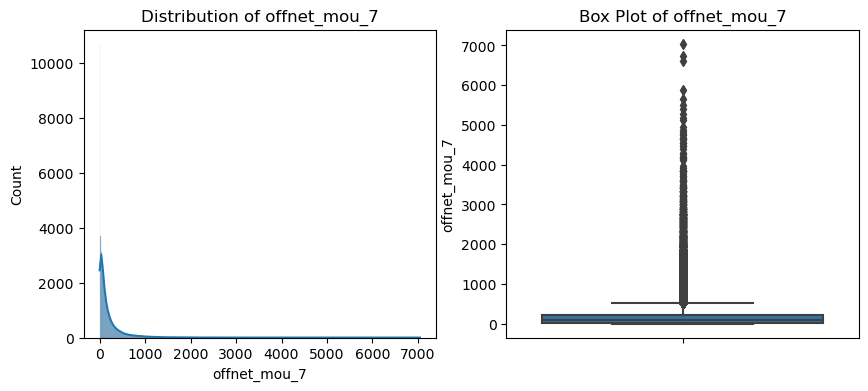

Column: vol_3g_mb_7, Missing Data: 0.00%


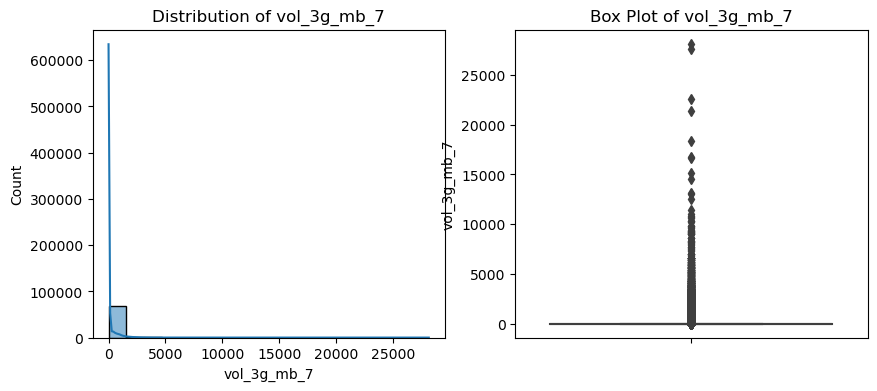

Column: vol_3g_mb_8, Missing Data: 0.00%


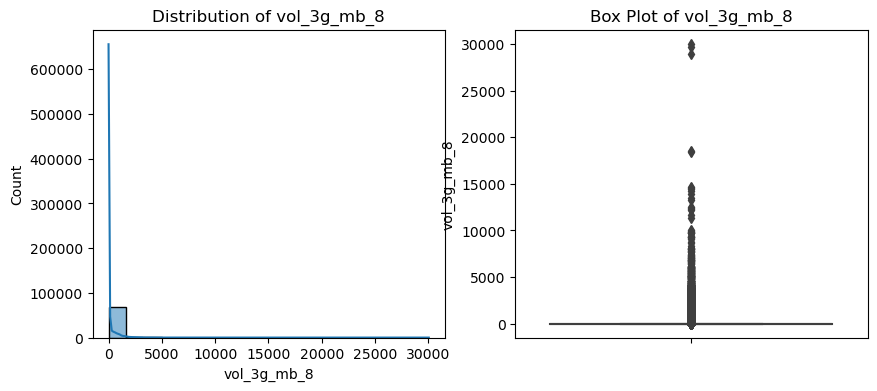

Column: vol_3g_mb_6, Missing Data: 0.00%


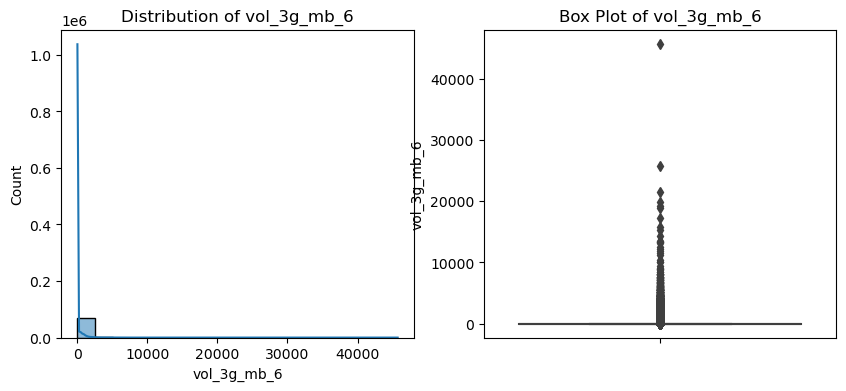

Column: vol_2g_mb_8, Missing Data: 0.00%


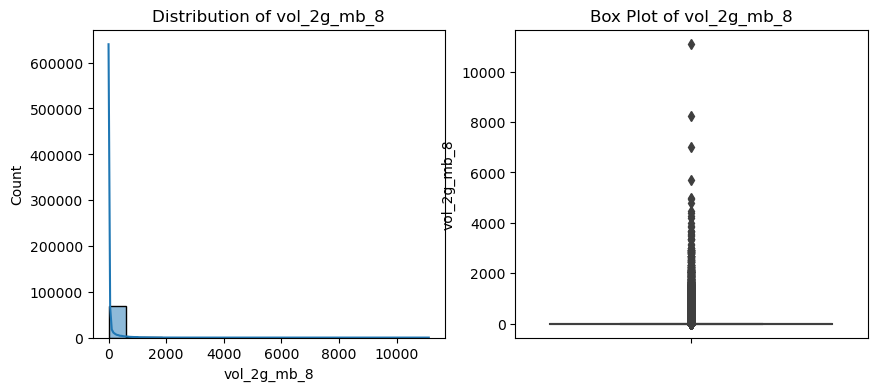

Column: vol_2g_mb_7, Missing Data: 0.00%


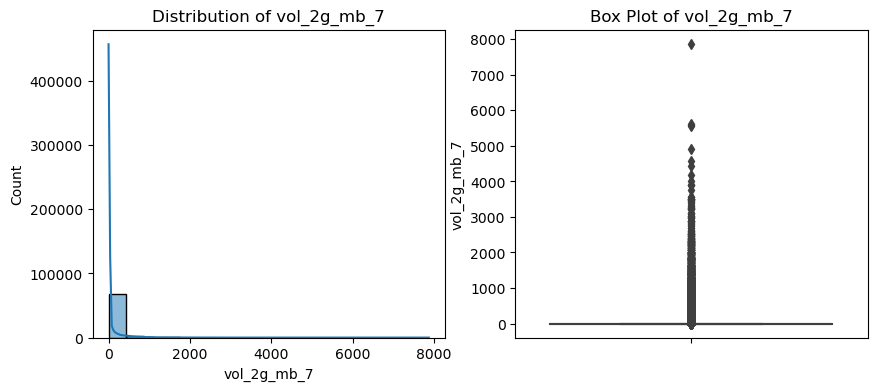

Column: vol_2g_mb_6, Missing Data: 0.00%


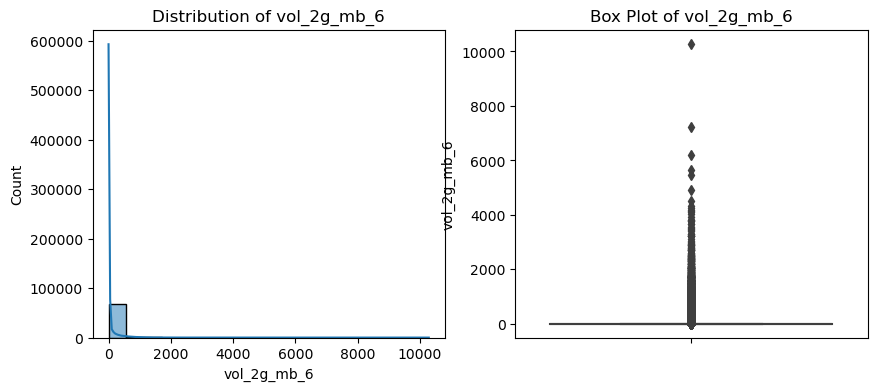

Column: aon, Missing Data: 0.00%


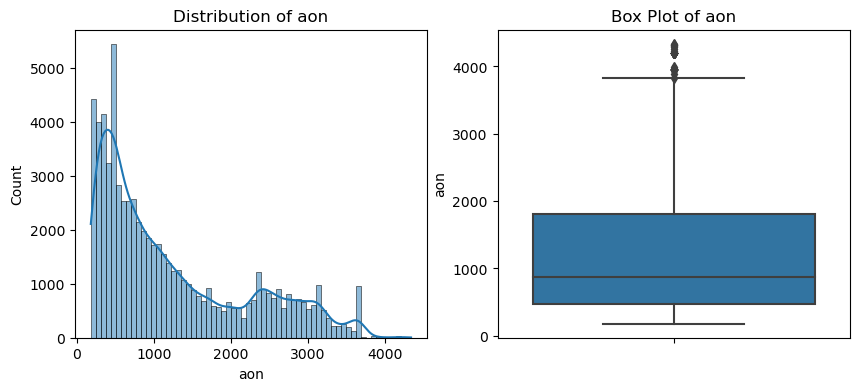

Column: churn_probability, Missing Data: 0.00%


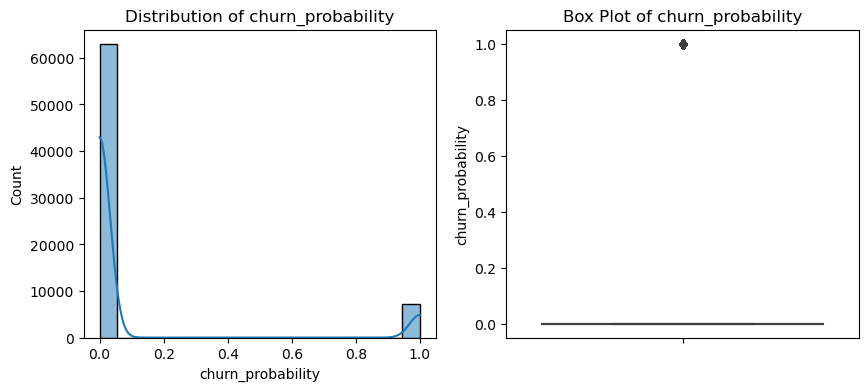

Column: night_pck_user_6, Missing Data: 0.00%


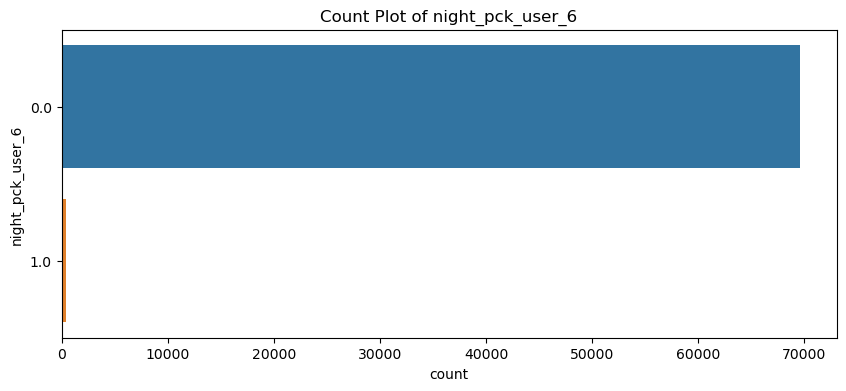

Column: night_pck_user_7, Missing Data: 0.00%


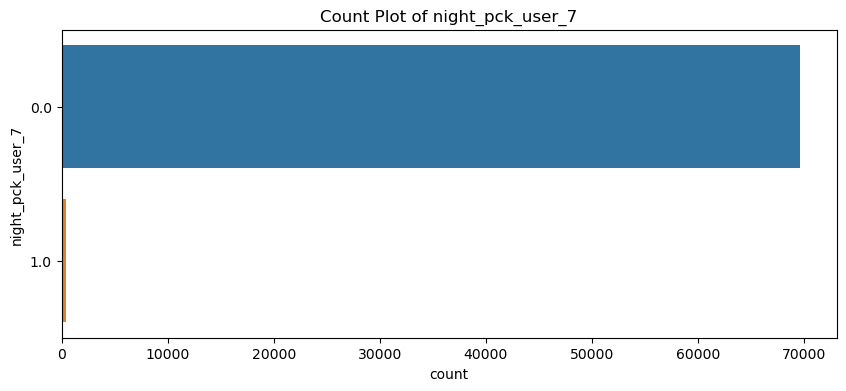

Column: night_pck_user_8, Missing Data: 0.00%


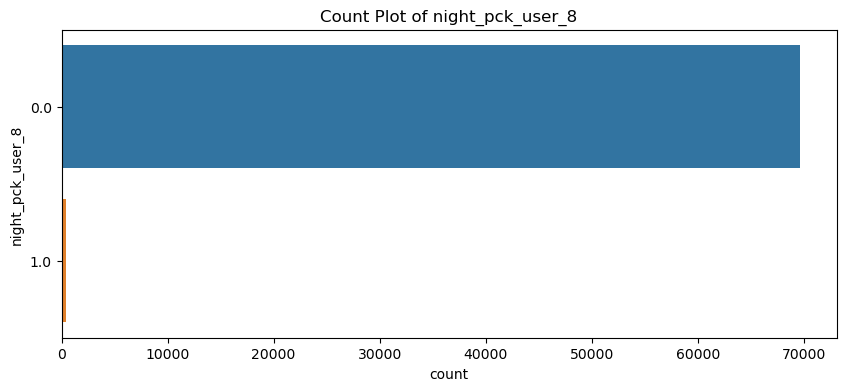

Column: fb_user_6, Missing Data: 0.00%


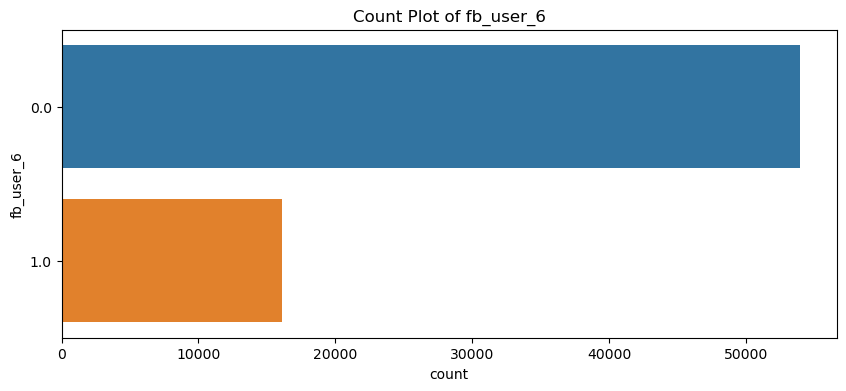

Column: fb_user_7, Missing Data: 0.00%


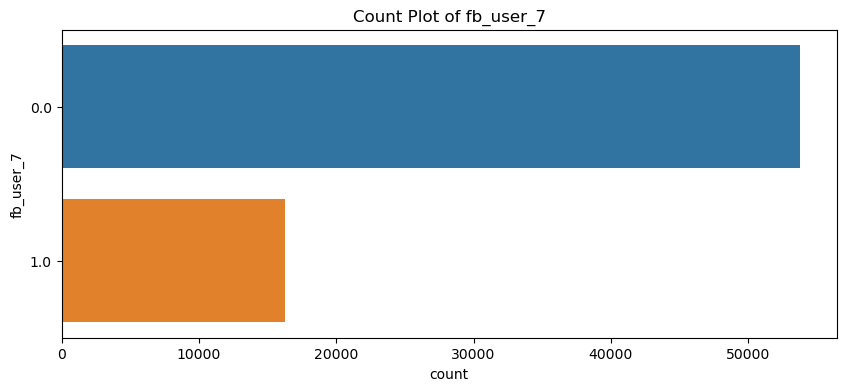

Column: fb_user_8, Missing Data: 0.00%


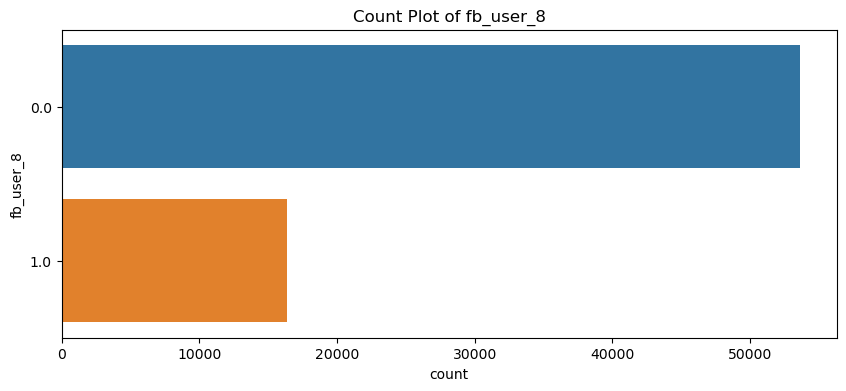

Column: month_present_7, Missing Data: 0.00%


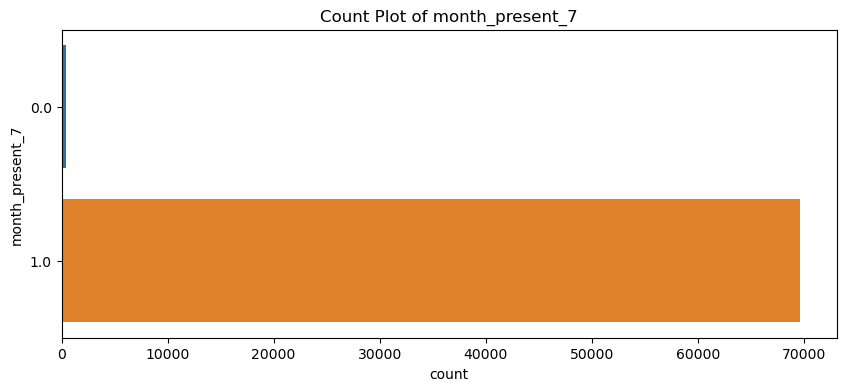

Column: month_present_8, Missing Data: 0.00%


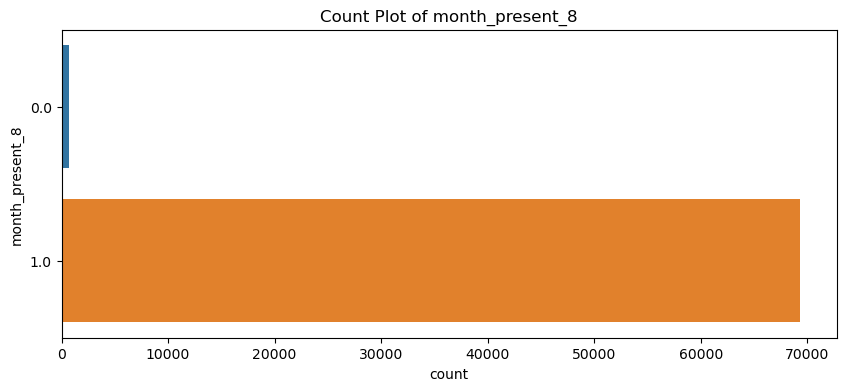

In [91]:
# Define a function for univariate analysis to draw the following only;

# distribution and box plot for numerical columns and;
# count plot for categorical columns

def univariate_analysis(df, column_list, plot_type='numerical'):
    for column in column_list:
        if column not in df.columns:
            print(f"Column {column} not found in dataframe.")
            continue

        missing_percentage = df[column].isna().sum() / len(df) * 100
        print(f"Column: {column}, Missing Data: {missing_percentage:.2f}%")

        if missing_percentage < 30:
            plt.figure(figsize=(10, 4))

            if plot_type == 'numerical':
                # Distribution plot for numerical data
                plt.subplot(1, 2, 1)
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribution of {column}')

                plt.subplot(1, 2, 2)
                sns.boxplot(y=df[column].dropna())
                plt.title(f'Box Plot of {column}')
            elif plot_type == 'categorical':
                # Count plot for categorical data
                sns.countplot(y=df[column].dropna())
                plt.title(f'Count Plot of {column}')
            
            plt.show()
        else:
            print(f"Skipping {column} due to high percentage of missing data.")

univariate_analysis(data_refined_1, numeric_cols, plot_type='numerical')
univariate_analysis(data_refined_1, categorical_cols, plot_type='categorical')

#### Bivariate analysis

night_pck_user_6


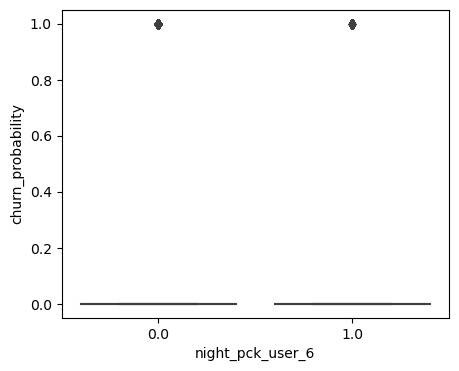

night_pck_user_7


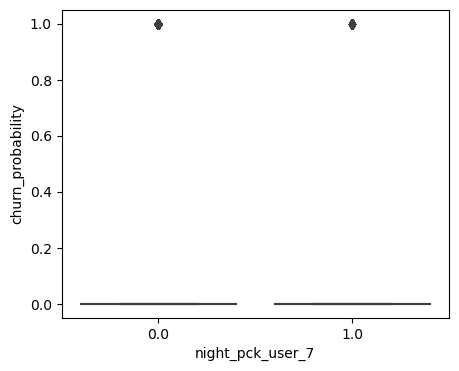

night_pck_user_8


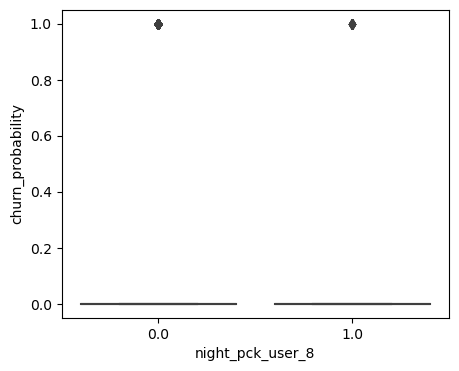

fb_user_6


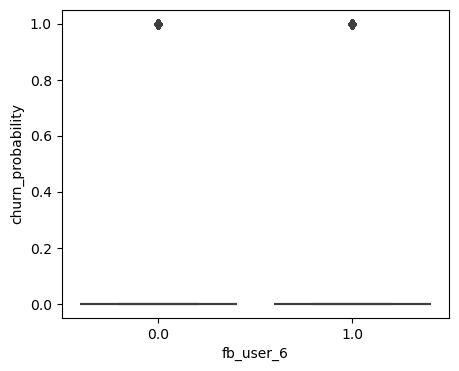

fb_user_7


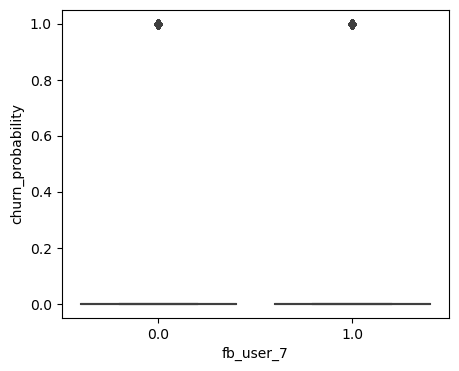

fb_user_8


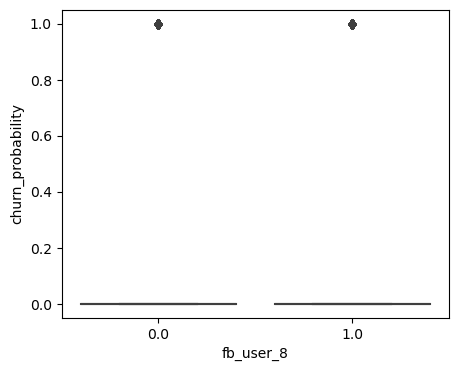

month_present_7


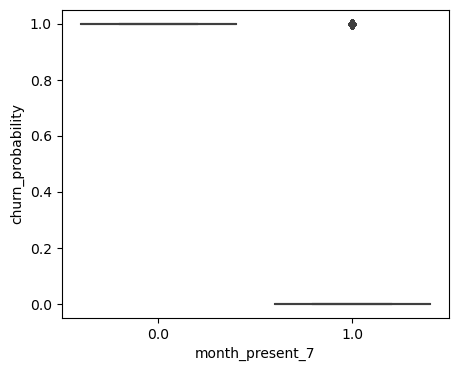

month_present_8


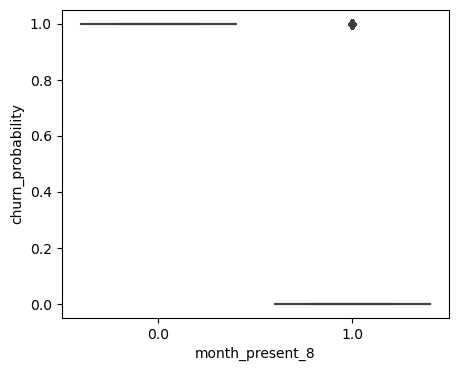

In [92]:
# Bivariate analysis - Box plots for all categorical predictor variables against the target variable saleprice

for col1 in categorical_cols:
        print(col1)
        plt.figure(figsize=(5, 4))
        sns.boxplot(x=col1,y='churn_probability', data = data_refined_1)
        plt.show()

#### Key observation: Churn probability is always 1 for where months present 7 and 8 are 0. 

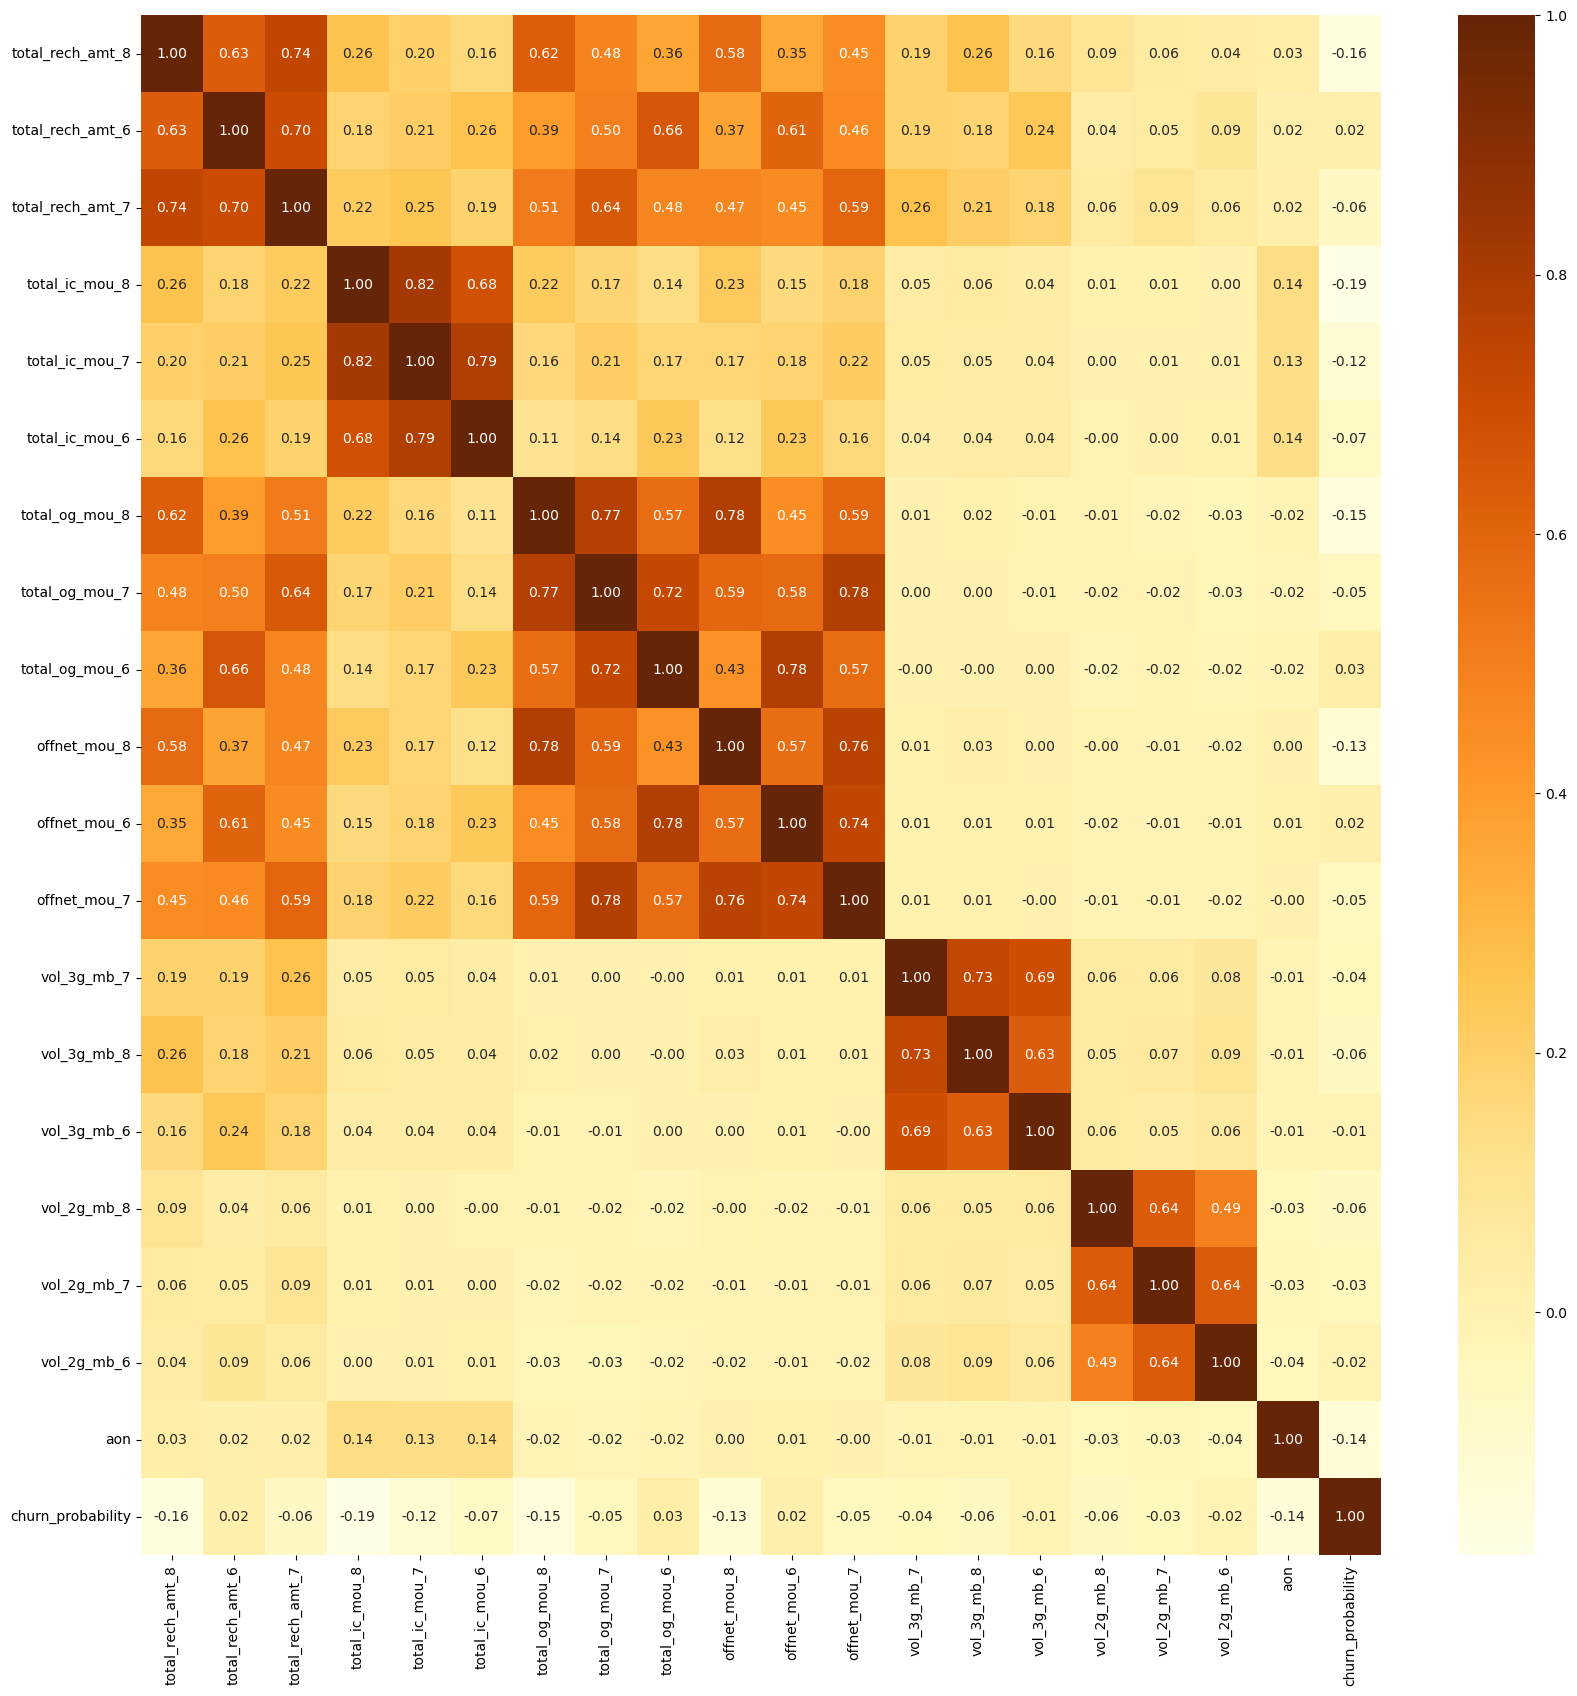

In [93]:
# Correlations
plt.figure(figsize=(20,20))
sns.heatmap(data_refined_1[numeric_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

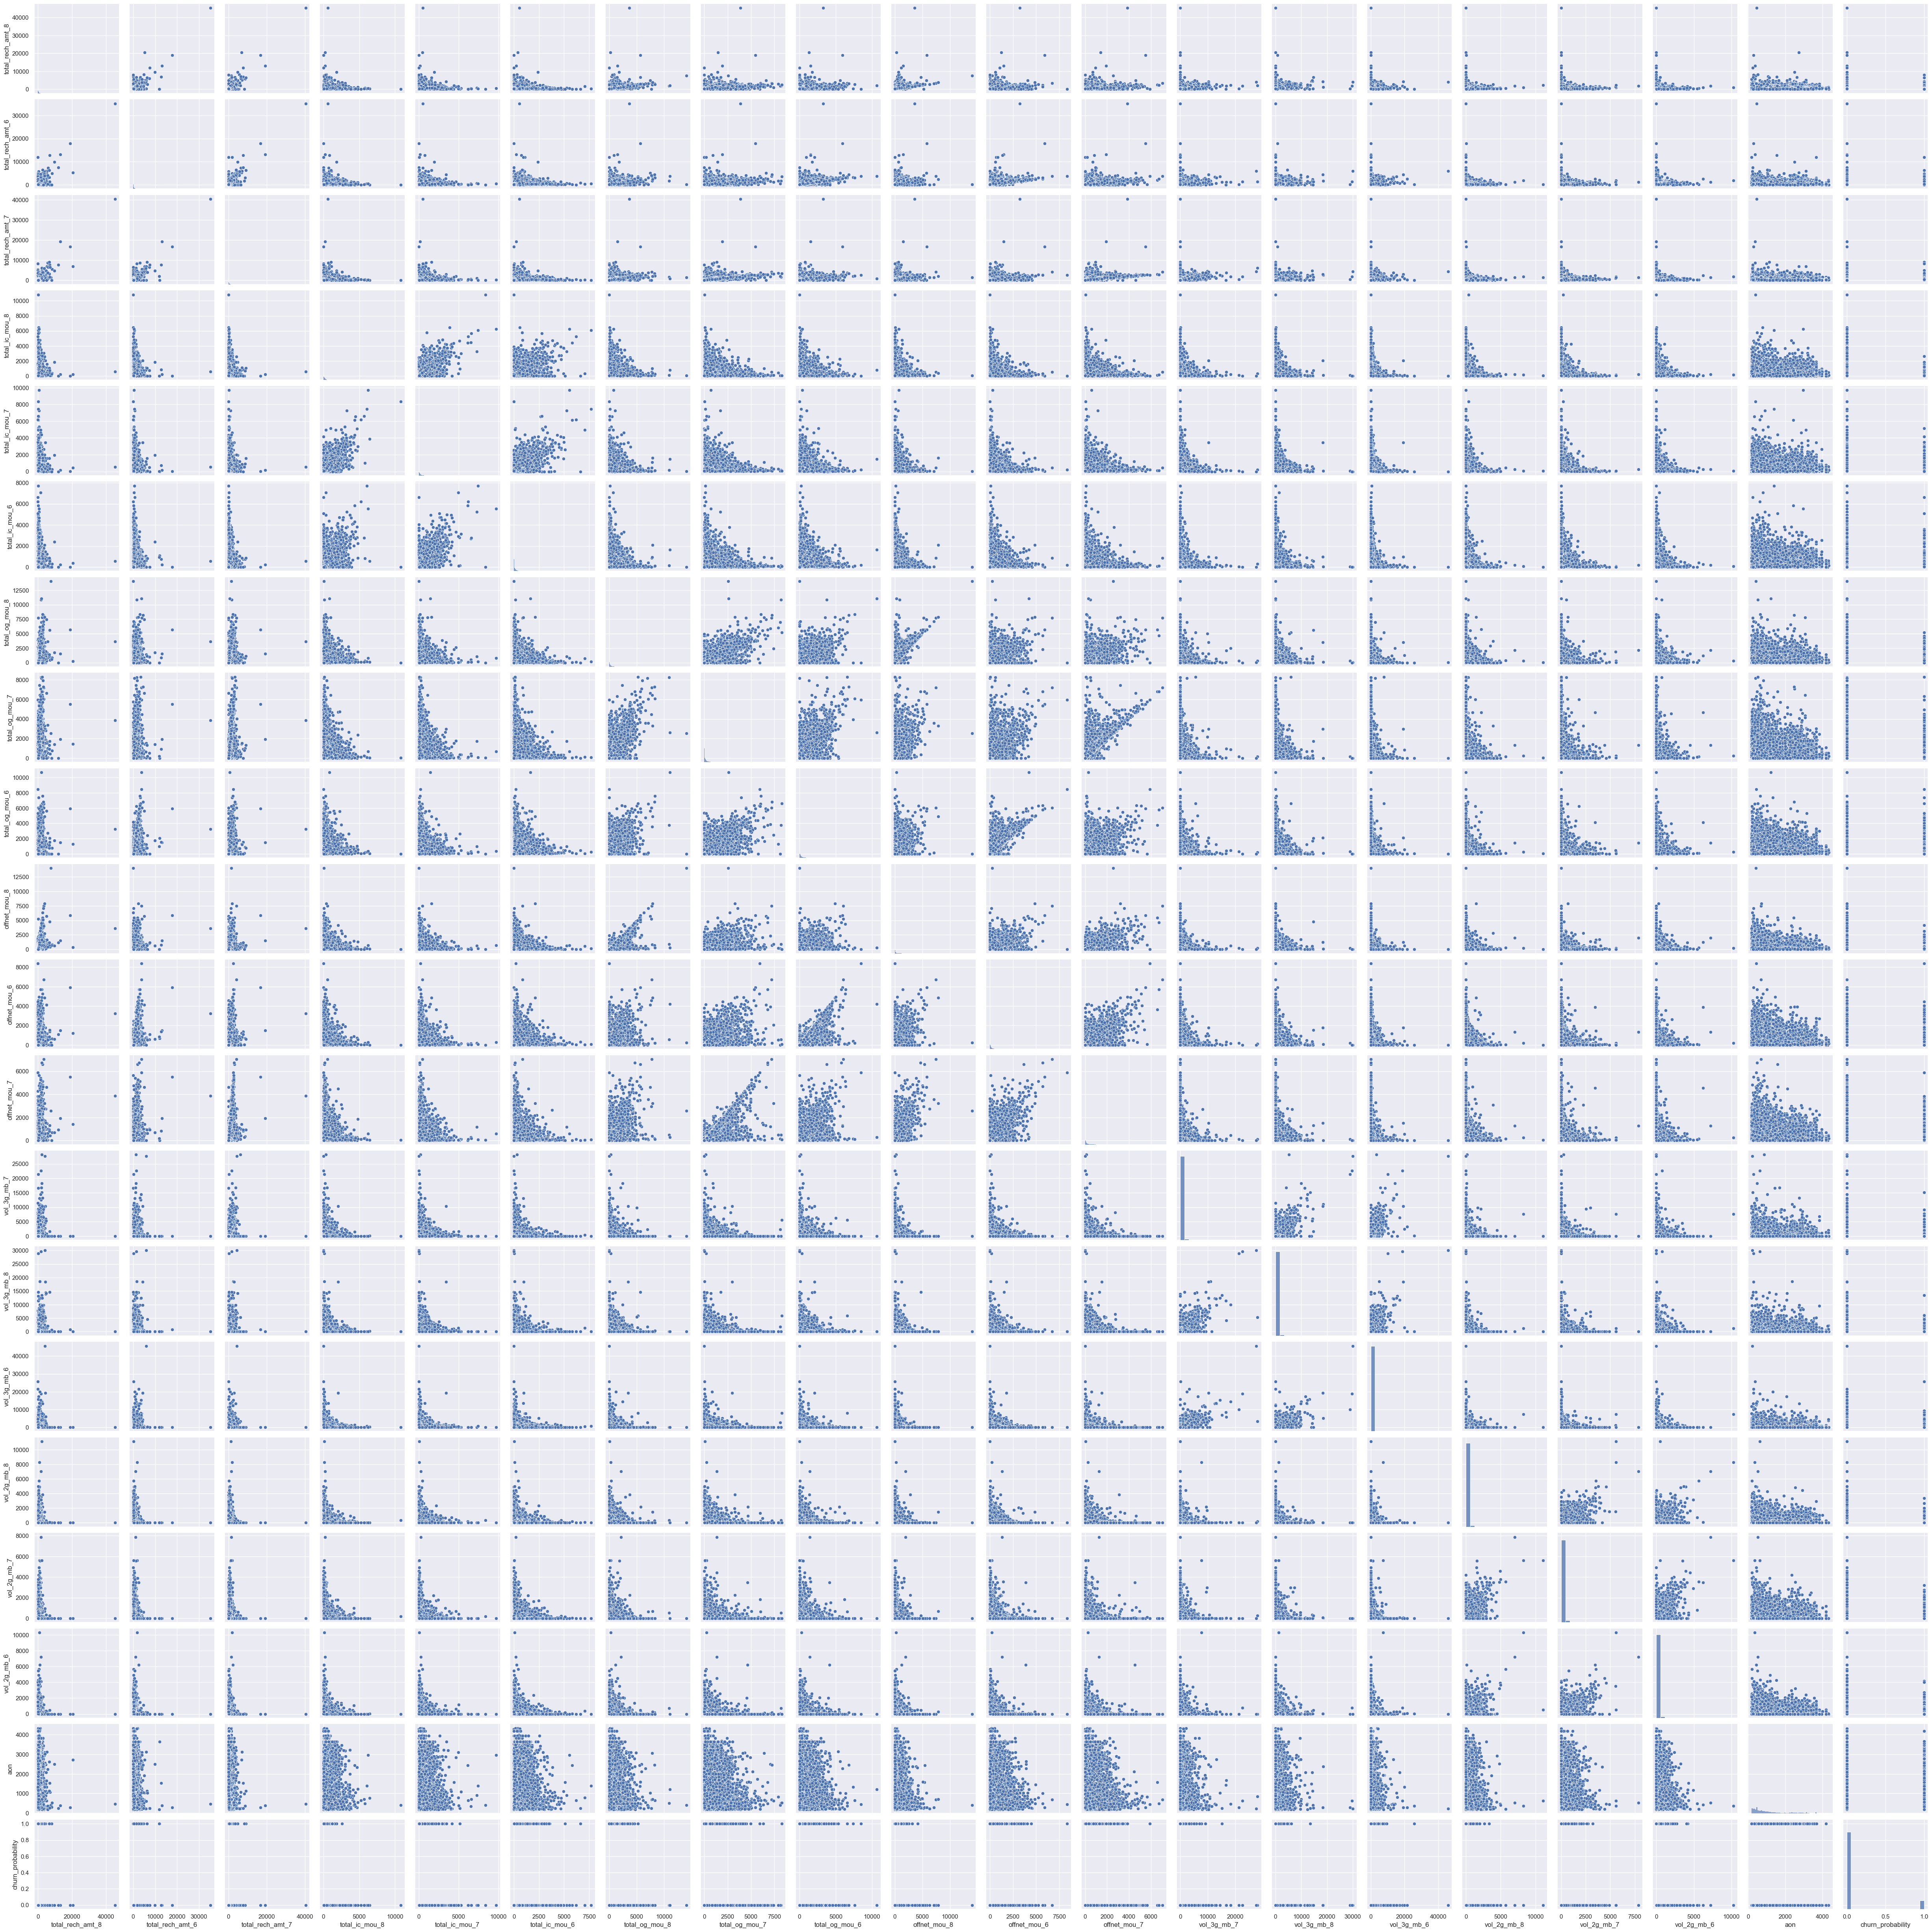

In [99]:
# Pairplots 
sns.set()
sns.pairplot(data=data_refined_1,vars=numeric_cols, size=2.5)
plt.show()

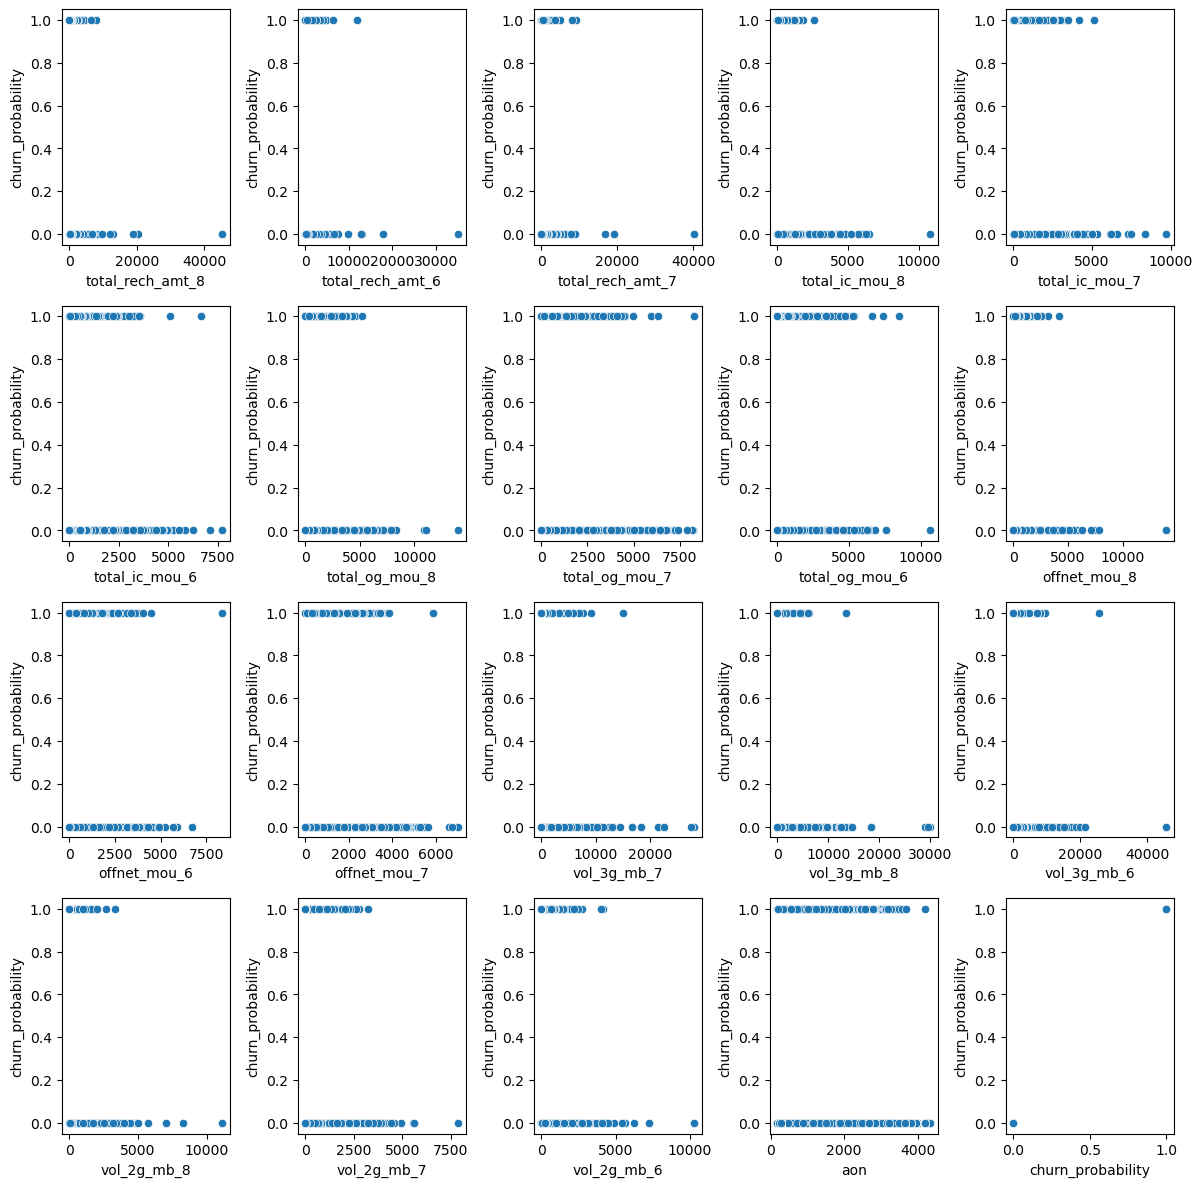

In [98]:
#Check the impact of these columns with SalePrice for predictive ability

fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.scatterplot(x=data_refined_1[col],y=data_refined_1['churn_probability'])
    plt.tight_layout()

#### Next Steps in the analysis and modelling

1. Calculate differences in recharge amounts and counts between the months 6(good phase) and 7 (action phase)
2. Drop columns related to the churn month (_8) from the analysis
3. Perform EDA again following these changes
4. Standard Scaler
5. PCA
6. Build models (start with Logistic Regression)
7. Before predicting on test data, apply all the data transformation including scaling & PCA on test data too.
8. Predictions
9. Model evaluations


In [8]:
# Converting the dates to recency and finally converting them to numerical variables:
#import datetime as dt
#for i in other_variables:
 #   data_refined_1[i]=pd.to_datetime(data_refined_1[i],format='%m/%d/%Y')
    
 #   data_refined_1['recency_'+i]=data_refined_1[i].max()-data_refined_1[i]
 #   data_refined_1['recency_'+i]=data_refined_1['recency_'+i].dt.days
 #   data_refined_1=data_refined_1.drop(i,axis=1)

    


In [10]:
# Removing the columns which do not have any variance:
#cols=data_refined_1.describe().columns
#cols=cols[(np.array(data_refined_1.describe()['std':])!=0)[0]]
#data_final=data_refined_1[cols]

In [86]:
# Having a final look at the info of the data:
#data_final.info(verbose=1)

#### Scaling:

In [77]:
# Using SimpleImputer to impute the data with median values:
#from sklearn.impute import SimpleImputer
#imputer=SimpleImputer(strategy='median')
#arr=imputer.fit_transform(data_final)

In [ ]:
# Scaling the data:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
arr_scaled=scaler.fit_transform(arr)
df=pd.DataFrame(arr_scaled)
df.columns=data_final.columns

# All the columns are now numeric columns:
num_variables=list(df.columns)
num_variables

In [13]:
np.percentile(df['recency_date_of_last_rech_7'],20)

0.03333333333333333

In [14]:
def outlier_removal(arr,k):
    upper_limit=np.percentile(arr,80)
    lower_limit=np.percentile(arr,20)
    iqr=upper_limit-lower_limit
    arr=df[(arr>lower_limit-k*iqr) and (arr<upper_limit+k*iqr)]
    return arr

In [41]:
df.describe()

isd_og_mou_8  std_ic_t2f_mou_8  std_og_mou_8  std_ic_t2m_mou_8  \
count  69999.000000      69999.000000  69999.000000      69999.000000   
mean       0.000140          0.001409      0.011903          0.003643   
std        0.005064          0.011074      0.028711          0.014414   
min        0.000000          0.000000      0.000000          0.000000   
25%        0.000000          0.000000      0.000000          0.000000   
50%        0.000000          0.000000      0.000751          0.000368   
75%        0.000000          0.000000      0.009347          0.002532   
max        1.000000          1.000000      1.000000          1.000000   

       std_ic_mou_8  std_ic_t2t_mou_8   og_others_8  spl_og_mou_8  \
count  69999.000000      69999.000000  69999.000000  69999.000000   
mean       0.005591          0.002388      0.000079      0.004444   
std        0.018686          0.013445      0.005501      0.016065   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000034          0.000000      0.000000      0.000000   
50%        0.001030          0.000000      0.000000      0.000000   
75%        0.004508          0.000873      0.000000      0.003293   
max        1.000000          1.000000      1.000000      1.000000   

       loc_ic_t2m_mou_8  loc_ic_mou_8  ...  last_day_rch_amt_6  \
count      69999.000000  69999.000000  ...        69999.000000   
mean           0.016817      0.015075  ...            0.015817   
std            0.025844      0.022452  ...            0.024428   
min            0.000000      0.000000  ...            0.000000   
25%            0.003296      0.003275  ...            0.000000   
50%            0.009278      0.008669  ...            0.007481   
75%            0.020369      0.018282  ...            0.027431   
max            1.000000      1.000000  ...            1.000000   

       last_day_rch_amt_7  last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7  \
count        69999.000000        69999.000000  69999.000000  69999.000000   
mean             0.019127            0.014046      0.005033      0.006508   
std              0.030784            0.022926      0.020661      0.026813   
min              0.000000            0.000000      0.000000      0.000000   
25%              0.000000            0.000000      0.000000      0.000000   
50%              0.009677            0.006743      0.000000      0.000000   
75%              0.035484            0.029220      0.000000      0.000000   
max              1.000000            1.000000      1.000000      1.000000   

        vol_2g_mb_8  churn_probability  recency_date_of_last_rech_8  \
count  69999.000000       69999.000000                 69999.000000   
mean       0.004509           0.101887                     0.183441   
std        0.019168           0.302502                     0.200218   
min        0.000000           0.000000                     0.000000   
25%        0.000000           0.000000                     0.033333   
50%        0.000000           0.000000                     0.133333   
75%        0.000000           0.000000                     0.233333   
max        1.000000           1.000000                     1.000000   

       recency_date_of_last_rech_7  recency_date_of_last_rech_6  
count                 69999.000000                 69999.000000  
mean                      0.182265                     0.200921  
std                       0.190603                     0.210235  
min                       0.000000                     0.000000  
25%                       0.033333                     0.034483  
50%                       0.133333                     0.103448  
75%                       0.266667                     0.310345  
max                       1.000000                     1.000000  

[8 rows x 129 columns]

## EDA

### Univariate Analysis:

In [23]:
for i in num_variables:
    arr=np.array(df[i])
    uq=np.percentile(arr,75)
    lq=np.percentile(arr,25)
    iqr=uq-lq
    ul=uq+(3*iqr)
    ll=lq-(3*iqr)
    grouped_df=df[(df[i]<ul) & (df[i]>ll)]
    sns.boxplot(grouped_df[i])
    plt.show()

KeyError: 0

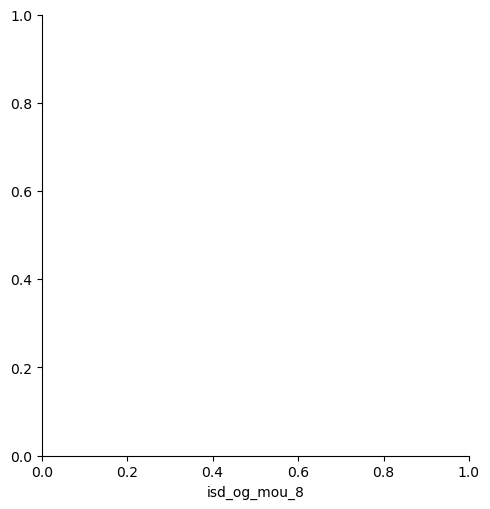

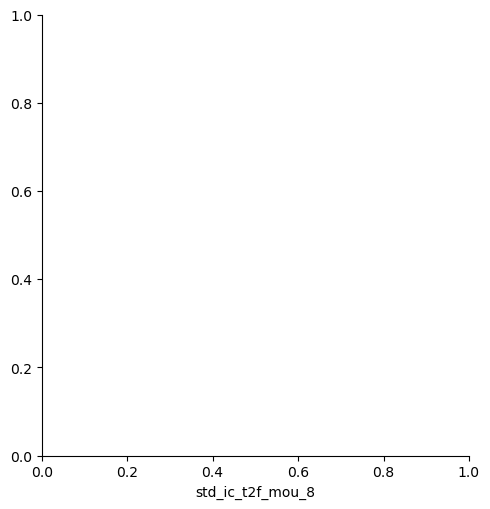

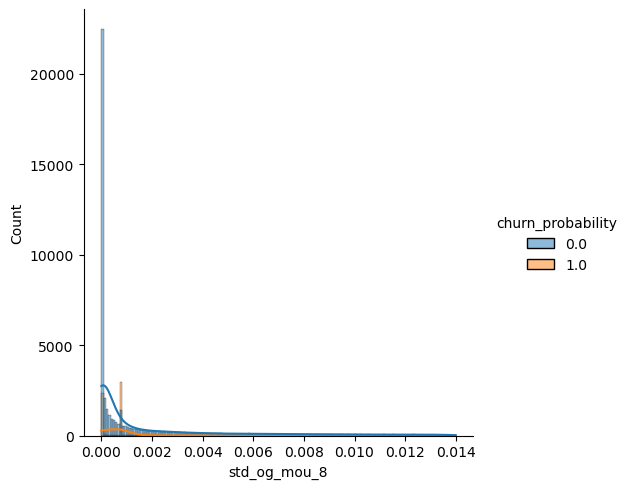

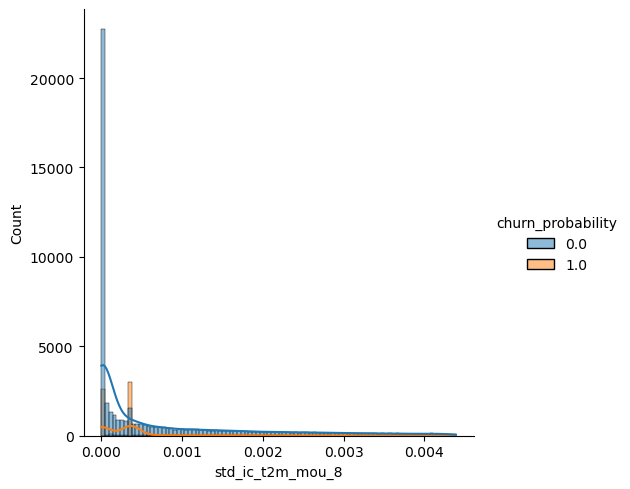

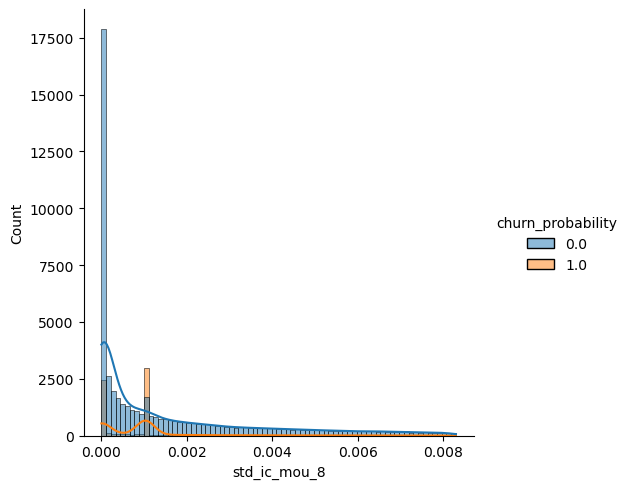

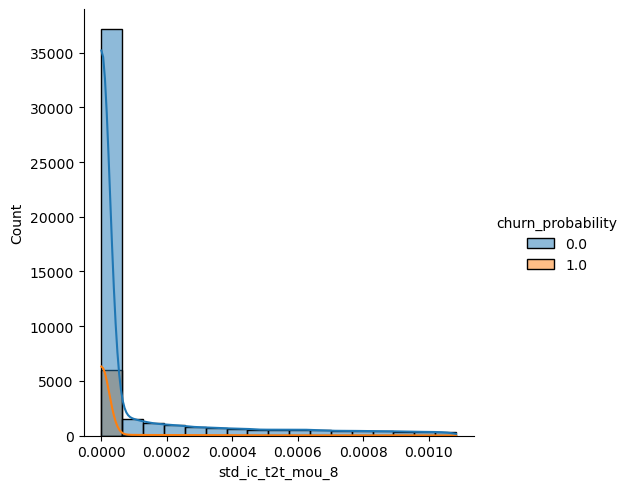

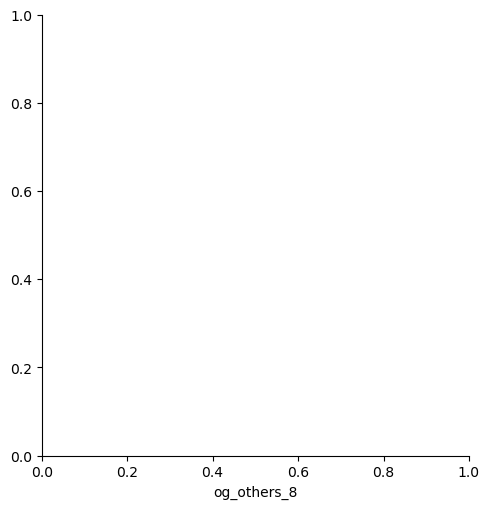

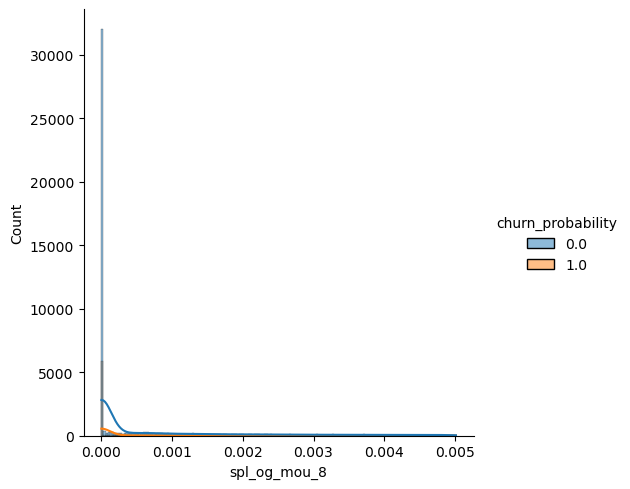

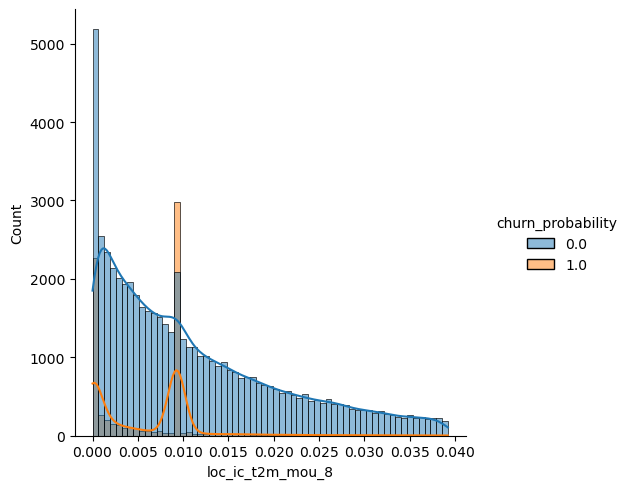

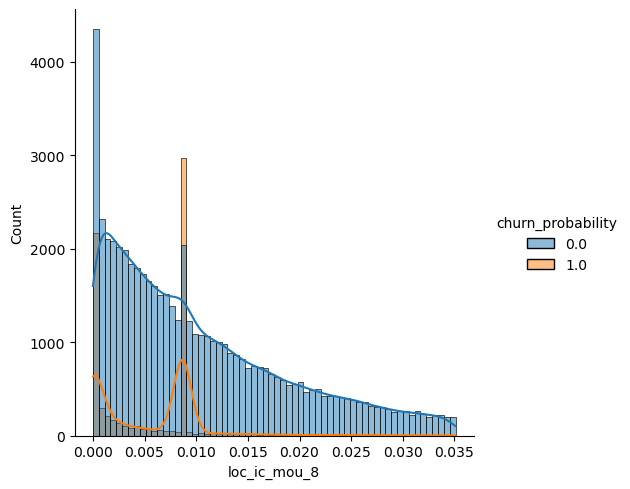

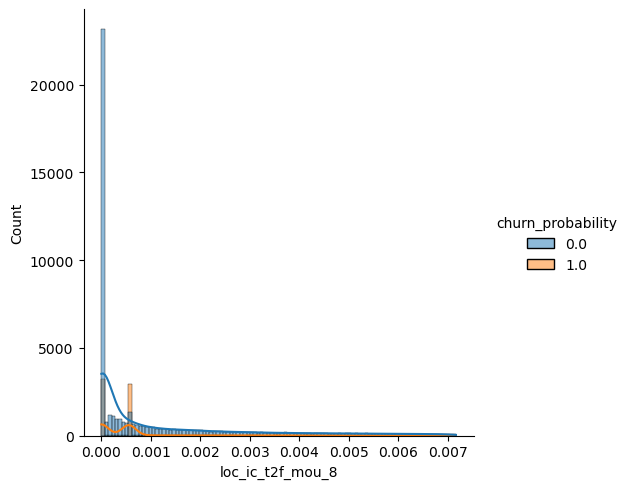

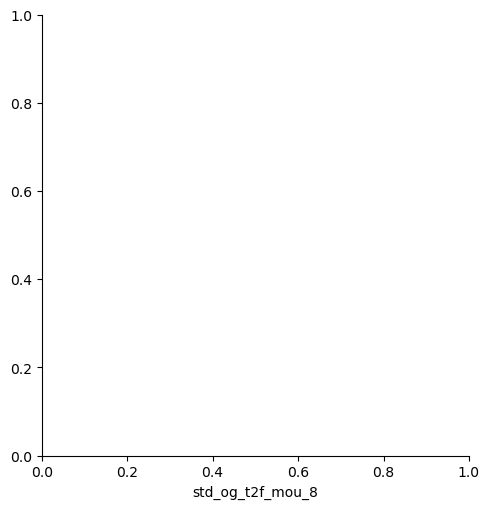

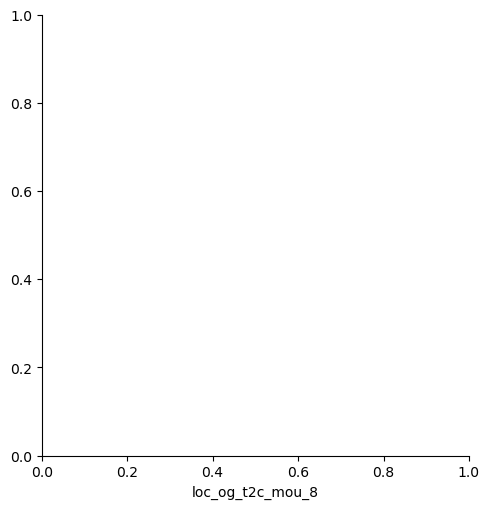

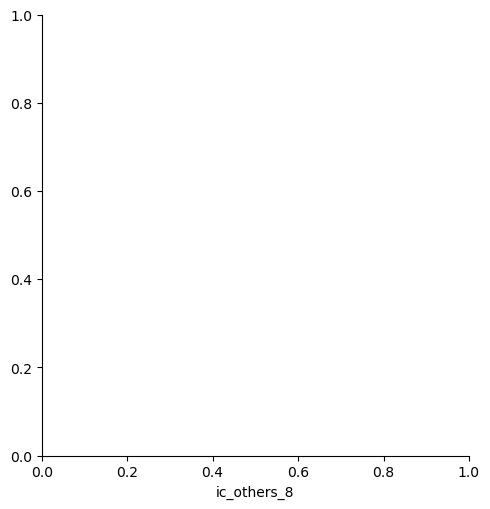

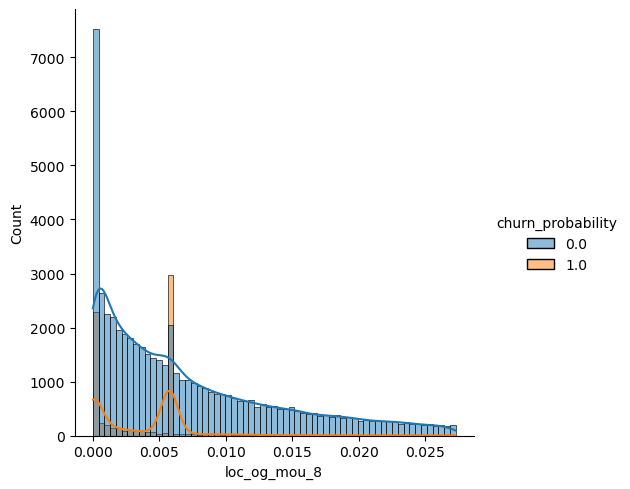

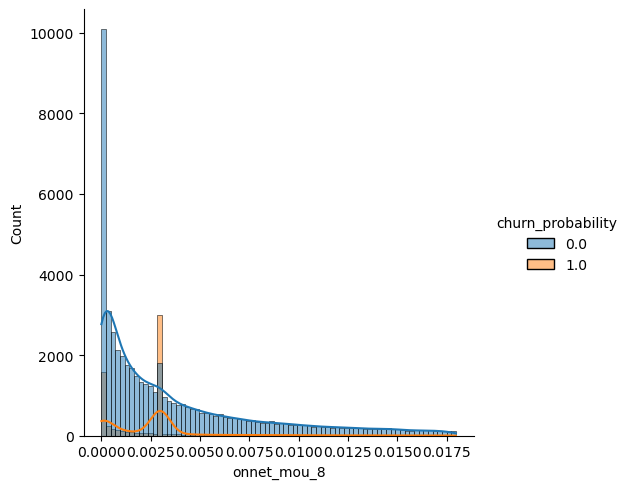

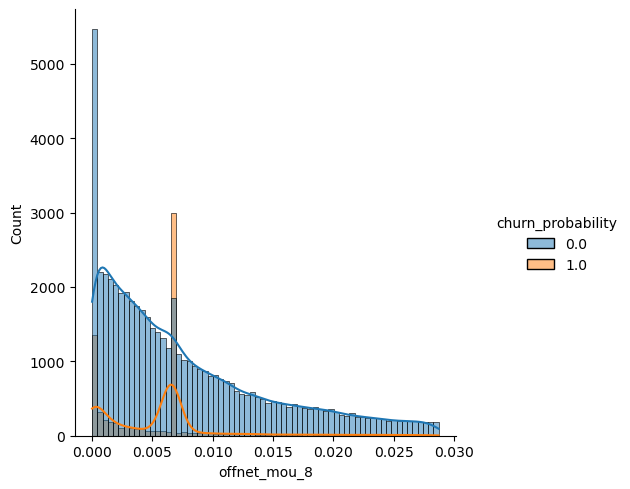

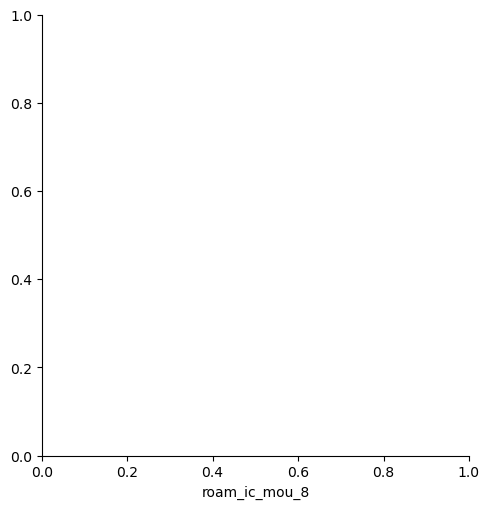

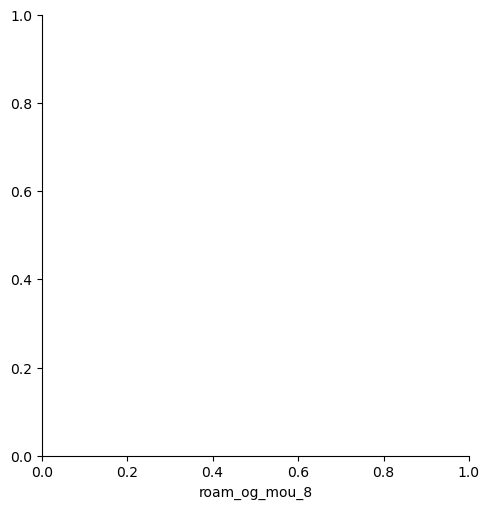

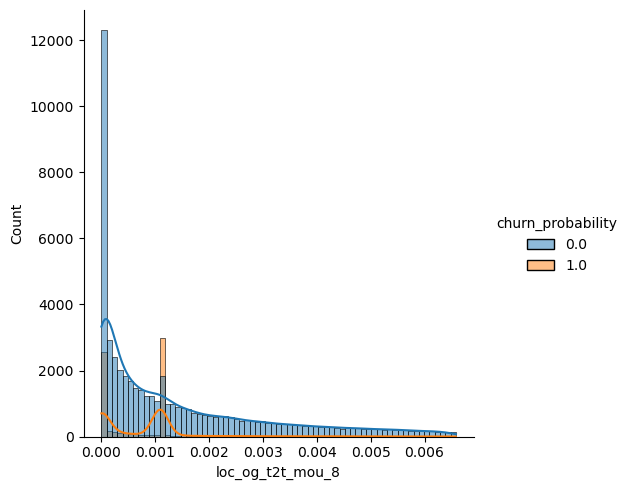

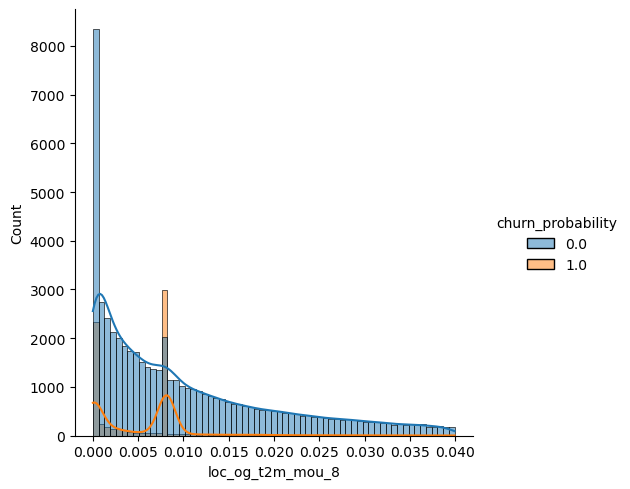

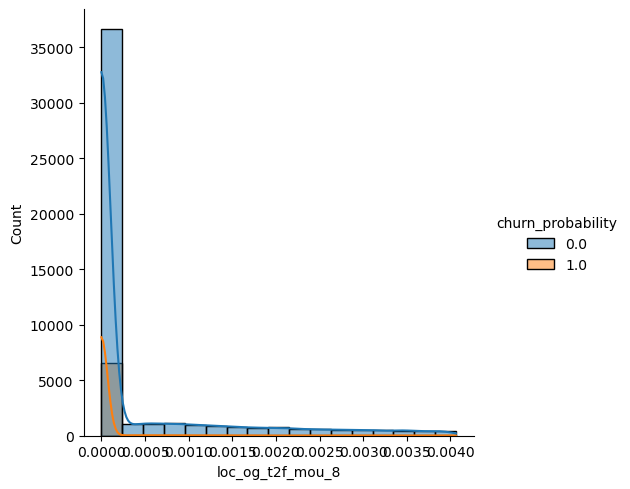

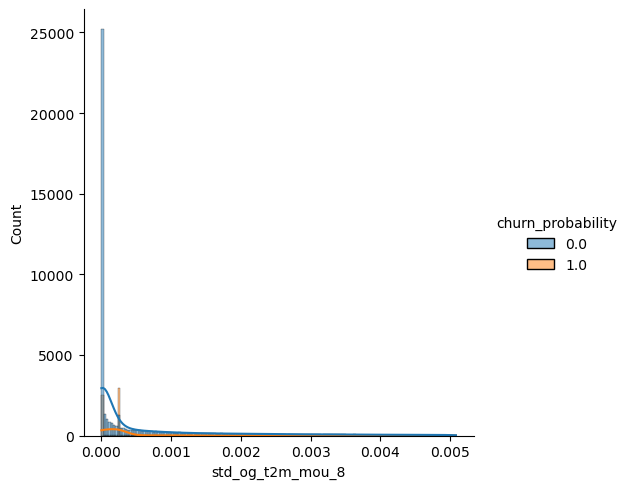

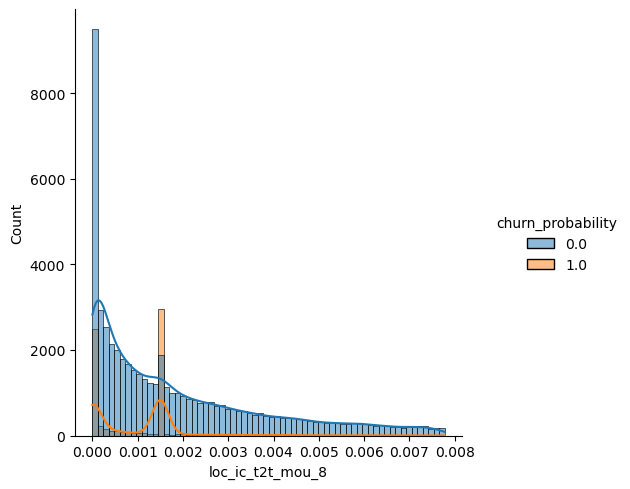

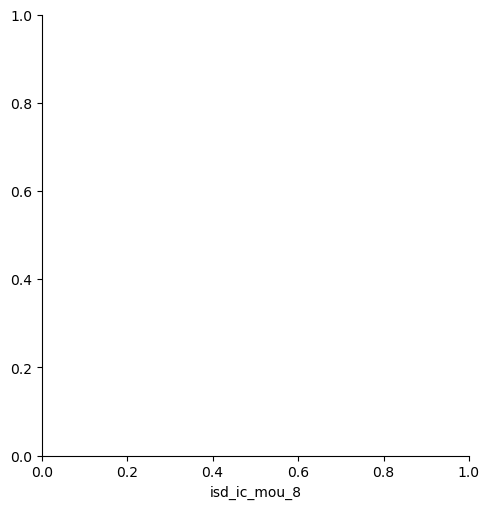

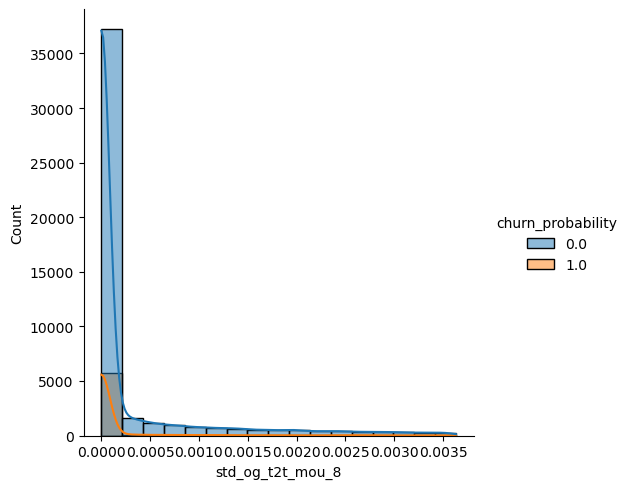

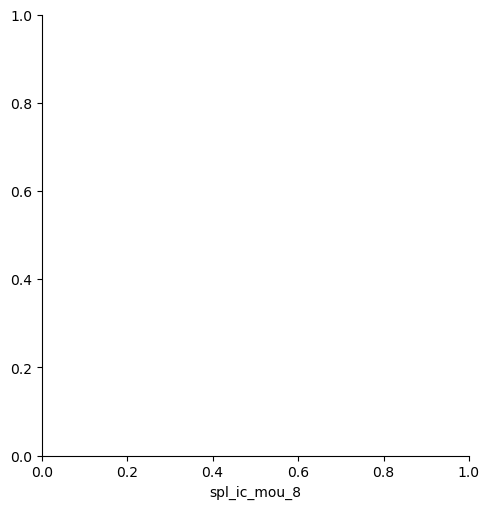

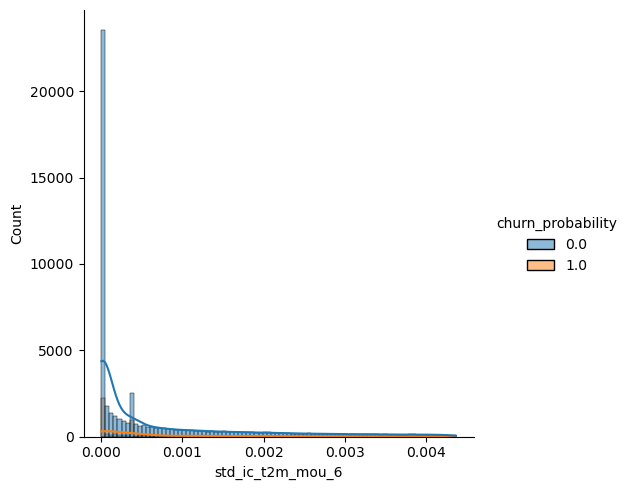

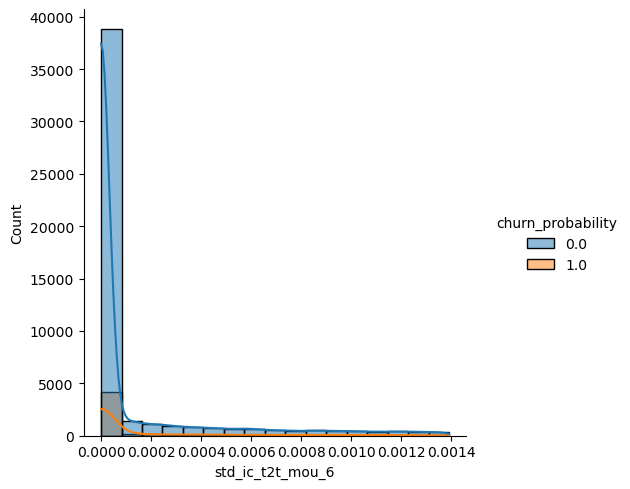

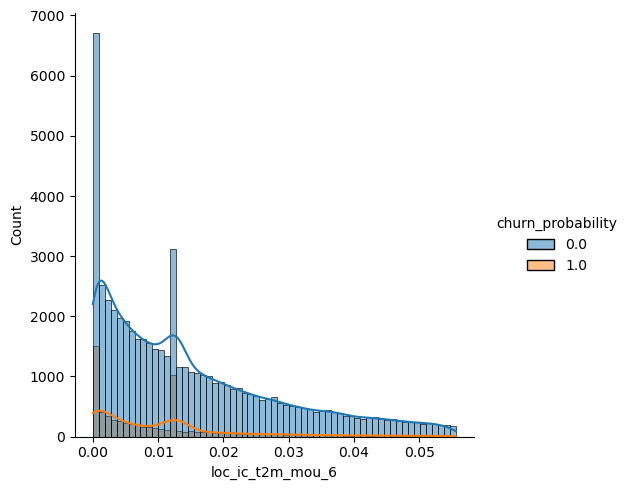

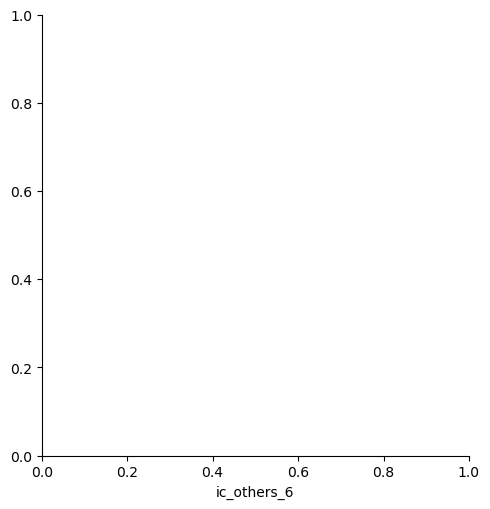

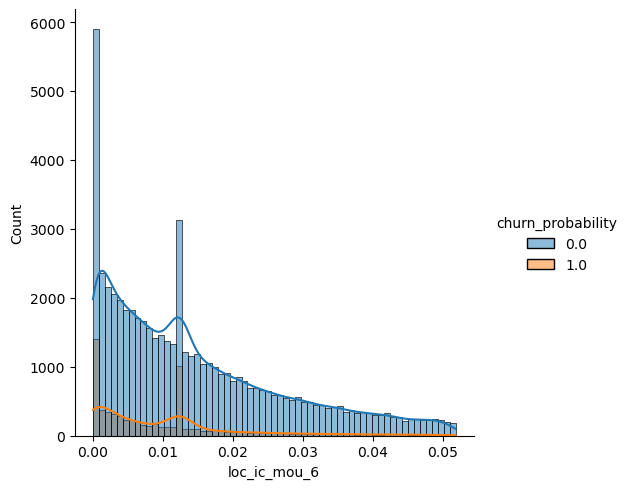

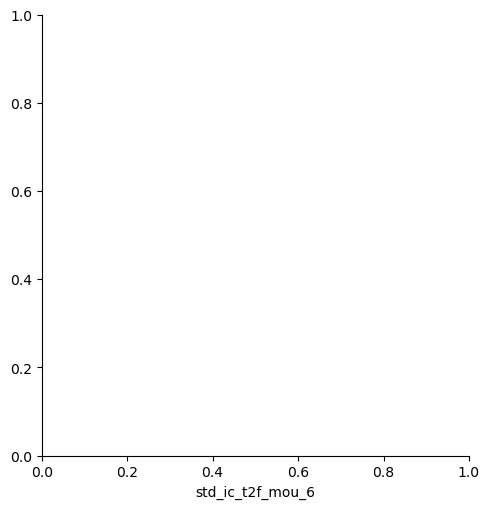

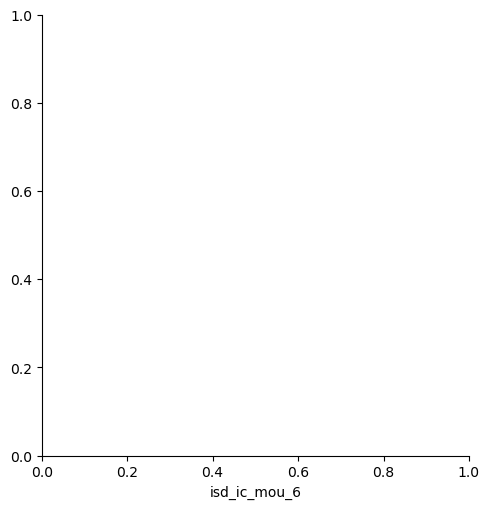

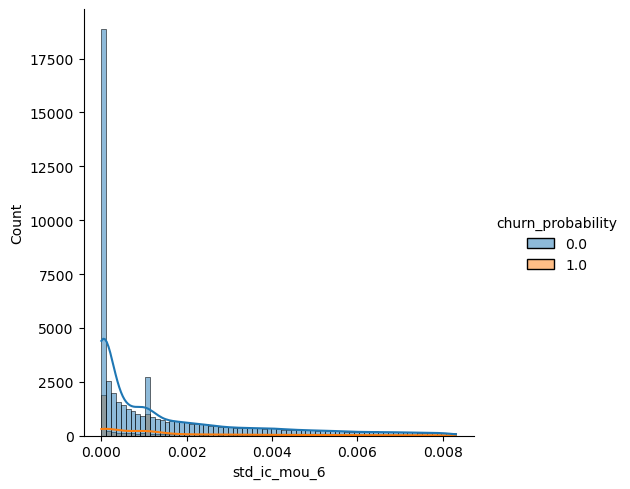

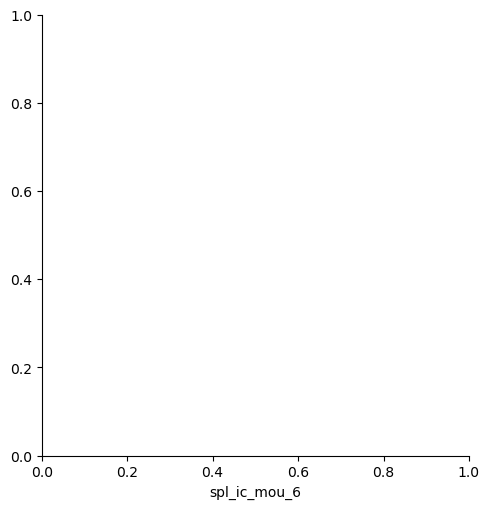

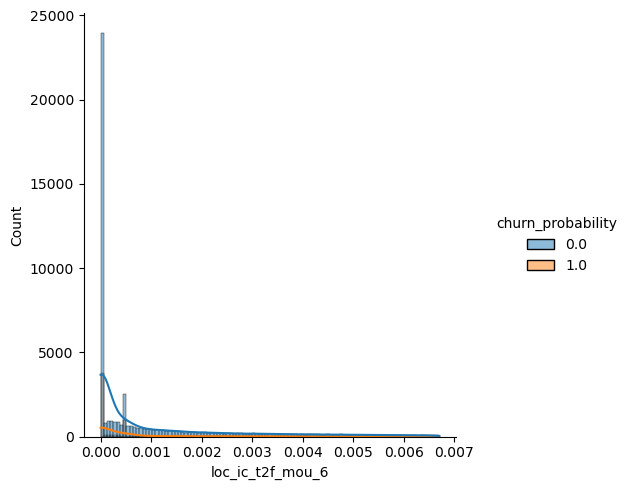

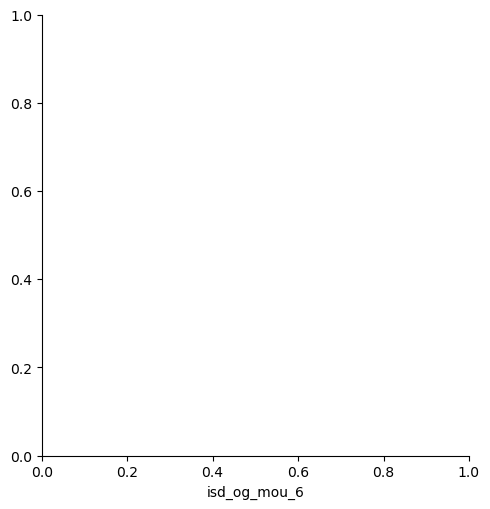

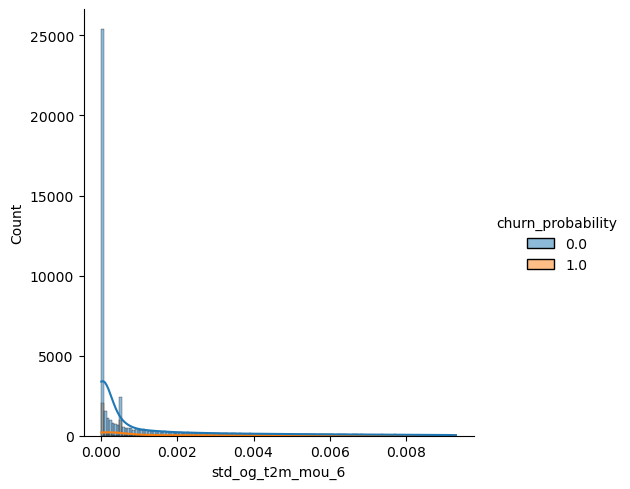

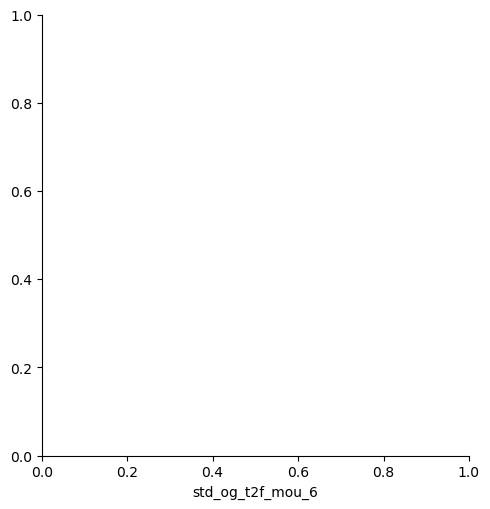

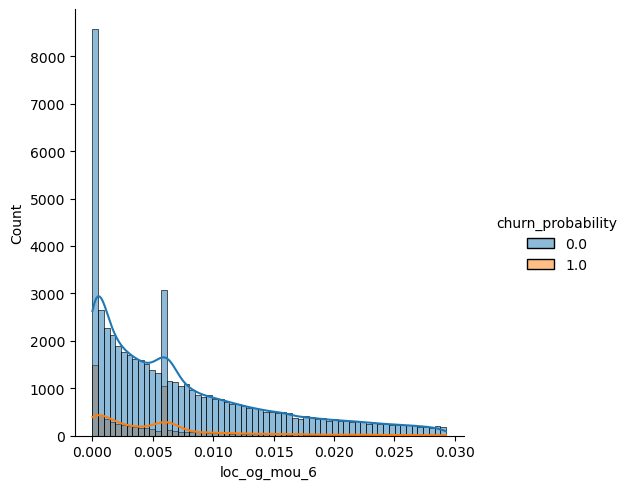

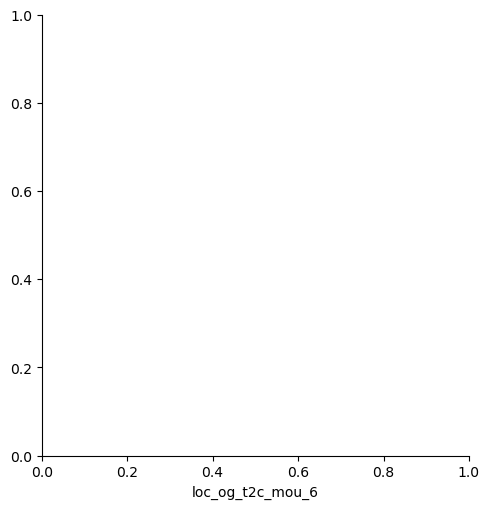

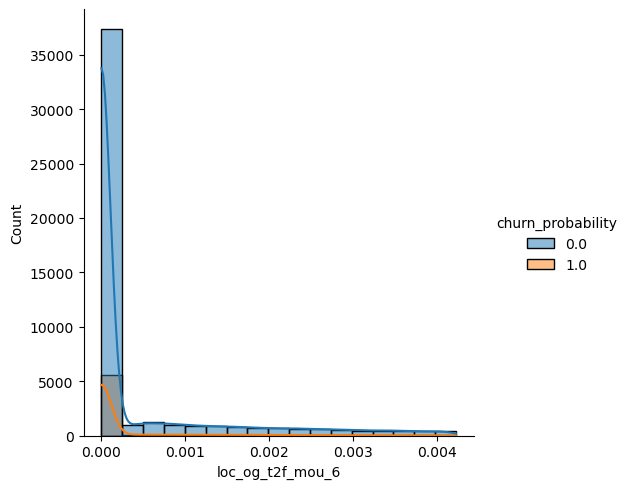

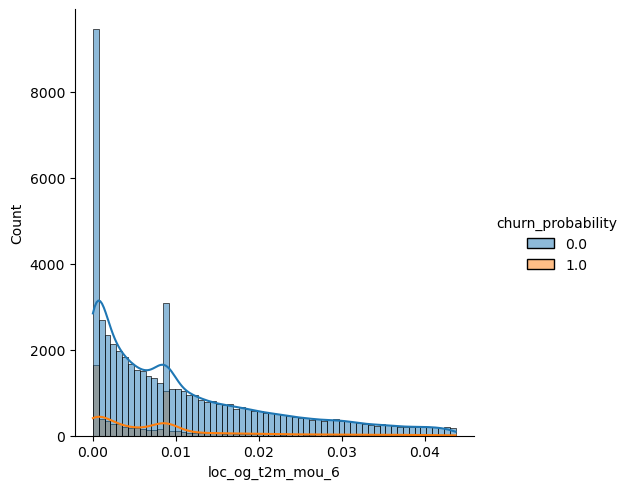

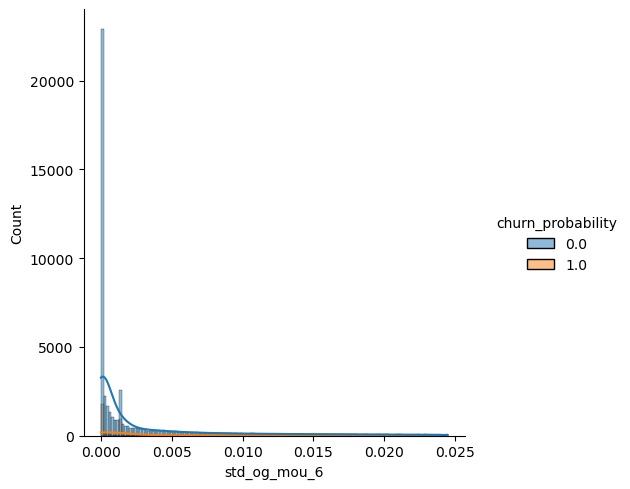

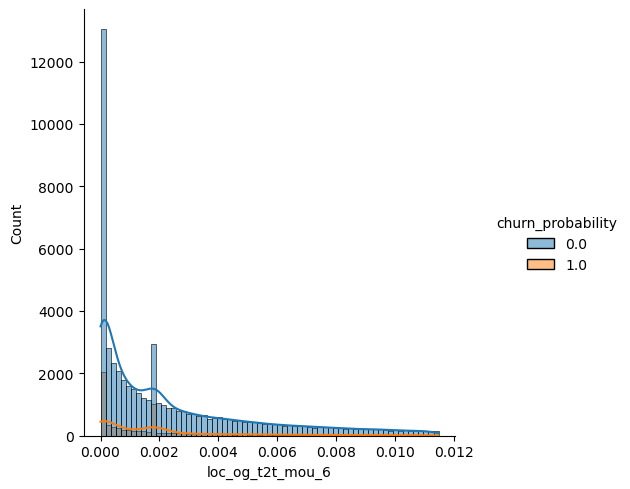

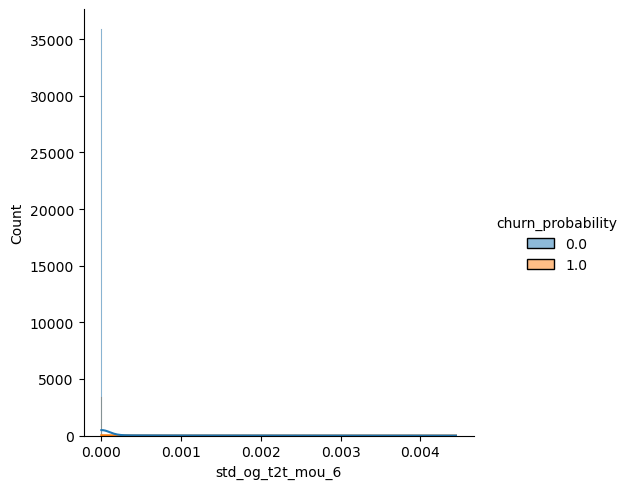

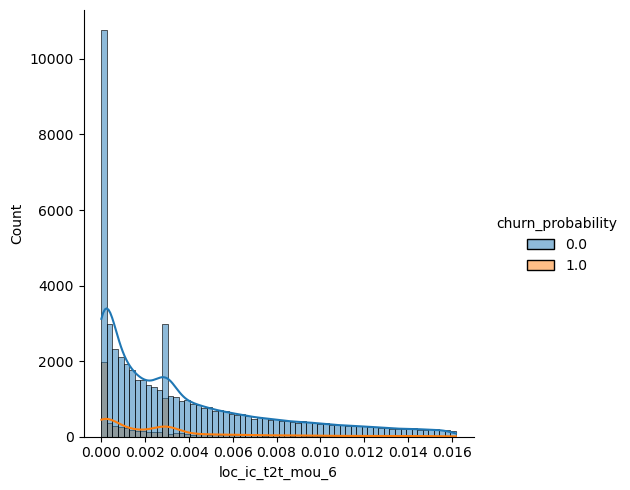

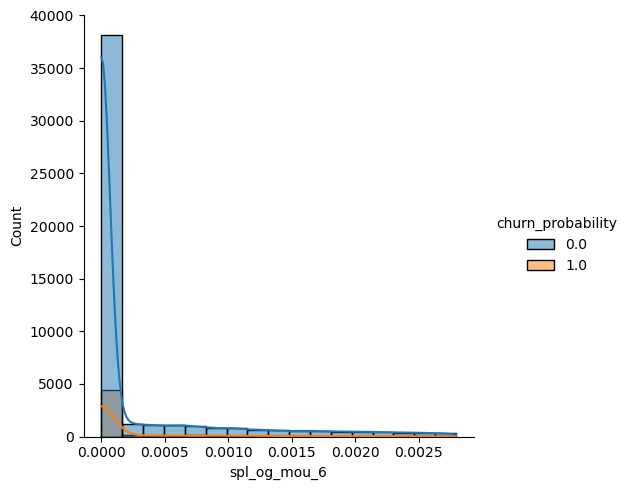

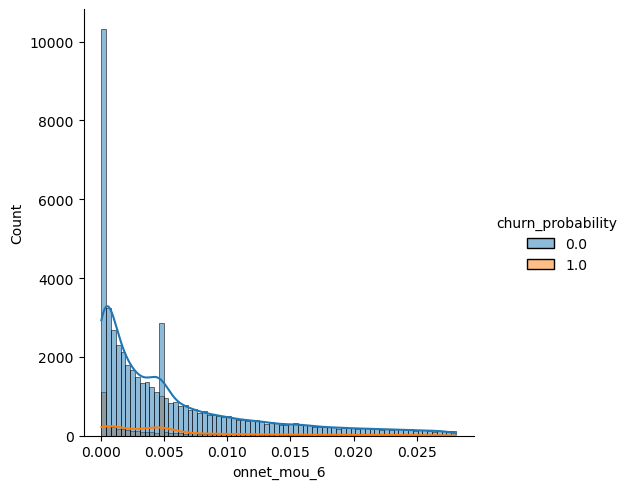

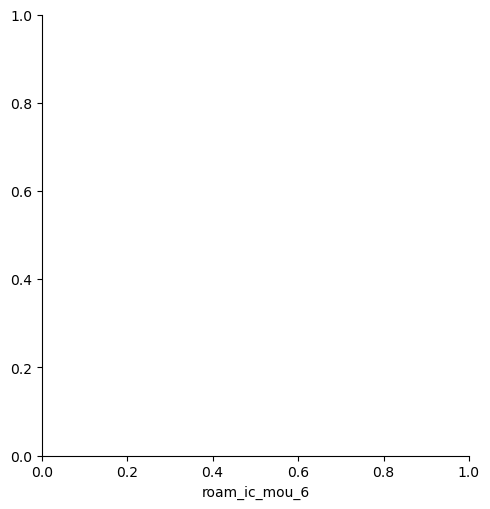

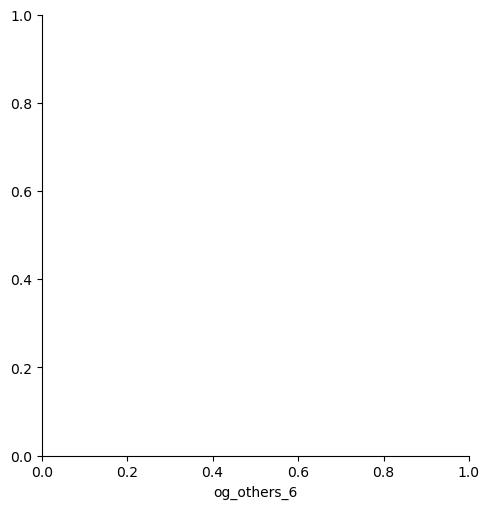

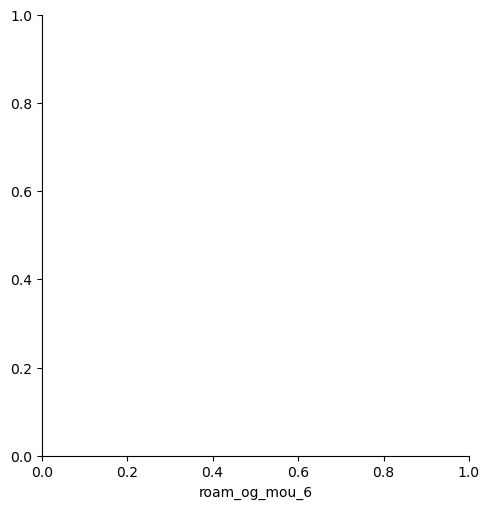

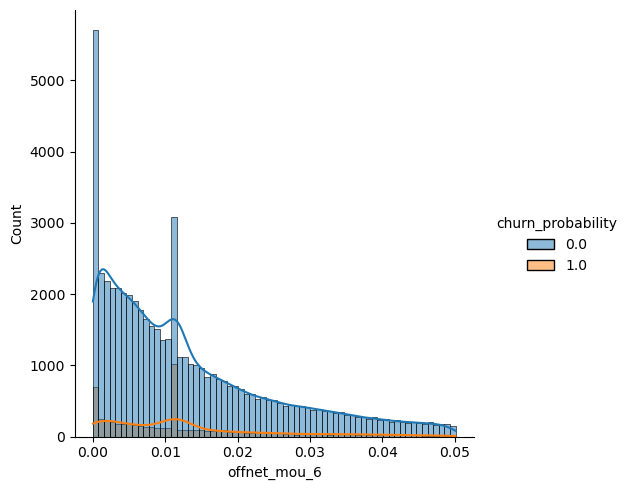

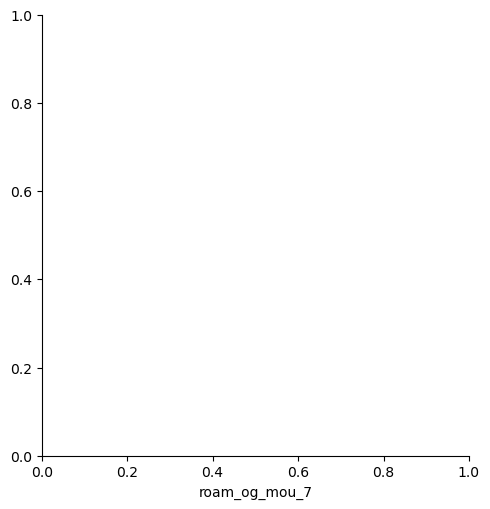

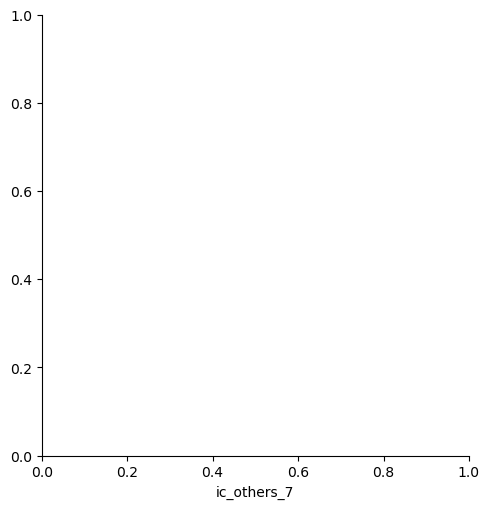

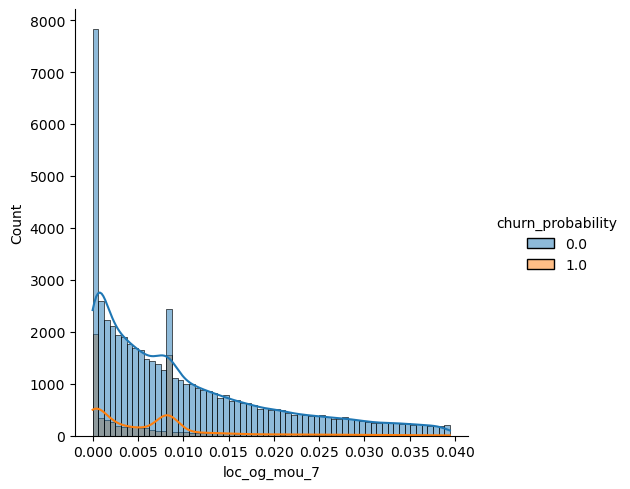

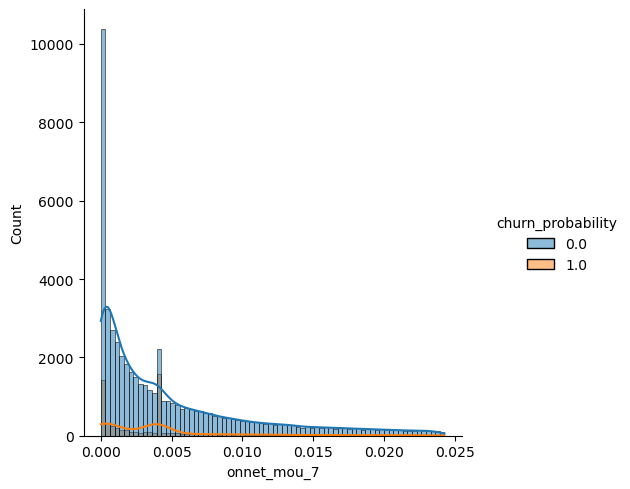

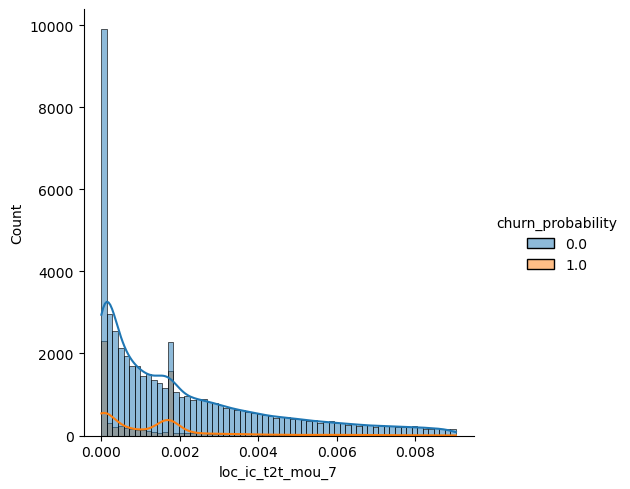

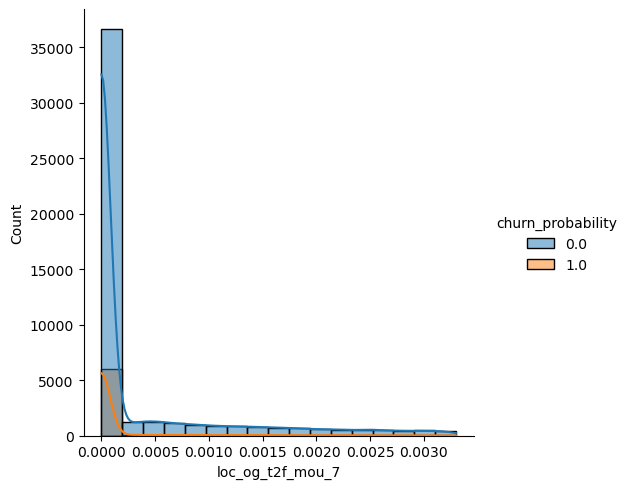

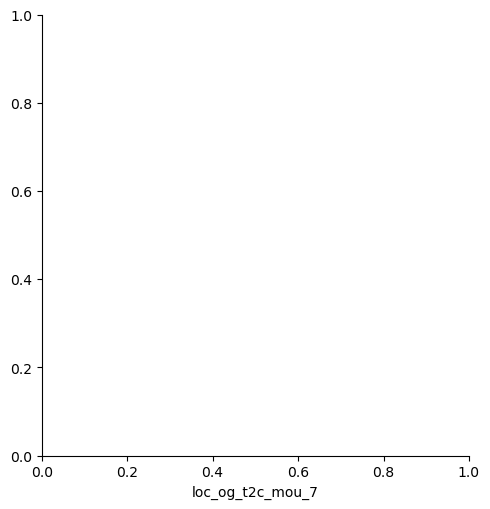

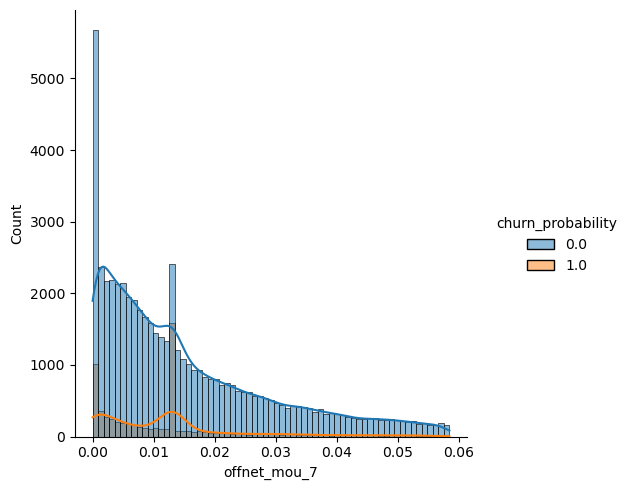

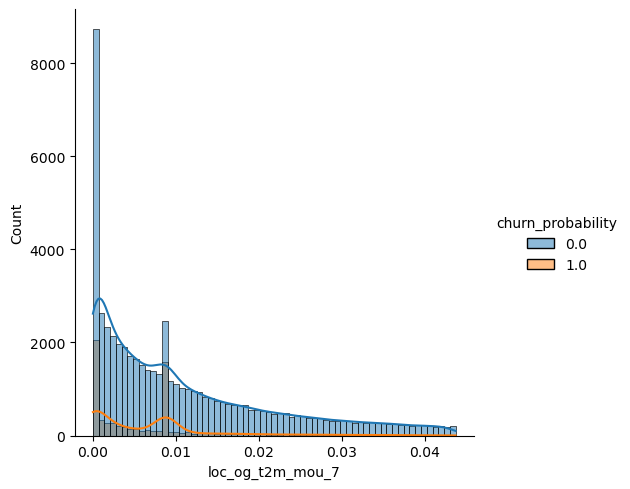

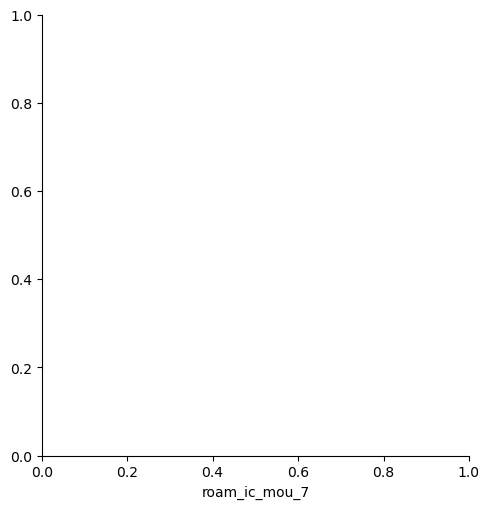

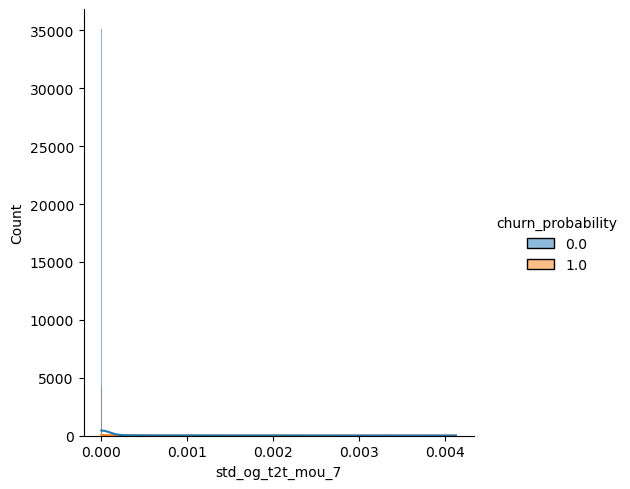

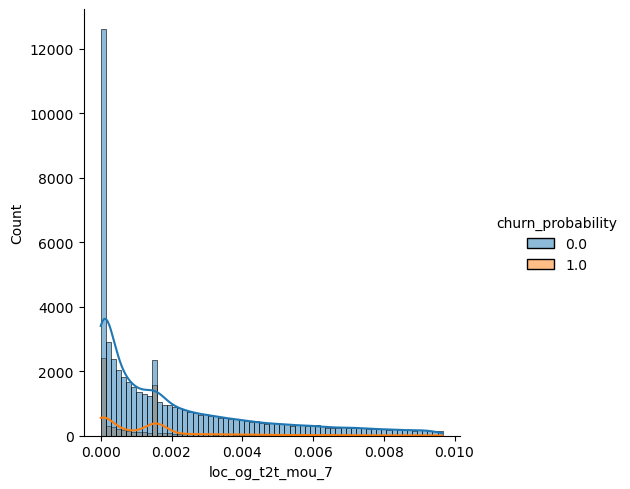

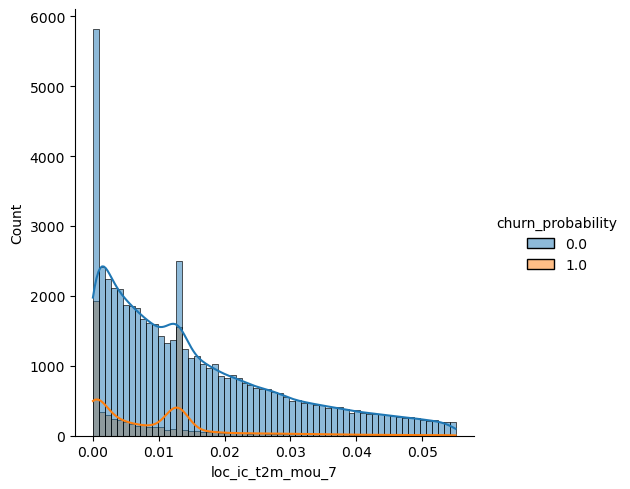

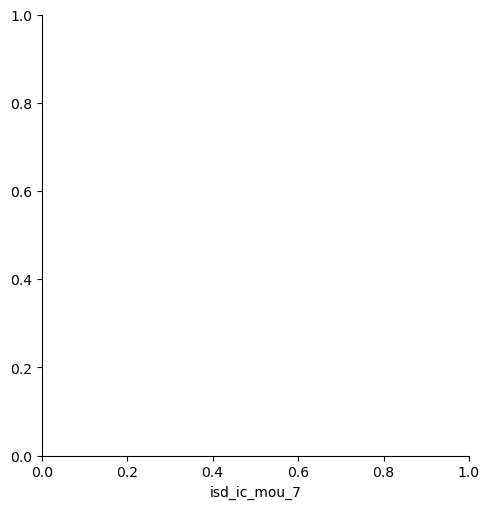

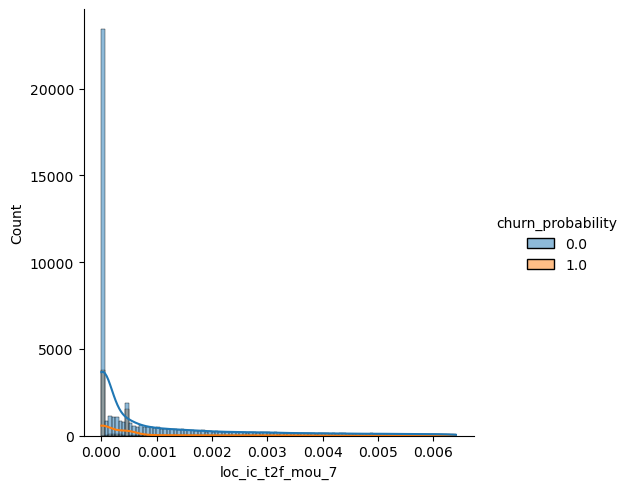

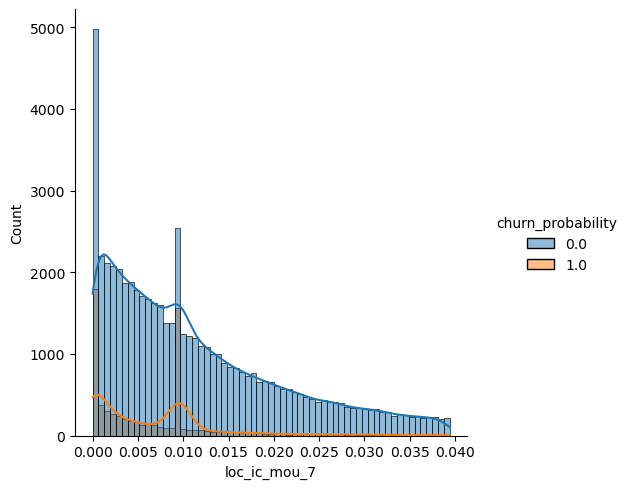

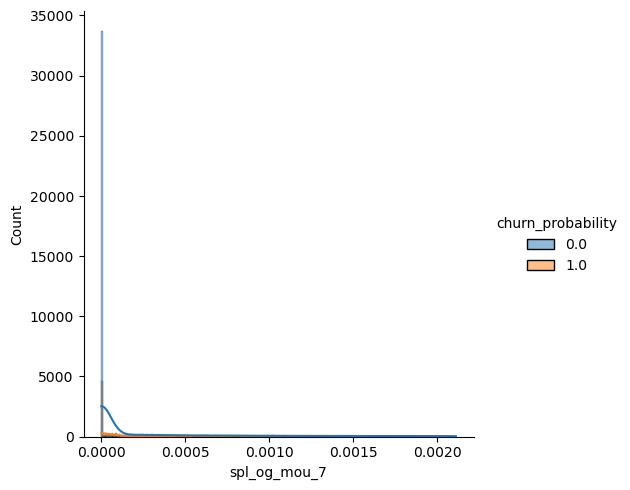

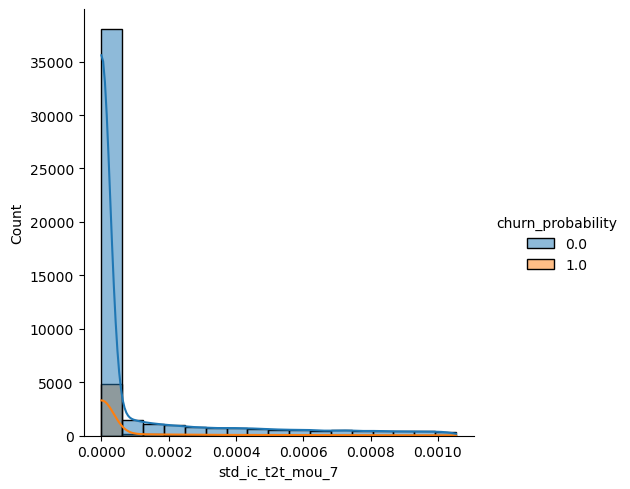

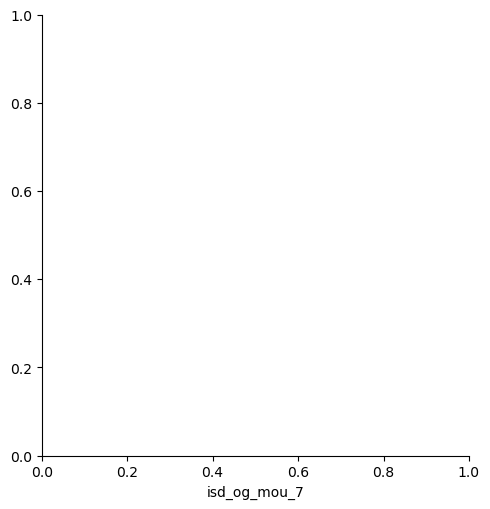

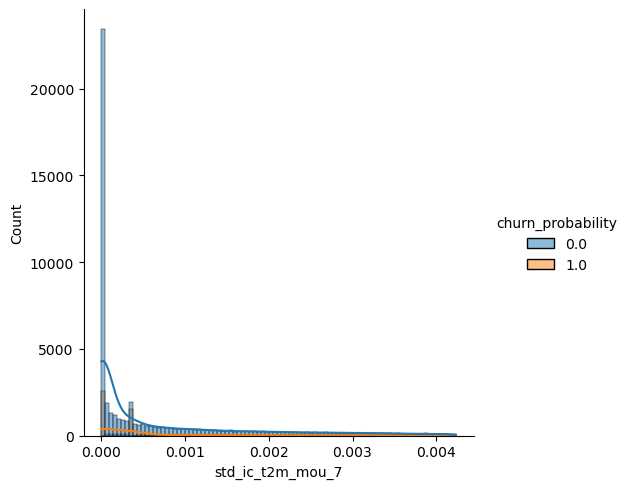

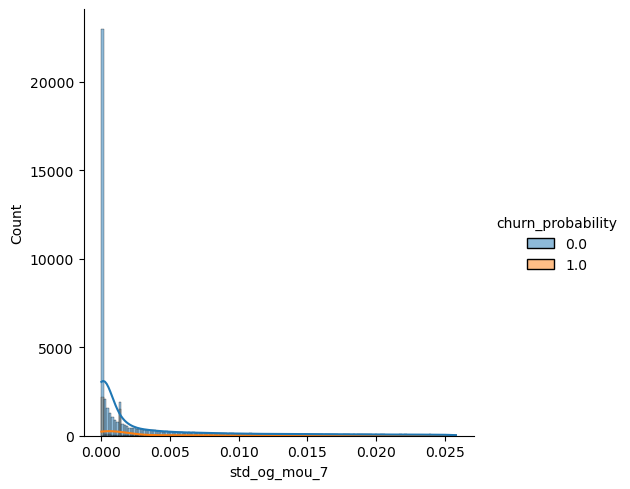

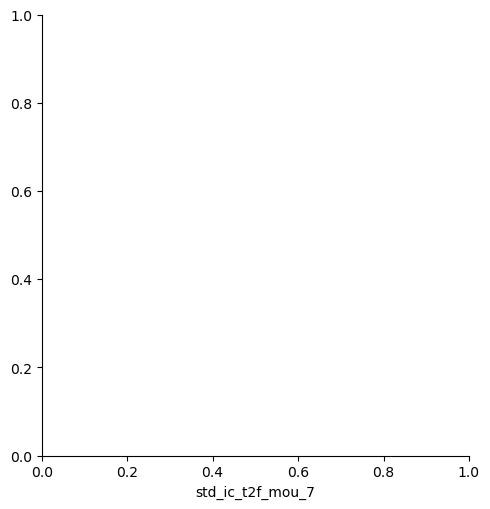

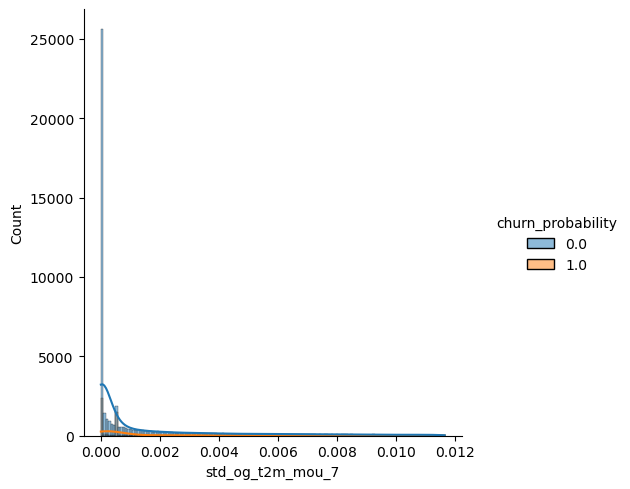

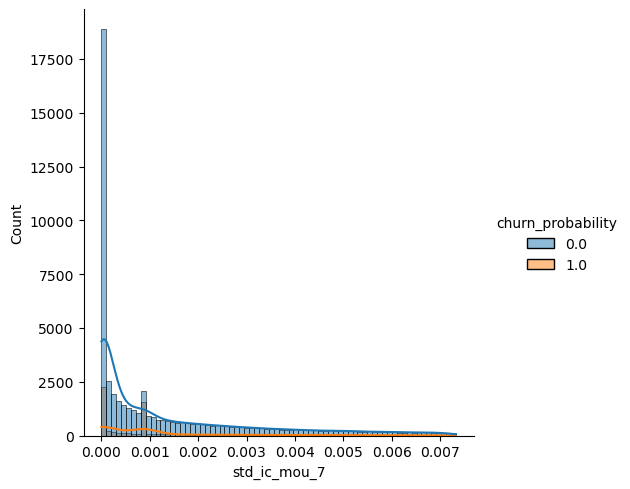

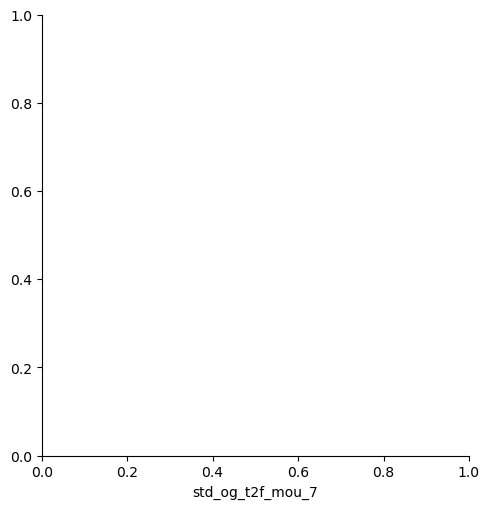

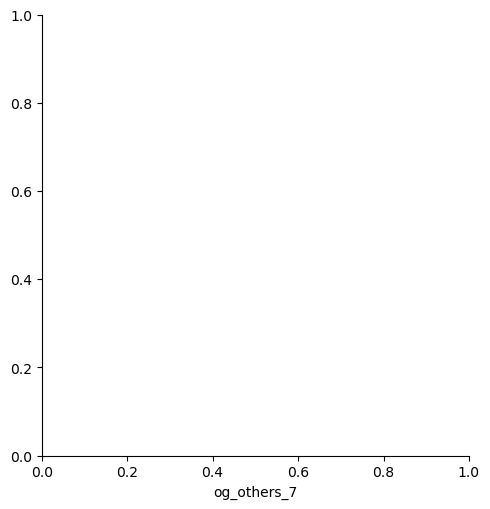

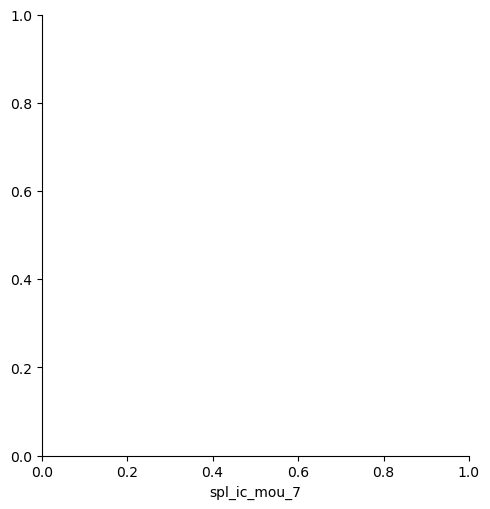

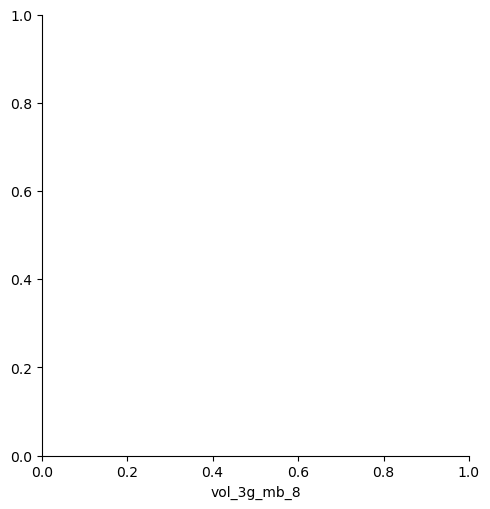

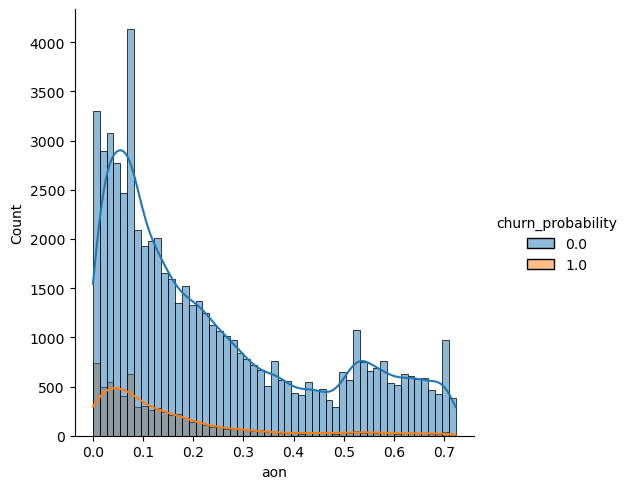

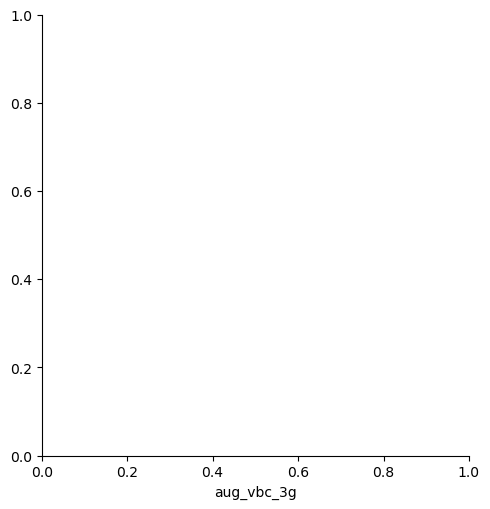

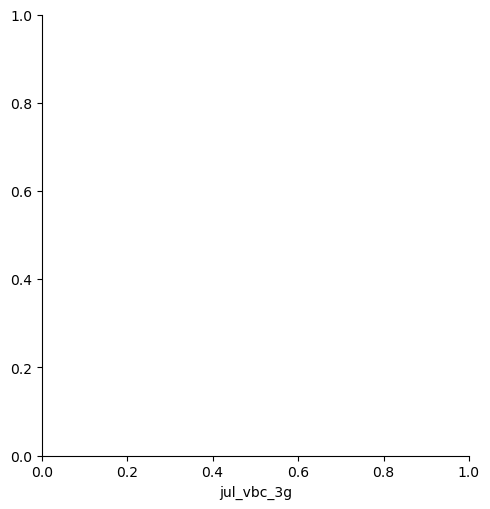

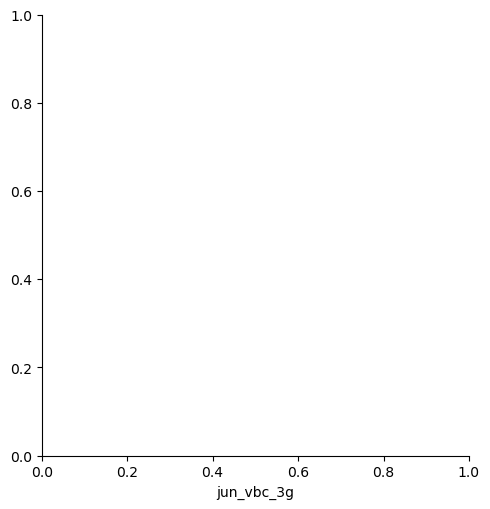

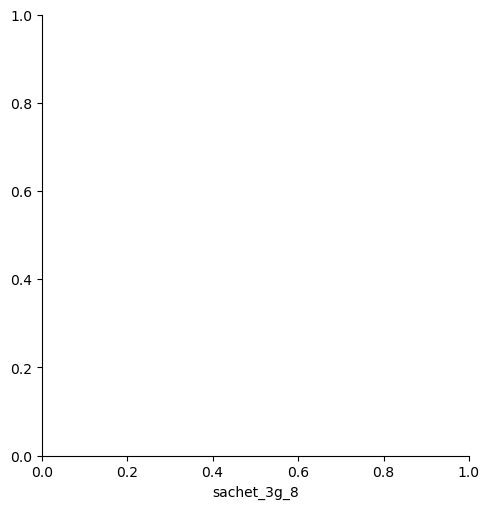

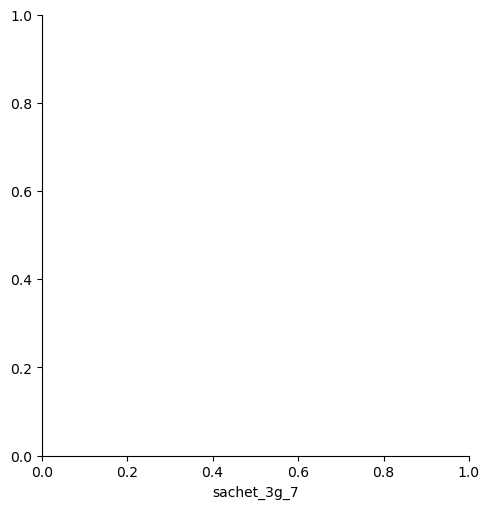

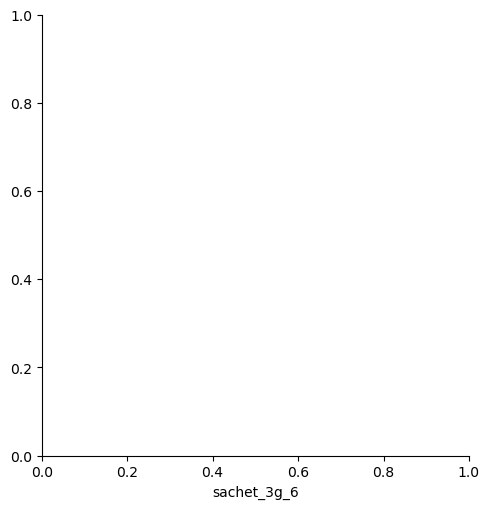

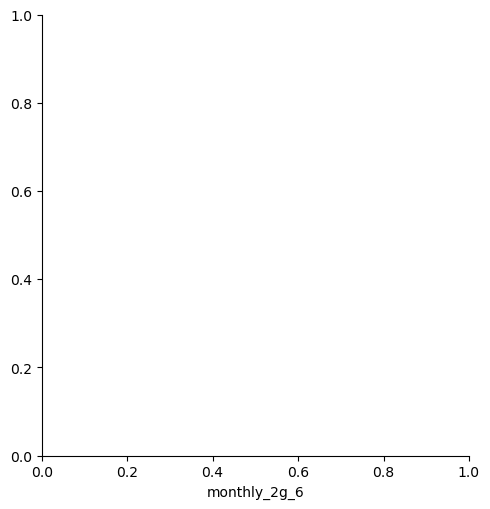

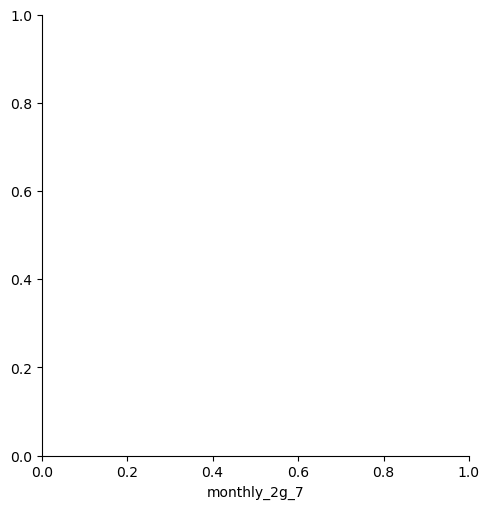

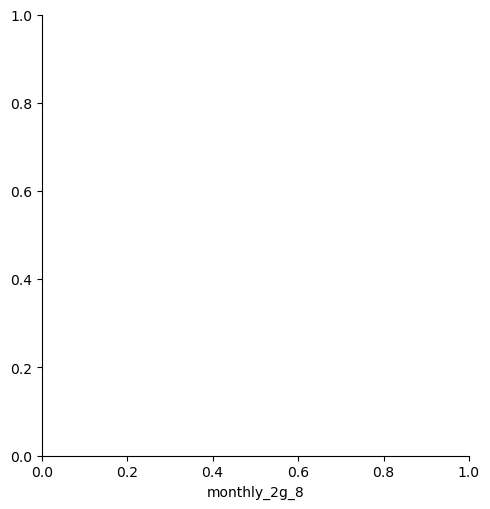

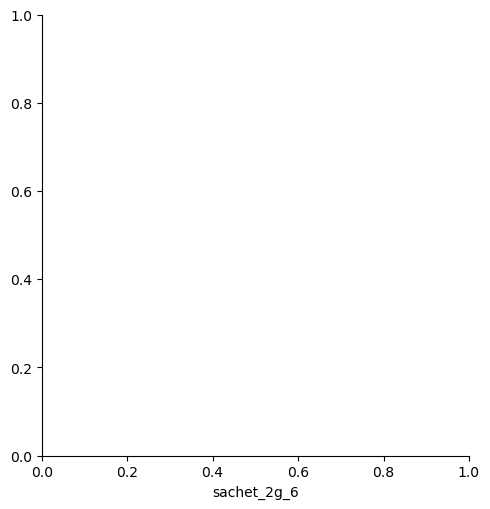

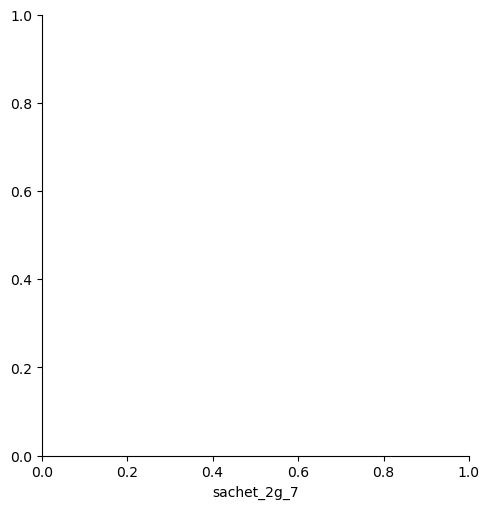

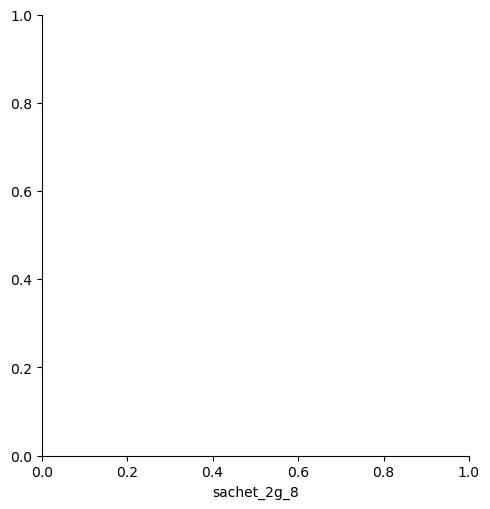

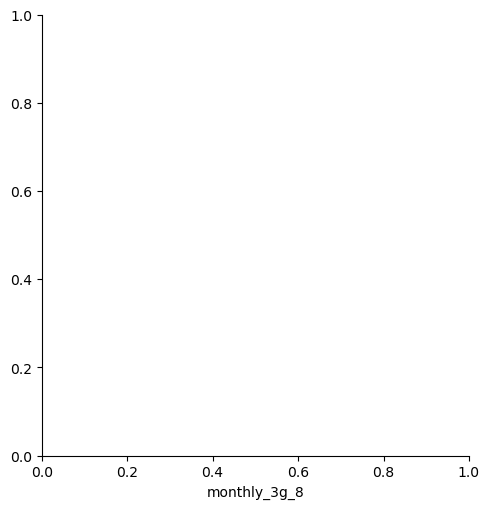

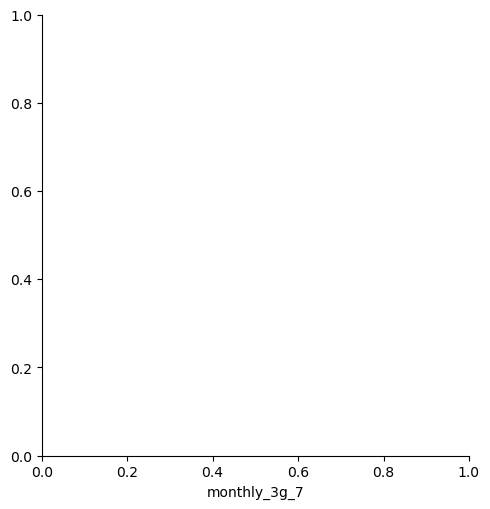

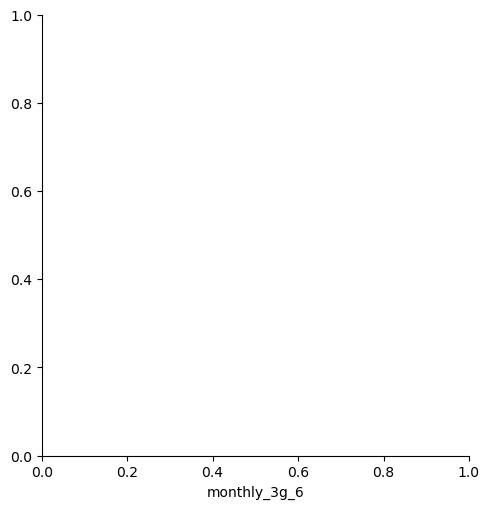

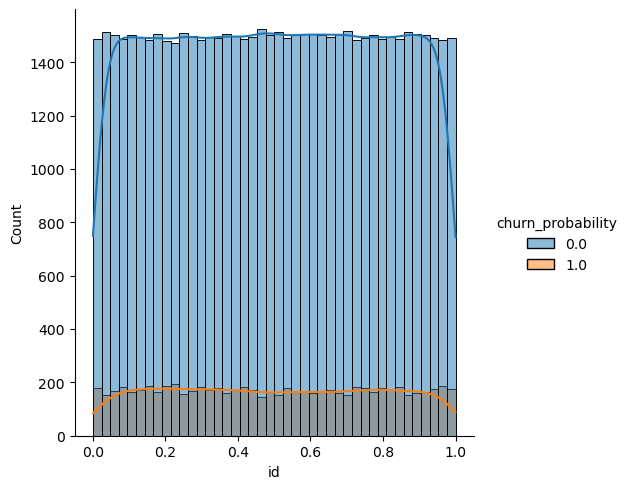

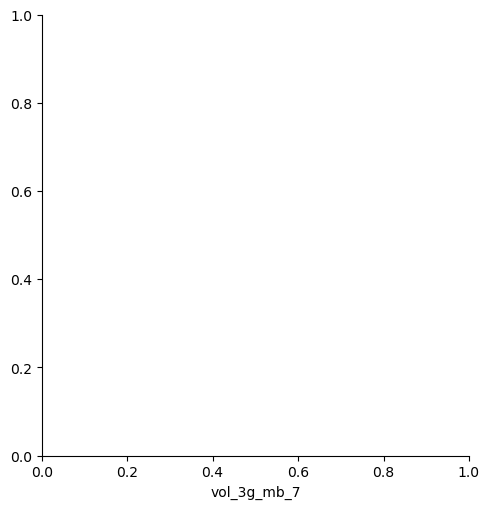

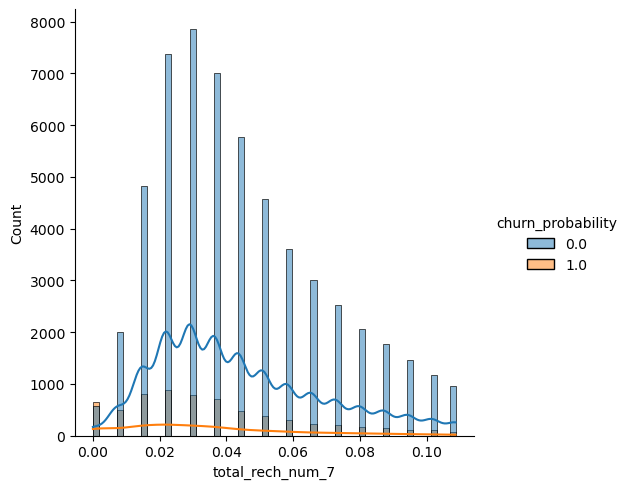

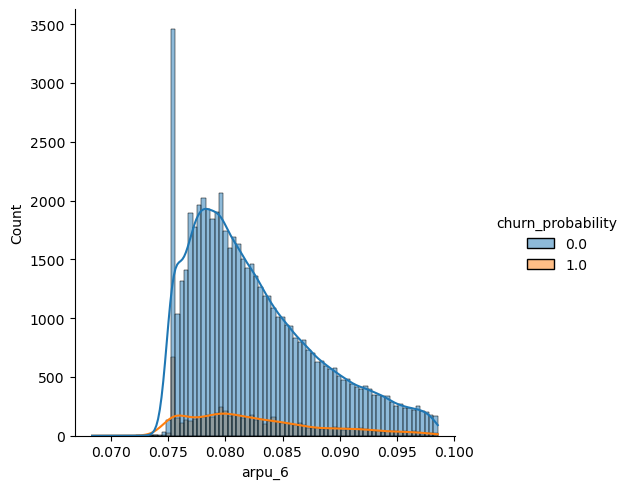

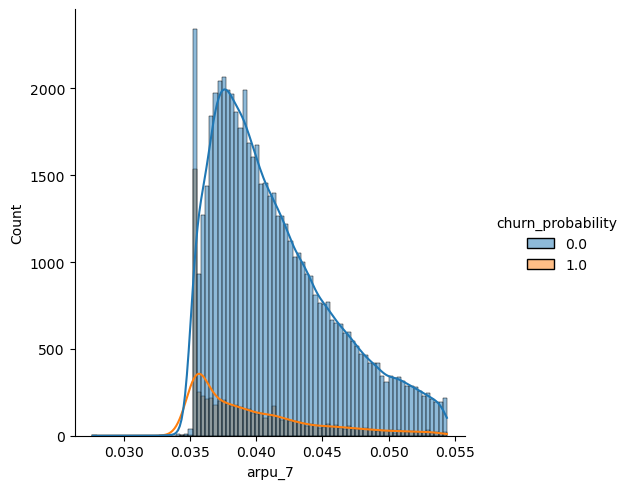

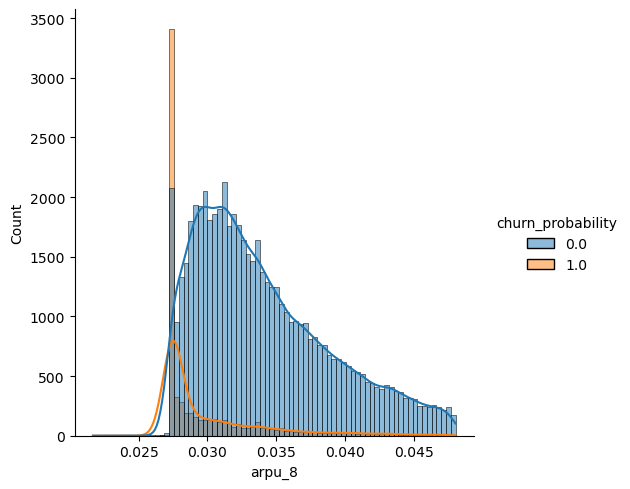

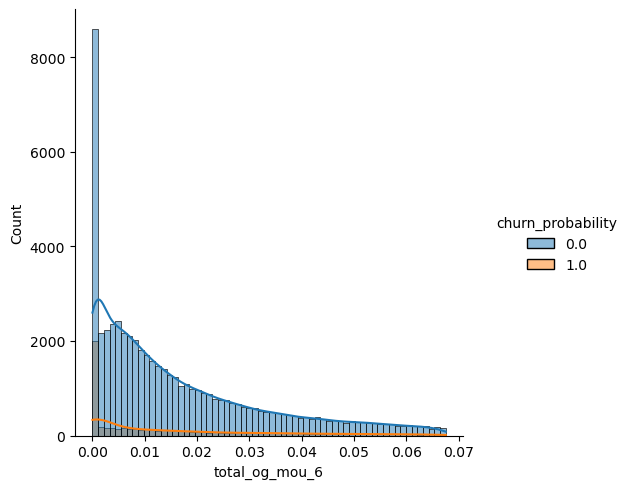

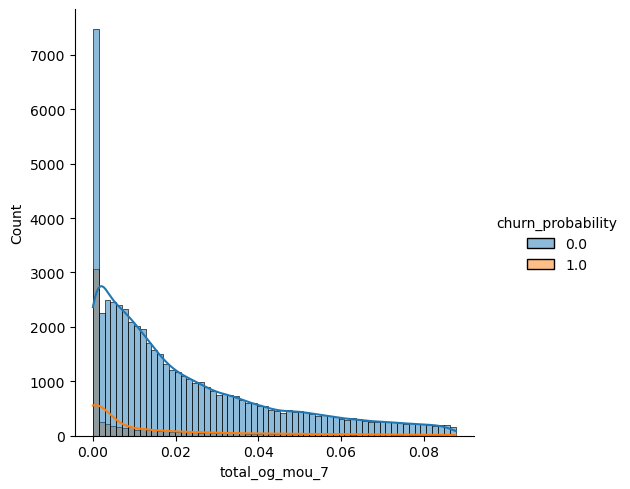

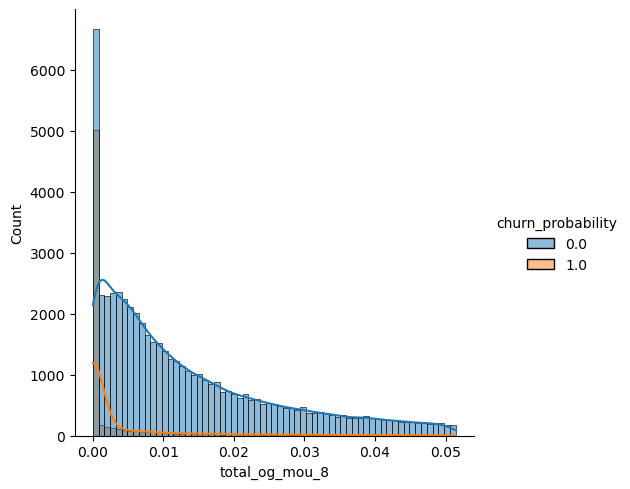

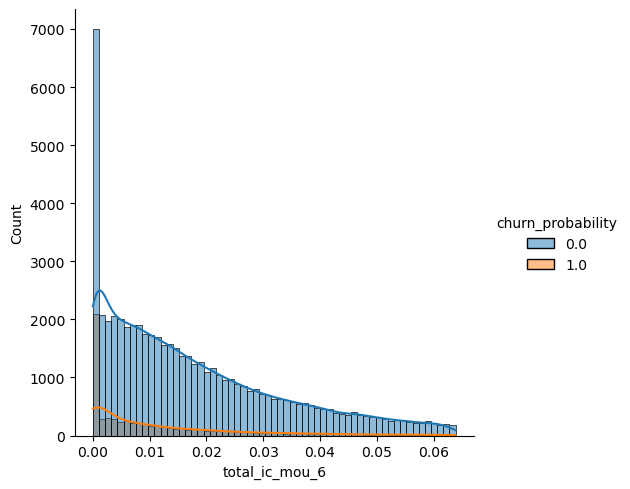

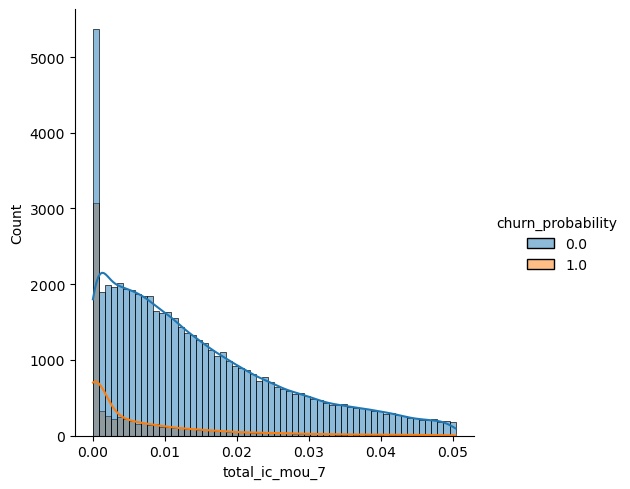

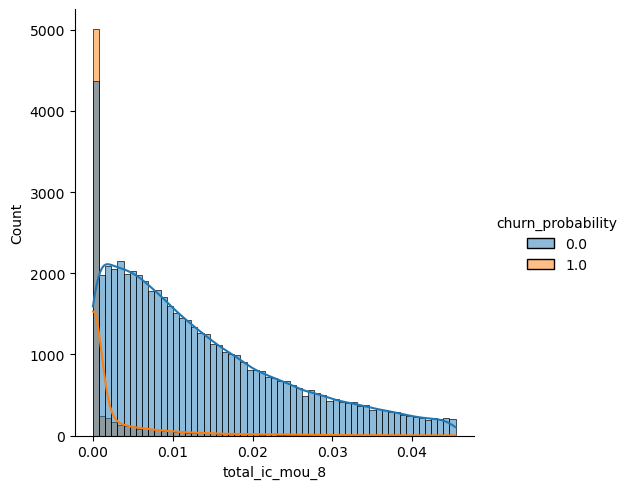

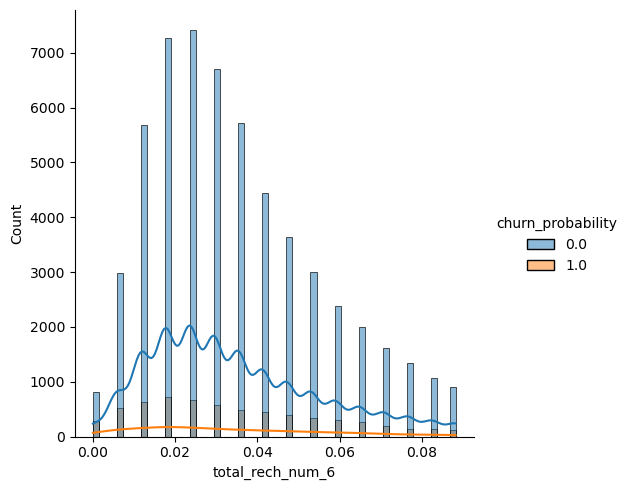

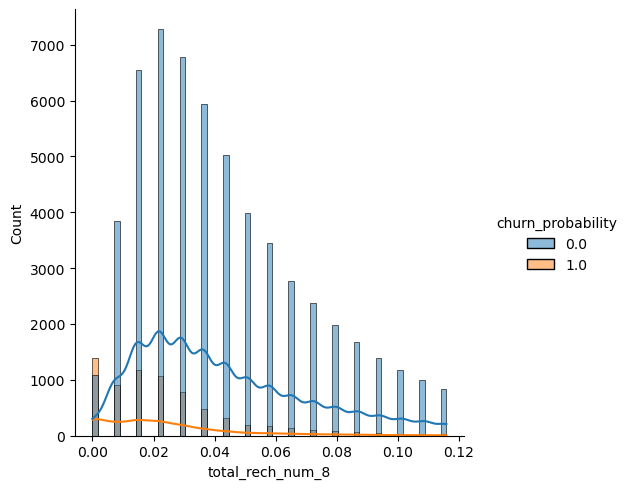

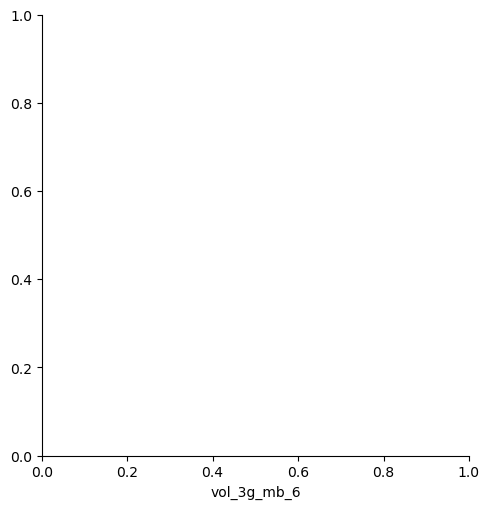

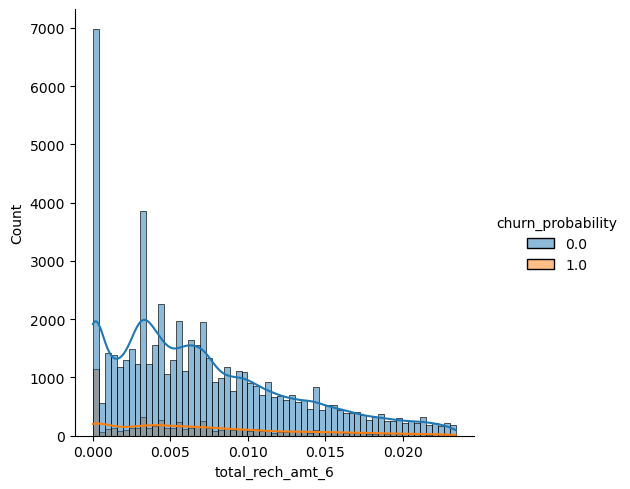

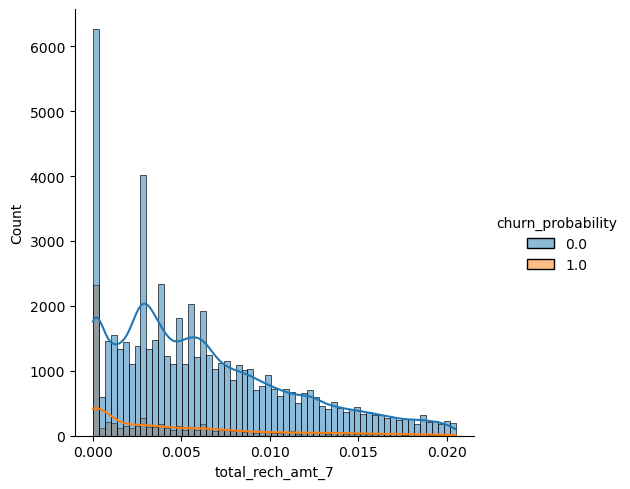

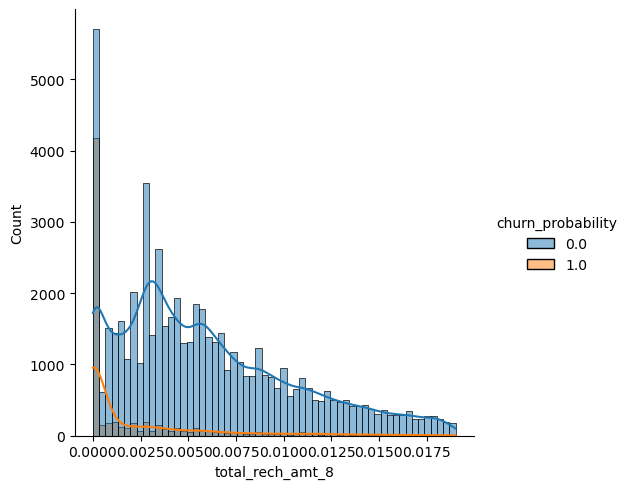

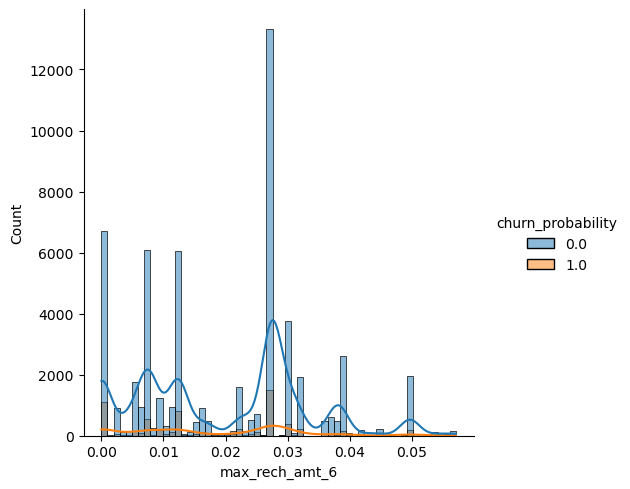

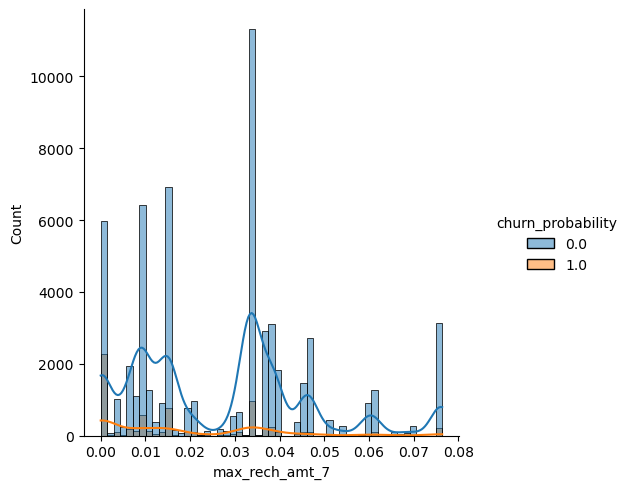

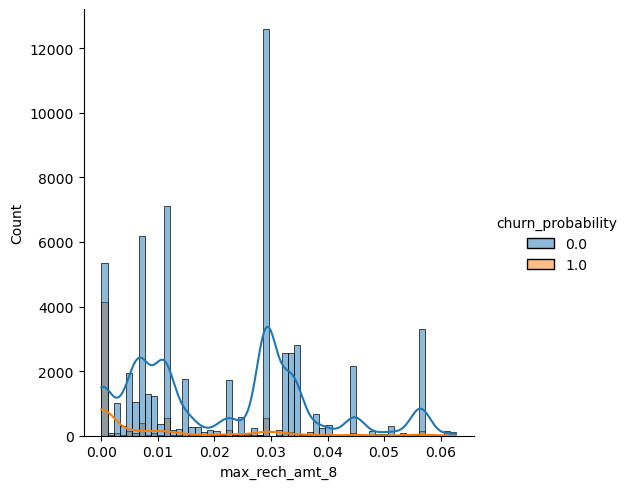

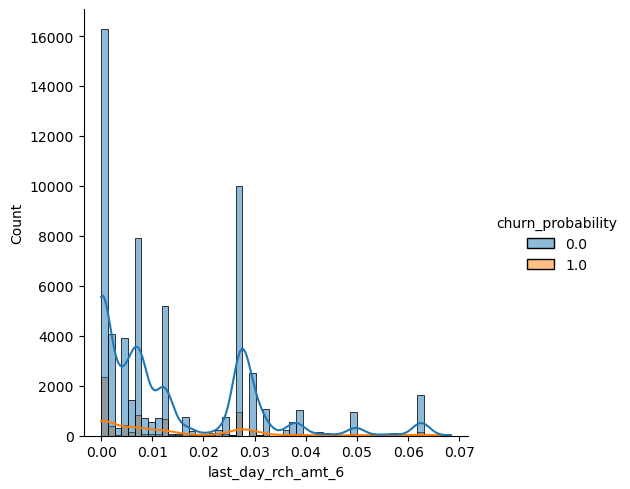

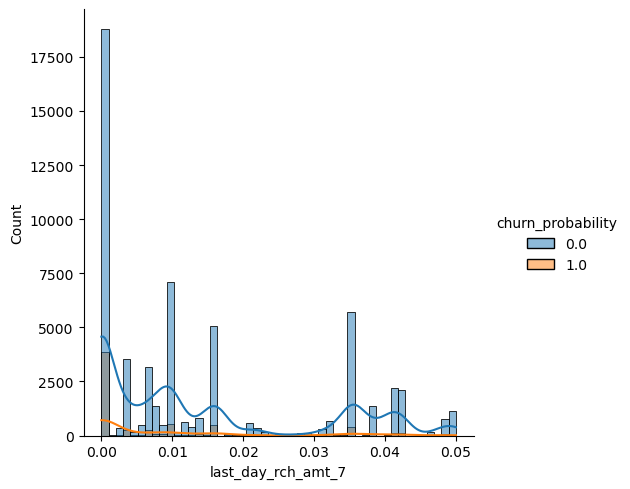

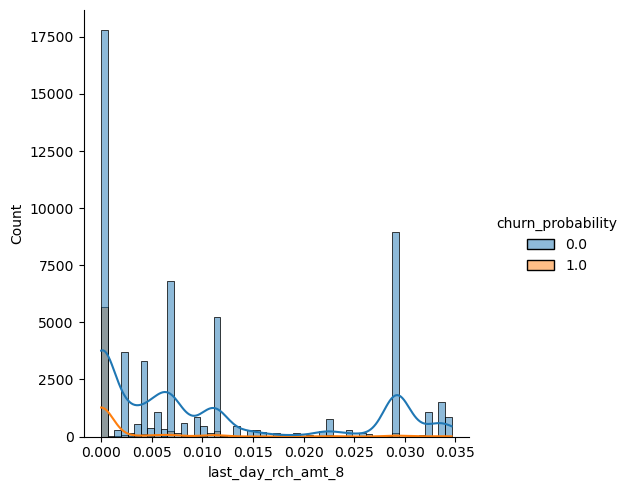

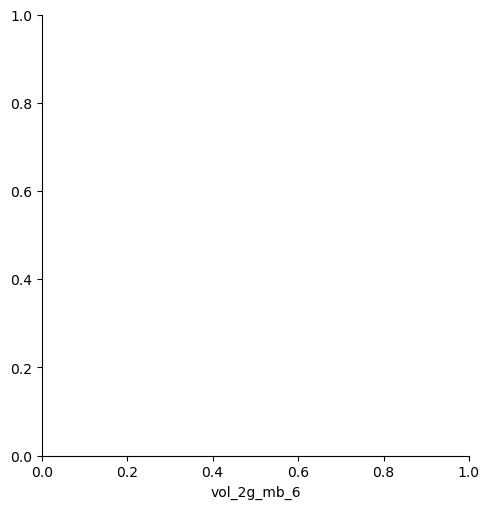

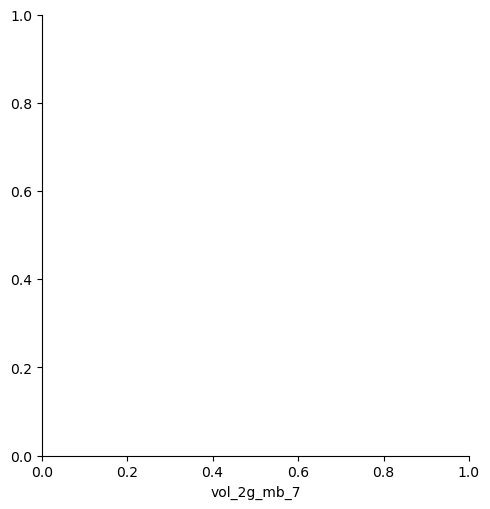

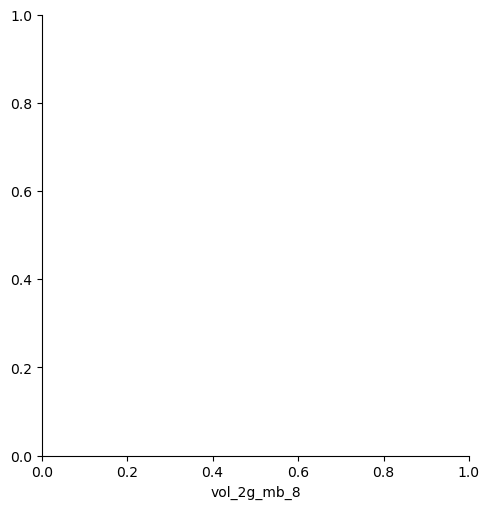

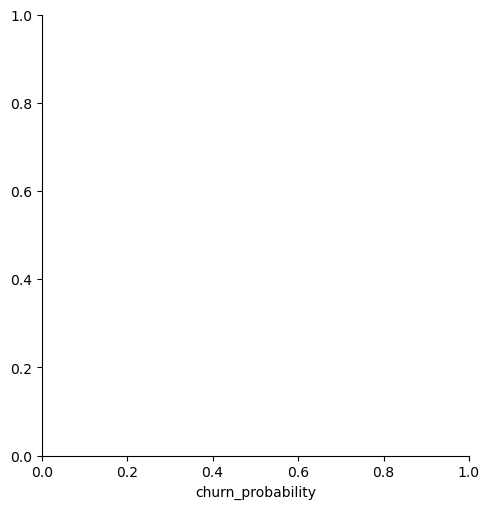

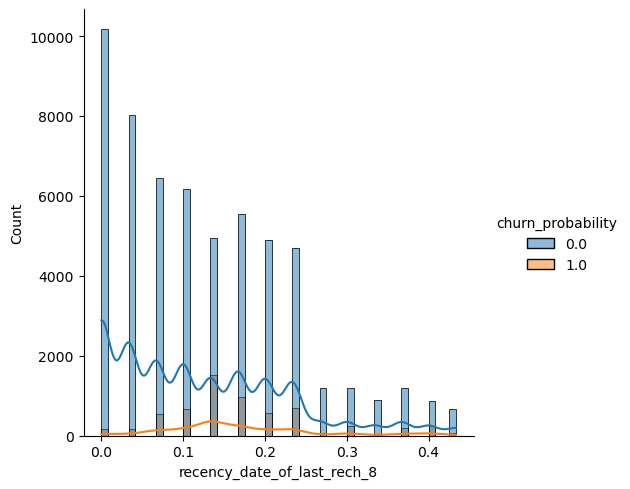

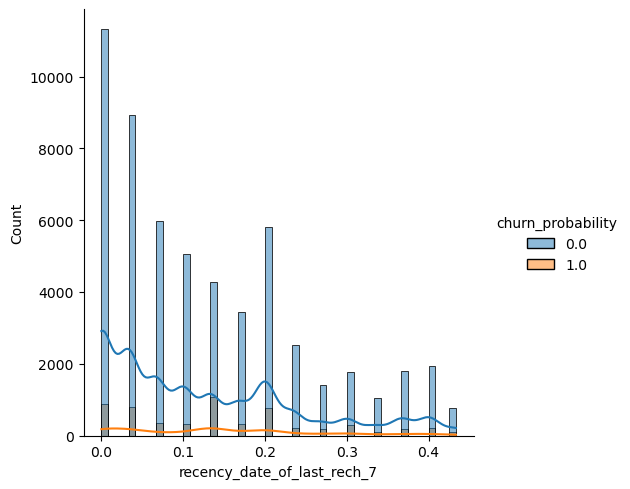

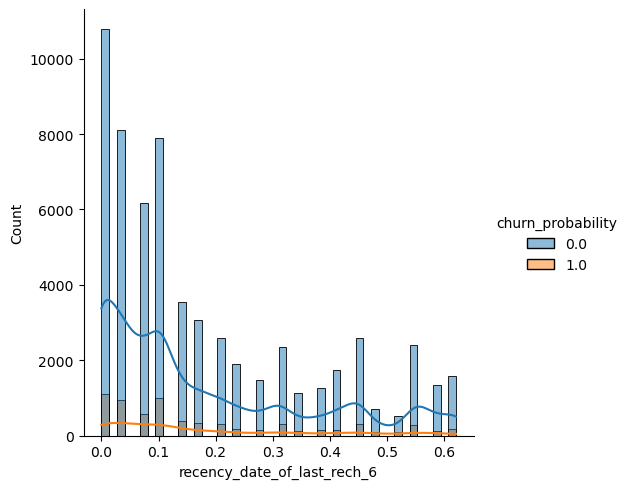

In [40]:
for i in num_variables:
    arr=np.array(df[i])
    uq=np.percentile(arr,70)
    lq=np.percentile(arr,20)
    iqr=uq-lq
    ul=uq+(1.5*iqr)
    ll=lq-(1.5*iqr)
    grouped_df=df[(df[i]<ul) & (df[i]>ll)]
    sns.displot(data=grouped_df,x=grouped_df[i],kde=True,hue='churn_probability')
    plt.xlabel(i)
    plt.show()